# The Smith Parasite - Machine Learning Group Project

The Smith Parasite is a recent disease that has been found in England. In the context of the Machine Learning course, this groupwork was made to analyse datasets of 800 patients, and, accordingly predict **"Who are the people more likely to suffer from the Smith Parasite?”** - therefore creating a predictive model which identifies the patients as **will have** the disease or **won't have** the disease.

The datasets provided had three types of information: demographic, health and habits related data for each patient. The data was treated and tested in many different ways, until reaching the final model made with **Histogram Gradient Boosting**, which turned out to be the better performing algorithm for this specific problem, with a F1-Score of 1 on Kaggle.

This work was prepared by:
   - Cláudia Alves Fernandes Rocha - r20191249
   - Felix Gayer - 20220320
   - Felix Sami Gaber - 20221385
   - Inês Daniela Cardoso Nascimento - r20170746
   - Susana Teresa Dias - 20220198

<hr>

## INDEX

[1. Import](#1)<br>

- [1.1 Import the needed libraries](#1.1)<br>

- [1.1 Import the Datasets](#1.2)<br>
      
      
[2. Exploratory Data Analysis](#2)<br>
    
- [2.1 Data Analysis](#2.1)<br>


- [2.2 Data Exploration](#2.2)<br>


- [2.3 Data Visualization](#2.3)<br>

    - [2.3.1 Metric Features](#2.3.1)<br>
    - [2.3.2 Numeric Variables" Segmented by the Target](#2.3.2) <br>
    - [2.3.3 Correlation Heatmap](#2.3.3)<br>
    - [2.3.4 Non-metric Features](#2.3.4) <br>
    - [2.3.5 Categorical Variables" Segmented by the Target](#2.3.5) <br>


[3. Preprocessing](#3)<br>


- [3.1 Data Partition](#3.1)<br>
    
    
- [3.2 Fixing Structural Errors](#3.2)<br>


- [3.3 Cardinality](#3.3)<br>


- [3.4 Removal of Unwanted Observations](#3.4)<br>


- [3.5 Outliers](#3.5)<br>

    - [3.5.1 Manual Filtering](#3.5.1)<br>
    - [3.5.2 IQR](#3.5.2)<br>
    - [3.5.3 Final Insights](#3.5.3)<br>


- [3.6 Missing Values](#3.6)<br>

    - [3.6.1 Delete](#3.6.1)<br>
    - [3.6.2 Simple Imputer](#3.6.3)<br>
    - [3.6.3 Iterative Imputer](#3.6.4)<br>
    - [3.6.4 Final Insights](#3.6.5)<br>
  

[4. Feature Engineering](#4)<br>

- [4.1 Creation of new Features](#4.1)<br>


- [4.2 Visualization of the Cleaned Data](#4.1.2)<br>


- [4.3 Encoding](#4.2)<br>

    - [4.3.1 Label Encoding](#4.2.1)<br>
    - [4.3.2 Ordinal Encoding](#4.2.2)<br>
    - [4.3.3 One-Hot Encoding](#4.2.3)<br>
    - [4.3.4 Final Insights](#4.2.4)<br>


- [4.4 Scaling](#4.4)<br>

    - [4.4.1 Standard Scaler](#4.4.1)<br>
    - [4.4.2 MinMax Scaler](#4.4.2)<br>
    - [4.4.3 Robust Scaler](#4.4.3)<br>


- [4.5 Feature Selection](#4.5)<br>

    - [4.5.1 Filter Methods](#4.5.1)<br>
 
        - [Univariate](#4.5.1.1)<br>
        - [Spearman Correlation](#4.5.1.2)<br>
        - [Pearson Correlation](#4.5.1.3)<br>
        - [K-best with the ANOVA f-value ](#4.5.1.4)<br>
        - [Chi-Squared](#4.5.1.5)<br>
        
    - [4.5.2 Wrapper Methods](#4.5.2)<br>
        - [RFE](#4.4.2.1)<br>

    - [4.5.3 Embedded Methods](#4.5.3)<br>
        - [Lasso](#4.4.3.1)<br>
        - [Ridge](#4.4.3.2)<br>
 
    - [4.5.4 Final Insights](#4.5.4)<br>
    
    
[5. Model Assessment](#5)<br>

- [5.1 First Model Assessment Round: One Dataset, Multiple Classifiers](#5.1)<br>


- [5.2 Second Model Asessment Round: Evaluation of the best- Multiple datasets, only the best Classifier](#5.2)<br>


- [5.3 Evaluation of the Best Models](#5.3)<br>

    - [5.3.1 Decision Tree Classifier](#5.3.1)<br>
    - [5.3.2 Gaussian Process Classifier](#5.3.2)<br>
    - [5.3.3 ExtraTrees Classifier](#5.3.3)<br>
    - [5.3.4 KNeighbors](#5.3.4)<br>
    - [5.3.5 Random Forest](#5.3.5)<br>
    - [5.3.6 Gradient Boosting Classifier](#5.3.6)<br>
    - [5.3.7 HistGradient Boosting Classifier](#5.3.7)<br>
    - [5.3.8 Bagging Classifier](#5.3.7)<br>


- [5.4 Final Model Training](#5.4)<br>



- [5.5 Final Decision](#5.5)<br>
    
<hr>        

<div class="alert alert-block alert-info"> <a id = "1"></a>
    
# 1. Import

<a class="anchor" id="1.1"></a>

## 1.1 Import the needed libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import math
from math import ceil
import os
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

from datetime import date
from datetime import datetime

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder

# Missing Values
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV, Ridge, ElasticNet

# SEE
from sklearn.linear_model      import LinearRegression
from sklearn.ensemble          import RandomForestClassifier
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, make_scorer, roc_curve, auc, accuracy_score

# Models
from sklearn.model_selection        import RepeatedKFold, cross_val_score, cross_validate, cross_val_predict, KFold, LeaveOneOut, GridSearchCV
from sklearn.linear_model           import LogisticRegression, LinearRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree                   import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics                import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, roc_auc_score, precision_recall_curve
from sklearn.ensemble               import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.svm                    import LinearSVC, SVC
from sklearn.naive_bayes            import GaussianNB
from sklearn.gaussian_process       import GaussianProcessClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn                        import metrics

import shap

# Layout
sns.set_style("whitegrid")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a class="anchor" id="1.2"></a>

## 1.2 Import the Datasets

In [2]:
# Import train datasets

data_train_demo = pd.read_excel("train_demo.xlsx")
data_train_habits = pd.read_excel("train_habits.xlsx")
data_train_health = pd.read_excel("train_health.xlsx")

# Import test datasets

data_test_demo = pd.read_excel("test_demo.xlsx")
data_test_habits = pd.read_excel("test_habits.xlsx")
data_test_health = pd.read_excel("test_health.xlsx")

<div class="alert alert-block alert-info"> <a id = "2"></a>
    
# 2. Exploratory Data Analysis

<a class="anchor" id="2.1"></a>

## 2.1 Data Analysis

In [3]:
# See the shape of the train datasets

print(data_train_demo.shape)
print(data_train_habits.shape)
print(data_train_health.shape)

# See the shape of the test datasets

print(data_test_demo.shape)
print(data_test_habits.shape)
print(data_test_health.shape)

(800, 6)
(800, 6)
(800, 9)
(225, 5)
(225, 6)
(225, 9)


In [4]:
# Sample of the train datasets

display(data_train_demo.head(2))
display(data_train_habits.head(2))
display(data_train_health.head(2))

# Sample of the test datasets

display(data_test_demo.head(2))
display(data_test_habits.head(2))
display(data_test_health.head(2))

,PatientID,Name,Birth_Year,Region,Education,Disease
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1


,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters


,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.


,PatientID,Name,Birth_Year,Region,Education
0,1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade)
1,1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years)


,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1343,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1727,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter


,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1343,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1,1727,171,80,225,130,21,0,Not sure,I do have diabetes


In [5]:
# Check if the train and test datasets have the same number of unique Patient ID"s

print(data_train_demo["PatientID"].nunique())
print(data_train_habits["PatientID"].nunique())
print(data_train_health["PatientID"].nunique())

# Now for the test datasets

print(data_test_demo["PatientID"].nunique())
print(data_test_habits["PatientID"].nunique())
print(data_test_health["PatientID"].nunique())

800
800
800
225
225
225


In [6]:
# Setting the indexes as the PatientID on all datasets, and concatenate all train and all test datasets

data_train = pd.concat([data_train_demo.set_index("PatientID"), 
                        data_train_habits.set_index("PatientID"), 
                        data_train_health.set_index("PatientID")], 
                       join="inner", 
                       axis=1) 

# Doing the same for the test dataset

data_test = pd.concat([data_test_demo.set_index("PatientID"), 
                       data_test_habits.set_index("PatientID"), 
                       data_test_health.set_index("PatientID")], 
                      join="inner", 
                      axis=1) 

# Check the shapes of our train and test datasets

print("Shape of the train dataset:","\nRows:", data_train.shape[0], "\nColumns:", data_train.shape[1])
print("\nTest Dataset:","\nRows:", data_test.shape[0], "\nColumns:", data_test.shape[1])

Shape of the train dataset: 
Rows: 800 
Columns: 18

Test Dataset: 
Rows: 225 
Columns: 17


In [7]:
data_train.head(2)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.


In [8]:
data_test.head(2)

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes


In [9]:
# Make a copy of the datasets, in case we make some decisive modifications

train_original = data_train.copy()
test_original = data_test.copy()

<a class="anchor" id="2.2"></a>

## 2.2 Data Exploration

**DATA TYPES**

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

With the information above, we can see that we have at least 13 missing values in the variable `Education`.

Also, the `Smoking_Habit` and `Exercise` features are considered objects (that is, strings), while they should be stored as binary variables, since they"re both related to a Yes or No question.

**DESCRIPTIVE STATISTICS**

In [11]:
# Descriptive statistics of the metric variables

data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


Performing coherence checking from the information above, we noticed the following values:

`BirthYear` -  The minimum value in this feature is 1855. This value seems to be an outlier, since the first quartile is only 1961.

`Physical_Health` - Since the maximum value is 30 and the third quartile is only 7, which is very away from the maximum, we might have outliers in this feature.

`High_Cholesterol` and `Blood_Pressure` - The maximum values in these features, 568 and 200, respectively, show that these features might have suffered from some measurements errors, since the normal range values for these features are [0;200] and [80;120].

In [12]:
# Descriptive statistics of our categorical variables

data_train.describe(include="object").T

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392


From the information above, we can see that in the variable `Name`, the name Gary Miller was registered 2 times, therefore we only have 799 unique observations for this feature.

**DUPLICATES**

In [13]:
# Check if we have any duplicate values

data_train.duplicated().sum()

0

In [14]:
data_train[data_train.loc[:, "Name"] == "Mr. Gary Miller"]

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1221,Mr. Gary Miller,1959,North West,University Complete (3 or more years),0,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Less than half a liter,172,65,258,130,17,6,Not sure,Neither I nor my immediate family have diabetes.
1694,Mr. Gary Miller,1983,South West,I never attended school / Other,0,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,61,223,118,15,5,Not sure,Neither I nor my immediate family have diabetes.


As expected, we don"t have any duplicate values, and the 2 rows with the name Gary Miller, are 2 different patients.

**MISSING VALUES**

In [15]:
# Sometimes Missing Values are in other forms besides "NaN". Let"s check if we have some of those here

data_train.replace(["","?","-"," ","null", "NK"], np.nan, inplace = True)
data_train.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

We only have 13 missing values in `Education`.

**BALANCE**

In [16]:
# Checking if the dataset is balanced

data_train["Disease"].value_counts()

1    411
0    389
Name: Disease, dtype: int64

Our dataset isn't perfectly balanced nor a significant discrepancy (only 22 more 1 than 0).

**INCONSISTENCIES**

In [17]:
# Finally, let"s check the values of our variables. We might find inconsistencies and notice outliers here

print("Analysing values of categorical variables:")

print("\n", data_train["Region"].value_counts())

print("\n", data_train["Education"].value_counts())

print("\n", data_train["Smoking_Habit"].value_counts())

print("\n", data_train['Drinking_Habit'].value_counts())

print("\n", data_train["Exercise"].value_counts())

print("\n",data_train["Fruit_Habit"].value_counts())

print("\n",data_train["Water_Habit"].value_counts())

print("\n",data_train["Checkup"].value_counts())

print("\n",data_train["Diabetes"].value_counts())

Analysing values of categorical variables:

 East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

 University Complete (3 or more years)          239
High School Graduate                           196
Elementary School (1st to 9th grade)           183
High School Incomplete (10th to 11th grade)    102
University Incomplete (1 to 2 years)            37
I never attended school / Other                 30
Name: Education, dtype: int64

 No     673
Yes    127
Name: Smoking_Habit, dtype: int64

 I usually consume alcohol every day     406
I consider myself a social drinker      383
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64

 No     536
Yes    264
Name: Exercise, dty

The main **inconsistencies** noticed were:

`Region` - The region "London" is in 2 different ways: LONDON and London.

`Education` - In this feature, having "Elementary School" and "High School Incomplete" can be redundant, since the educational qualifications for someone who did not complete High School, is Elementary School. In addition, University Incomplete is the same as having High School Graduate.

<a class="anchor" id="2.3"></a>

## 2.3 Data Visualization

In [18]:
# Create an object with the independent features and an object with the dependent variable (target)

data = data_train.drop("Disease", axis=1)

target = data_train["Disease"]

In [19]:
# Convert the target object to a Pandas Dataframe

target_frame = target.to_frame()

In [20]:
# Since metric and non metric features are treated and visualized differently, we have to split these

metric = list(data.select_dtypes(include = np.number))

non_metric = list(data.select_dtypes(exclude = np.number))

<a class="anchor" id="2.3.1"></a>

### 2.3.1 Metric Features

In [21]:
def histogram(df, metric_features): 
    
    # Prepare figure. Create individual axes where each histogram will be placed
    
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    
    for ax, feat in zip(axes.flatten(), metric_features):
        ax.hist(df[feat], color="#8b8b8c")
        ax.set_title(feat, y=-0.13)
    
    # Layout and adding a centered title to the figure:
    
    plt.suptitle("Metric Features' Histogram", size = 30, fontweight="bold")
    plt.show()

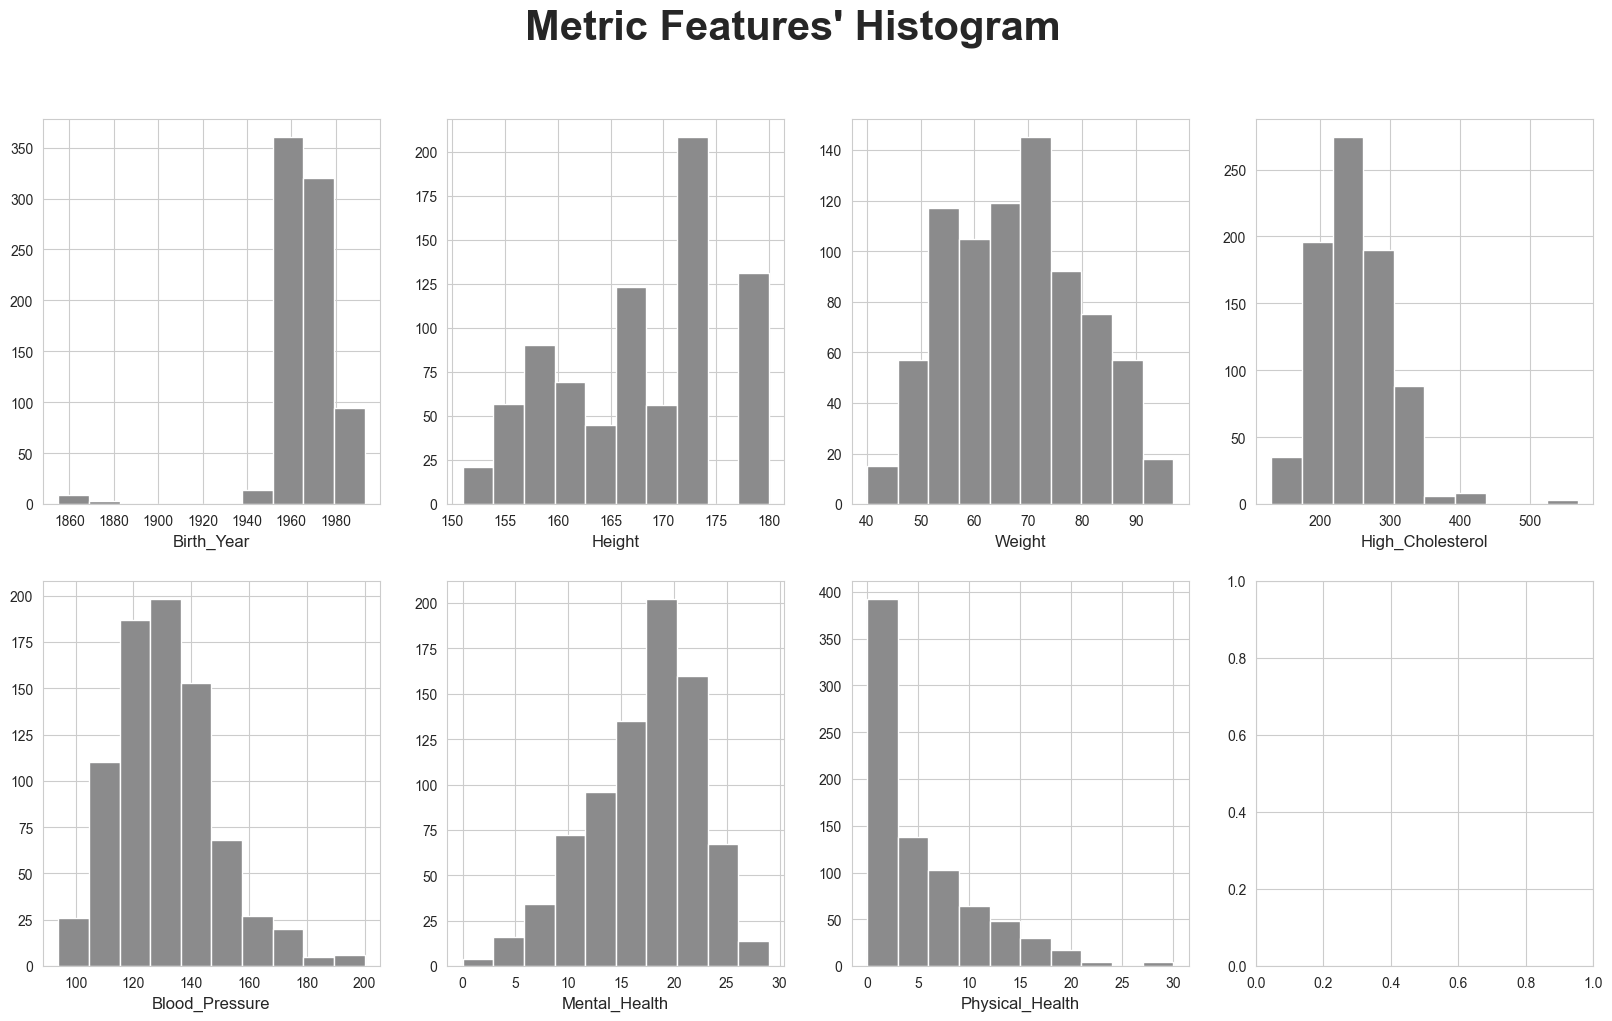

In [22]:
histogram(data,metric)

In [23]:
def box_plots(df, metric_features):
    
    # All Numeric Variables" Box Plots in one figure 
    
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(16, 9))

    # Plot data
    # Iterate across axes objects and associate each box plot:
    
    for ax, feat in zip(axes.flatten(),metric):
        sns.boxplot(x=data[feat], ax=ax, color="#8b8b8c")
        
    # Layout and adding a centered title to the figure:
    
    plt.suptitle("Metric Features' Box Plots", size = 30, fontweight="bold")
    plt.show()

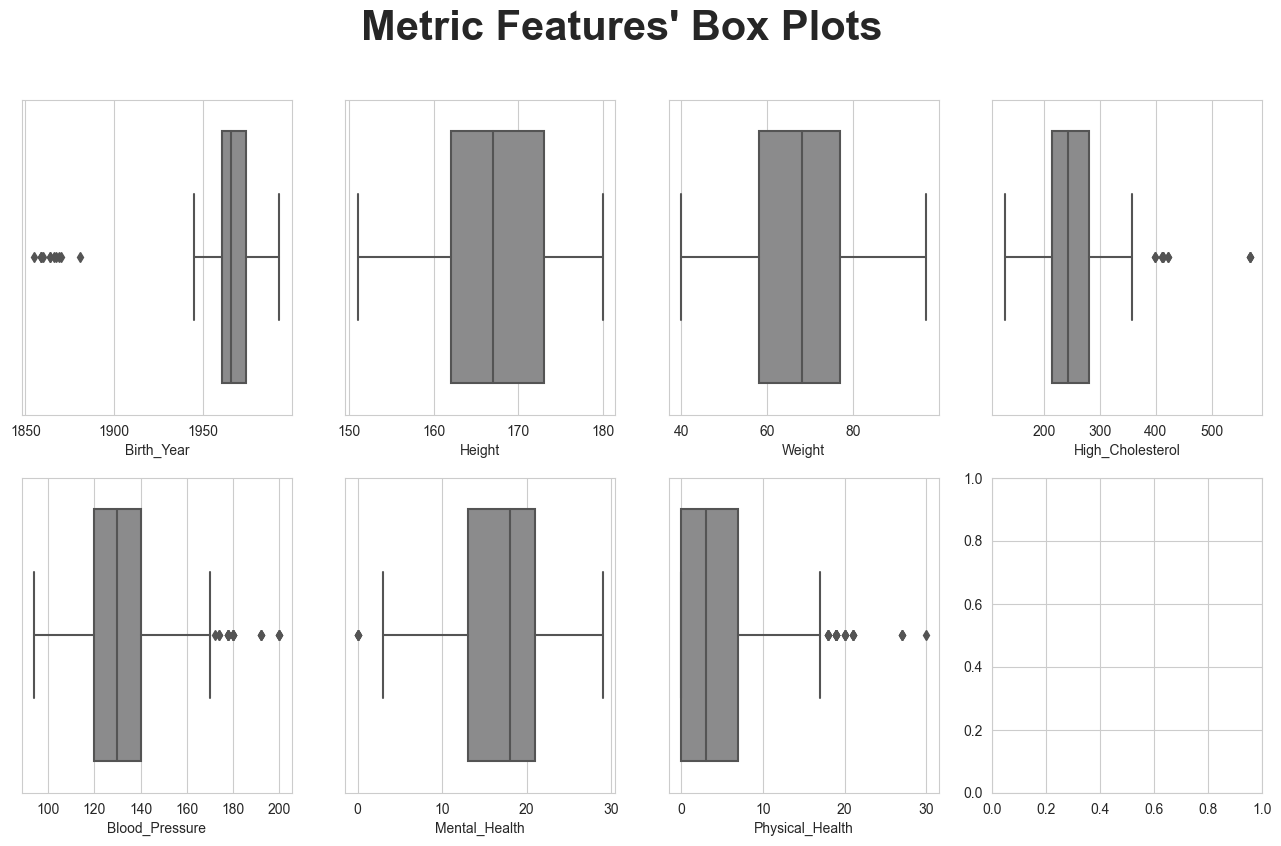

In [24]:
box_plots(data, metric)

Apparently, we have outliers in every metric feature except for `Height` and `Weight`.

In [25]:
def pairwise_numeric(df, metric_features):
    
    # Pairwise Relationship of Numerical Variables
    
    sns.set(style="whitegrid")

    # Setting pairplot
    
    sns.pairplot(data[metric], diag_kind="hist", corner=True, palette=["#8b8b8c", "#d8e43c"])

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle("Pairwise Relationship of our Metric Features", fontsize=30, fontweight="bold")
    plt.show()

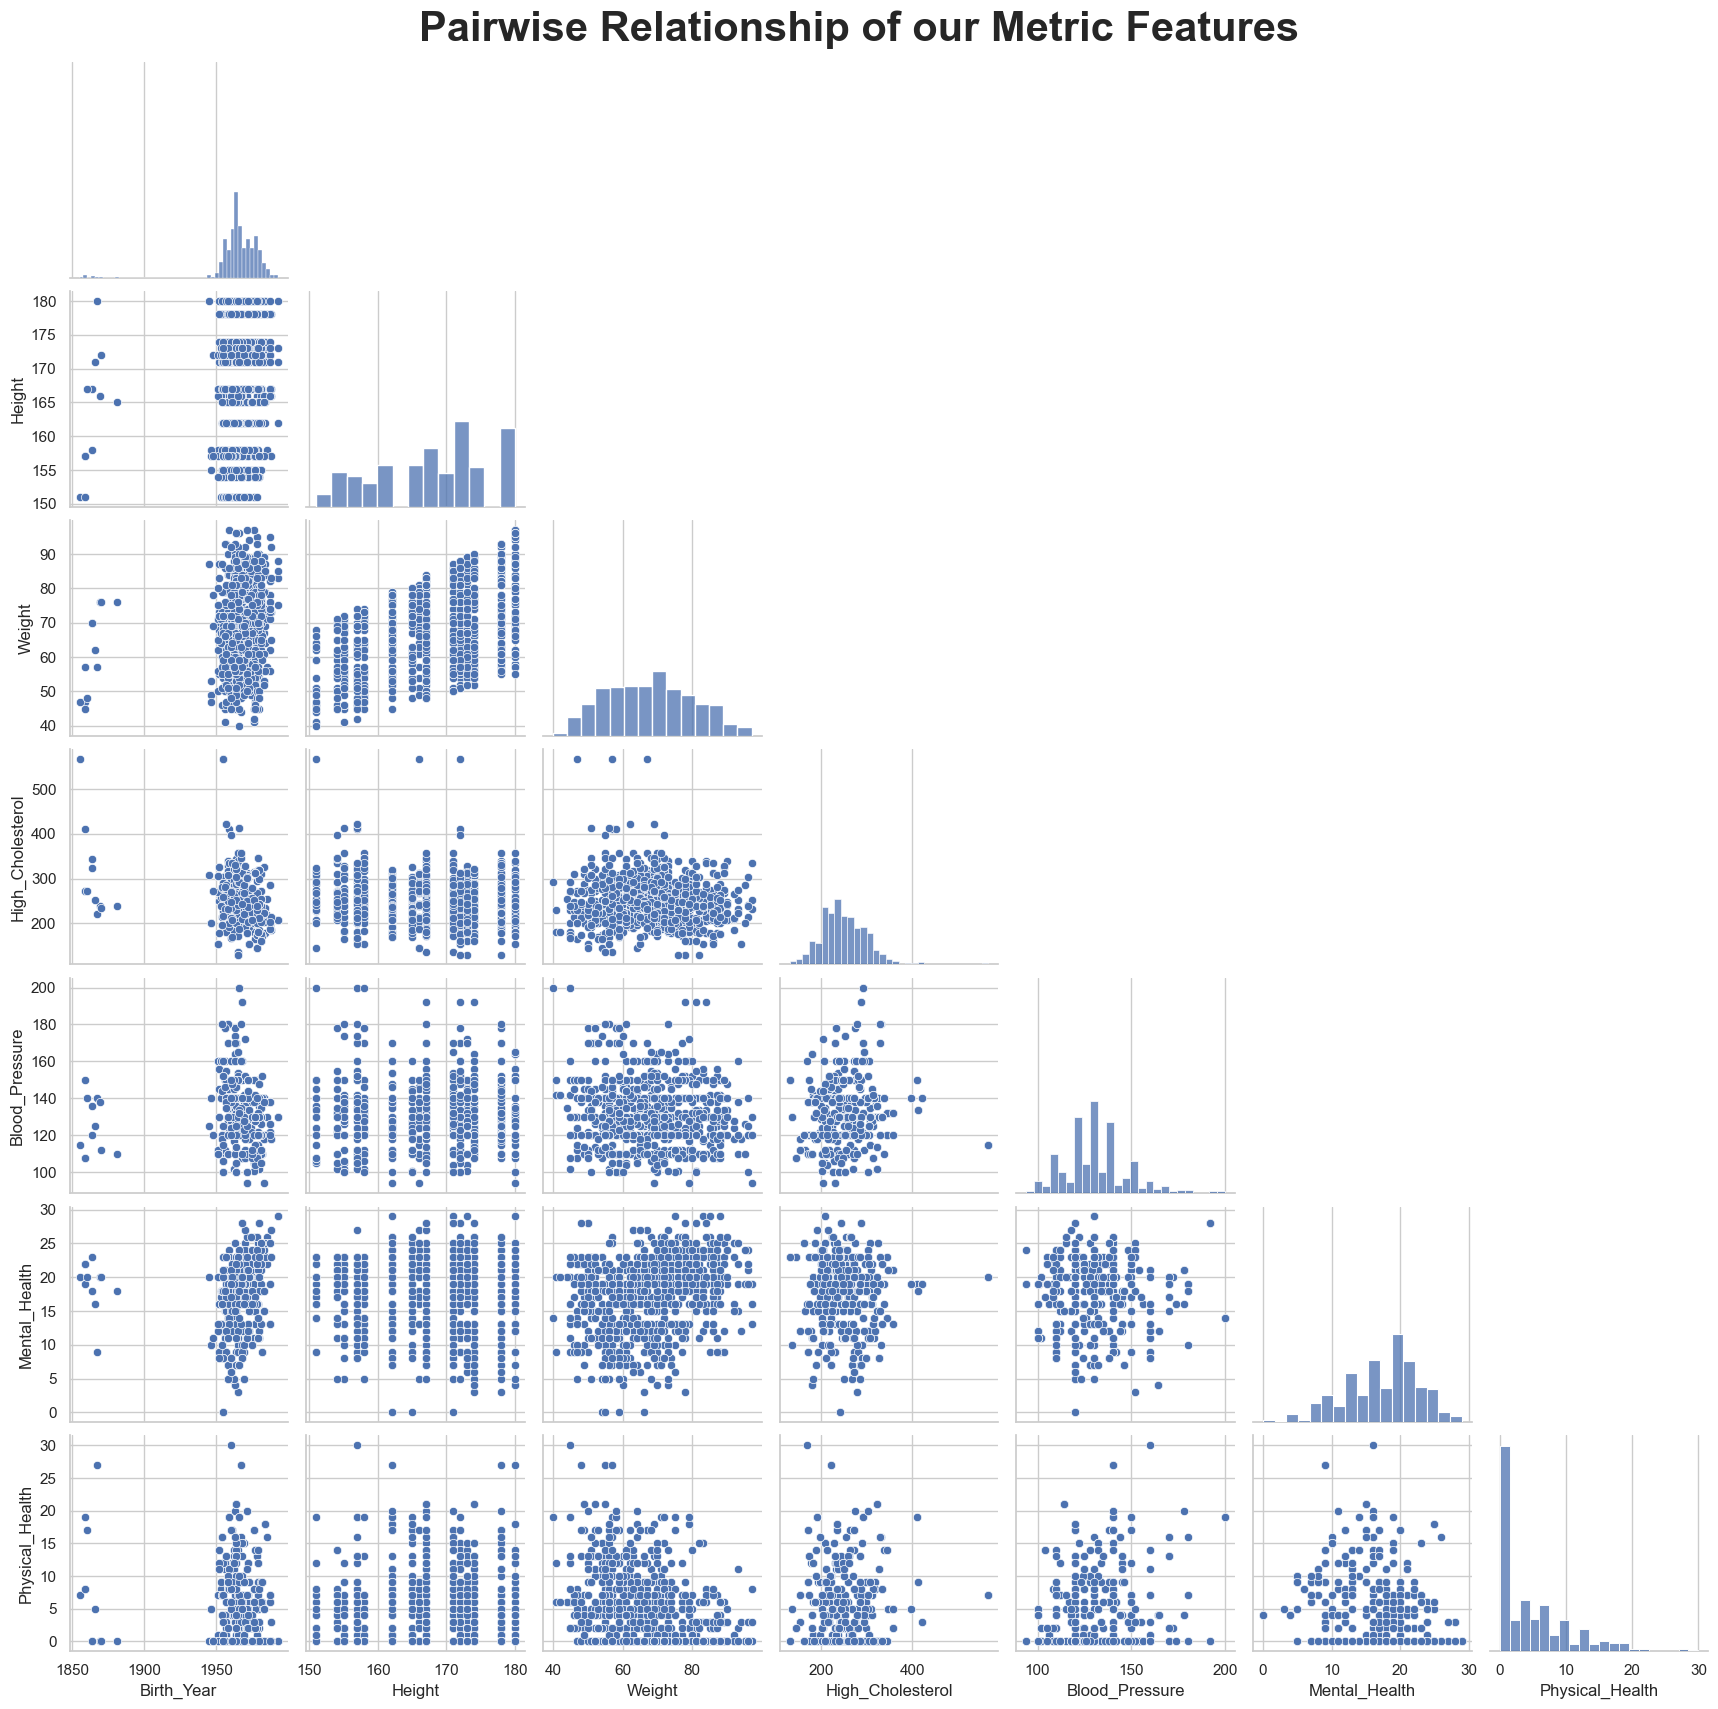

In [26]:
pairwise_numeric(data, metric)

After visualizing the relationships among our metric variables, we can"t identify a clear linear correlation neither relevant behavior.

<a class="anchor" id="2.3.2"></a>

### 2.3.2 Metric Features Segmented by the Target

In [27]:
def boxplot_segmented(df, metric, target):
    
    fig, axes = plt.subplots(2, ceil(len(metric) / 2), figsize=(20, 12))
    sns.set(style="whitegrid")

    # Data to plot
    for ax, variables in zip(axes.flatten(), metric):
        sns.boxplot(y = target.astype("category"), x = variables, data=df, ax=ax, palette=["#8b8b8c", "#d8e43c"])

    # Layout
    plt.suptitle("Metric Features' segmented by the Target", size = 30, fontweight="bold")
    plt.show()

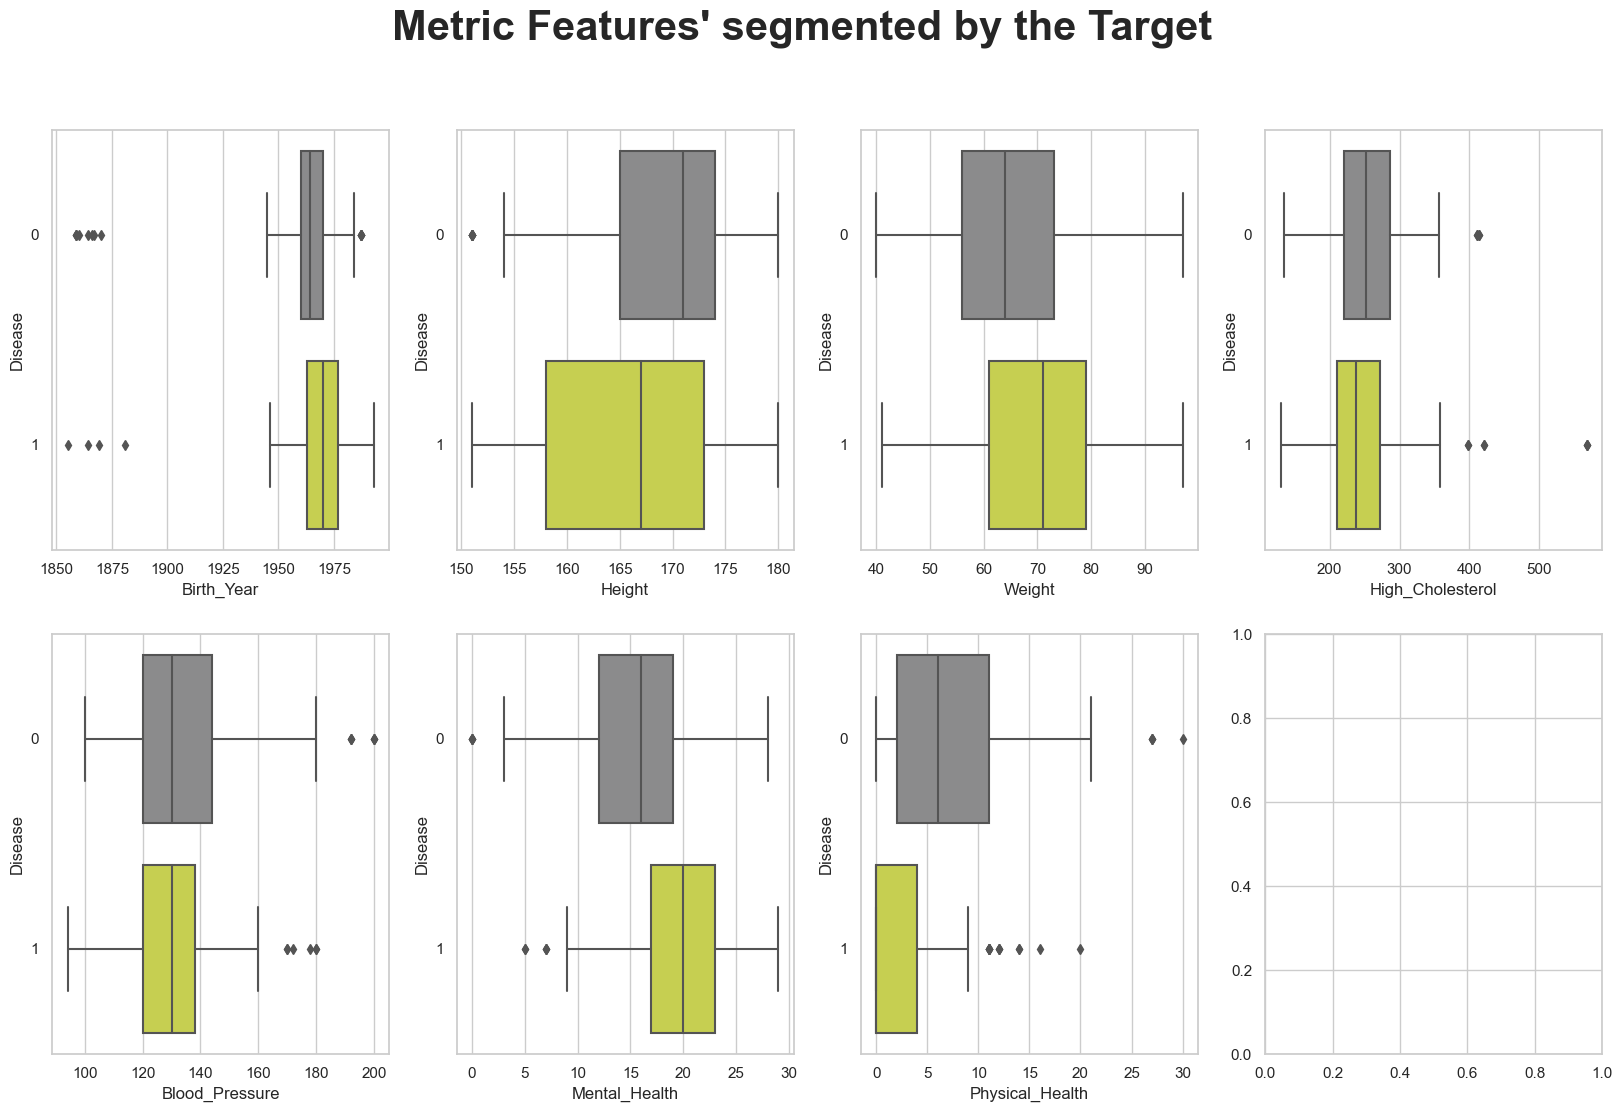

In [28]:
boxplot_segmented(data, metric, target)

In [29]:
def pairwise_target(df, target): # The target argument has to be included in the df argument

    # Setting pairgrid
    g = sns.pairplot(df[df.columns.tolist()], 
                     hue=target, 
                     diag_kind="hist", 
                     corner=True, 
                     palette=["#8b8b8c", "#d8e43c"])
    
    # Layout
    plt.subplots_adjust(top=0.9)
    plt.suptitle("Pairwise Relationship of Metric Features by Disease", size=40)
    plt.show()

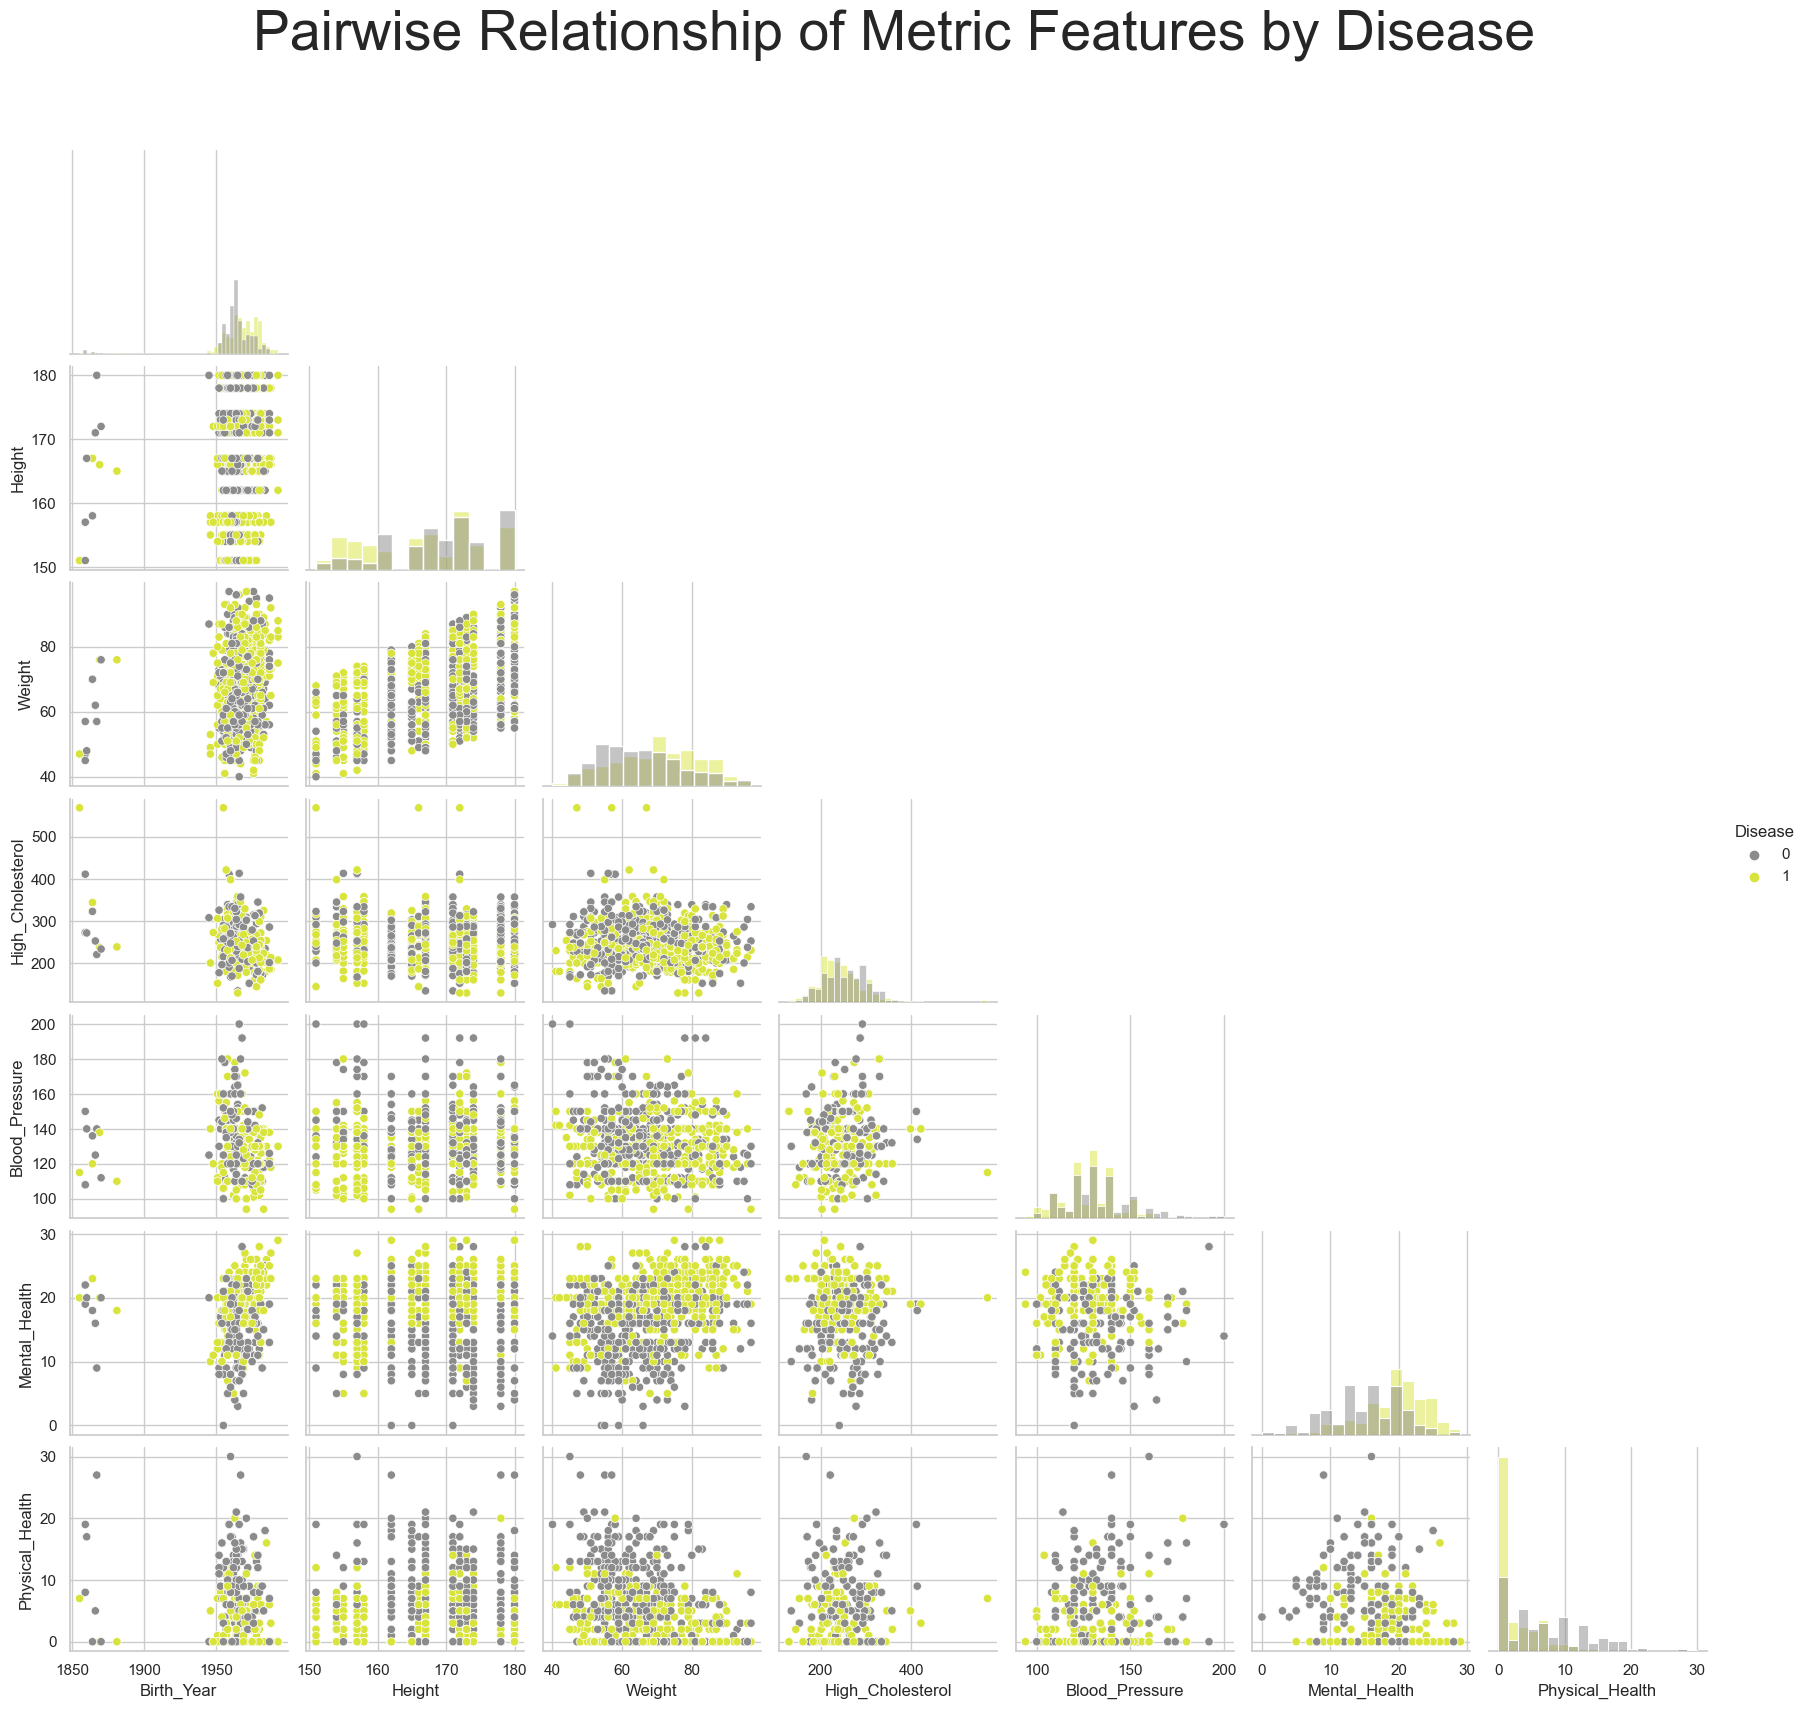

In [30]:
pairwise_target(data_train, "Disease")

<a class="anchor" id="2.3.3"></a>

### 2.3.3 Correlation Heatmap

In [31]:
def correlation_heatmap(df,features):
    
    plt.figure(figsize=(20,10))
    sns.heatmap(data[features].corr(),annot=True, cmap="RdBu")
    
    # Layout
    plt.title("Pearson Correlation Heatmap",fontsize=30,fontweight ="bold" )
    plt.yticks(rotation =0)
    plt.show()

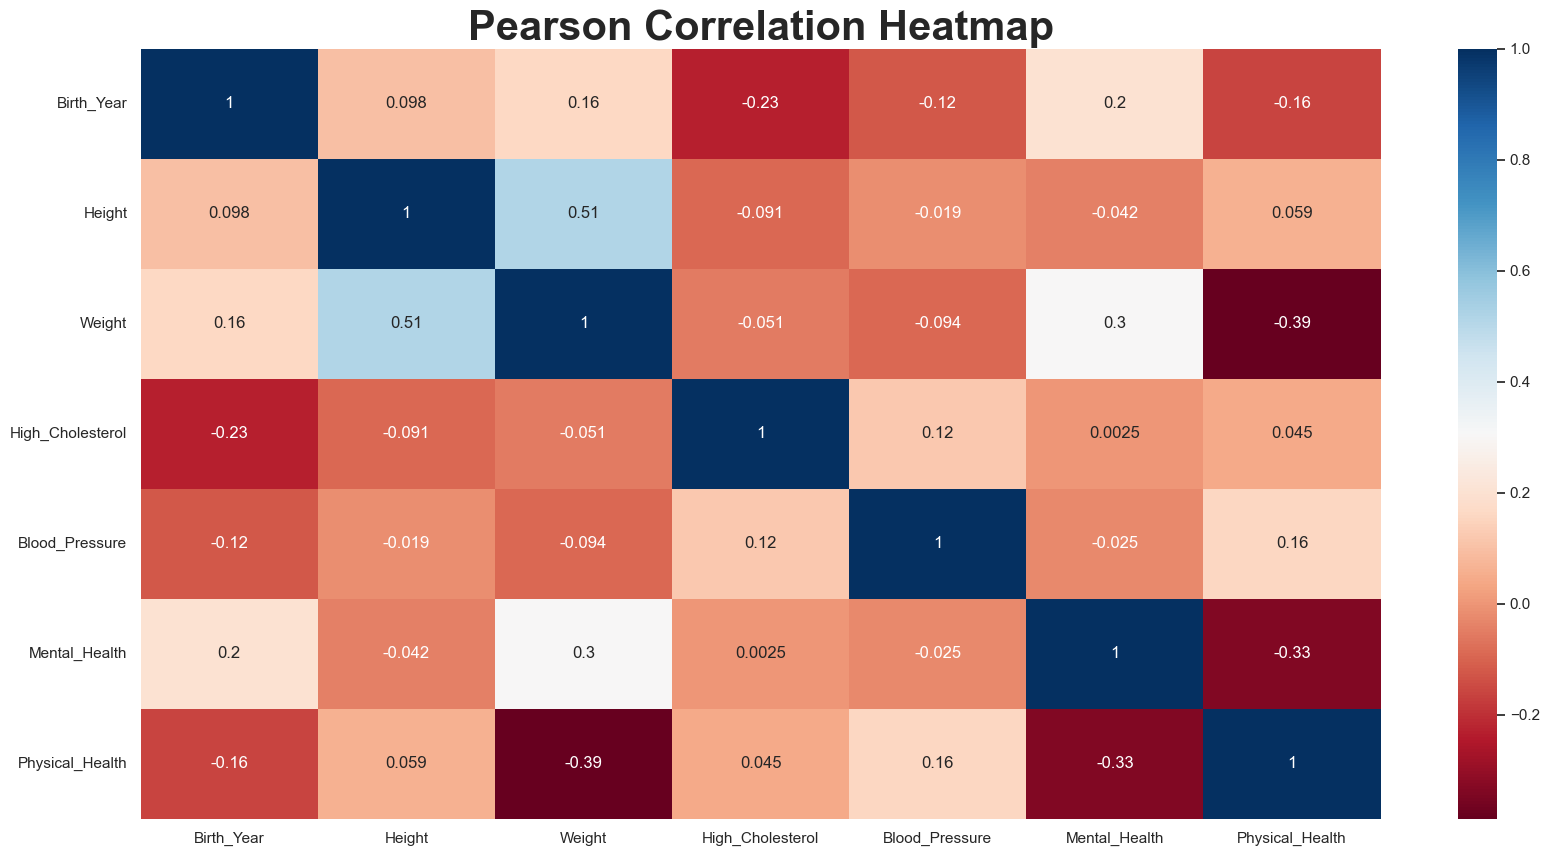

In [32]:
correlation_heatmap(data, metric)

There's no strong relationships among our variables. However, we can obseve that `Height` and `Weight` have a Pearson correlation of 0.51.

<a class='anchor' id="2.3.4"></a>

### 2.3.4 Non-metric Features

In [33]:
# We decided to remove the feature "Name" from out non-metric features, since it doesn't provide any useful 
# information, and would make our visualization tools even more incomprehensible

non_metric.remove("Name")

In [34]:
def absolute_freq(df, non_metric):

    # All Non-Metric Variables' Absolute Frequencies
    sns.set()
    sns.set(style="whitegrid")

    # Prepare figure. Create individual axes where each bar plot will be placed
    fig, axes = plt.subplots(3, ceil(len(non_metric) / 3), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each bar plot:
    for ax, feat in zip(axes.flatten(), non_metric):
        sns.countplot(x=df[feat].astype(object), ax=ax, palette="colorblind")

    plt.suptitle("Non-metric Variables' Absolute Frequencies", size = 30, fontweight="bold")
    plt.show()

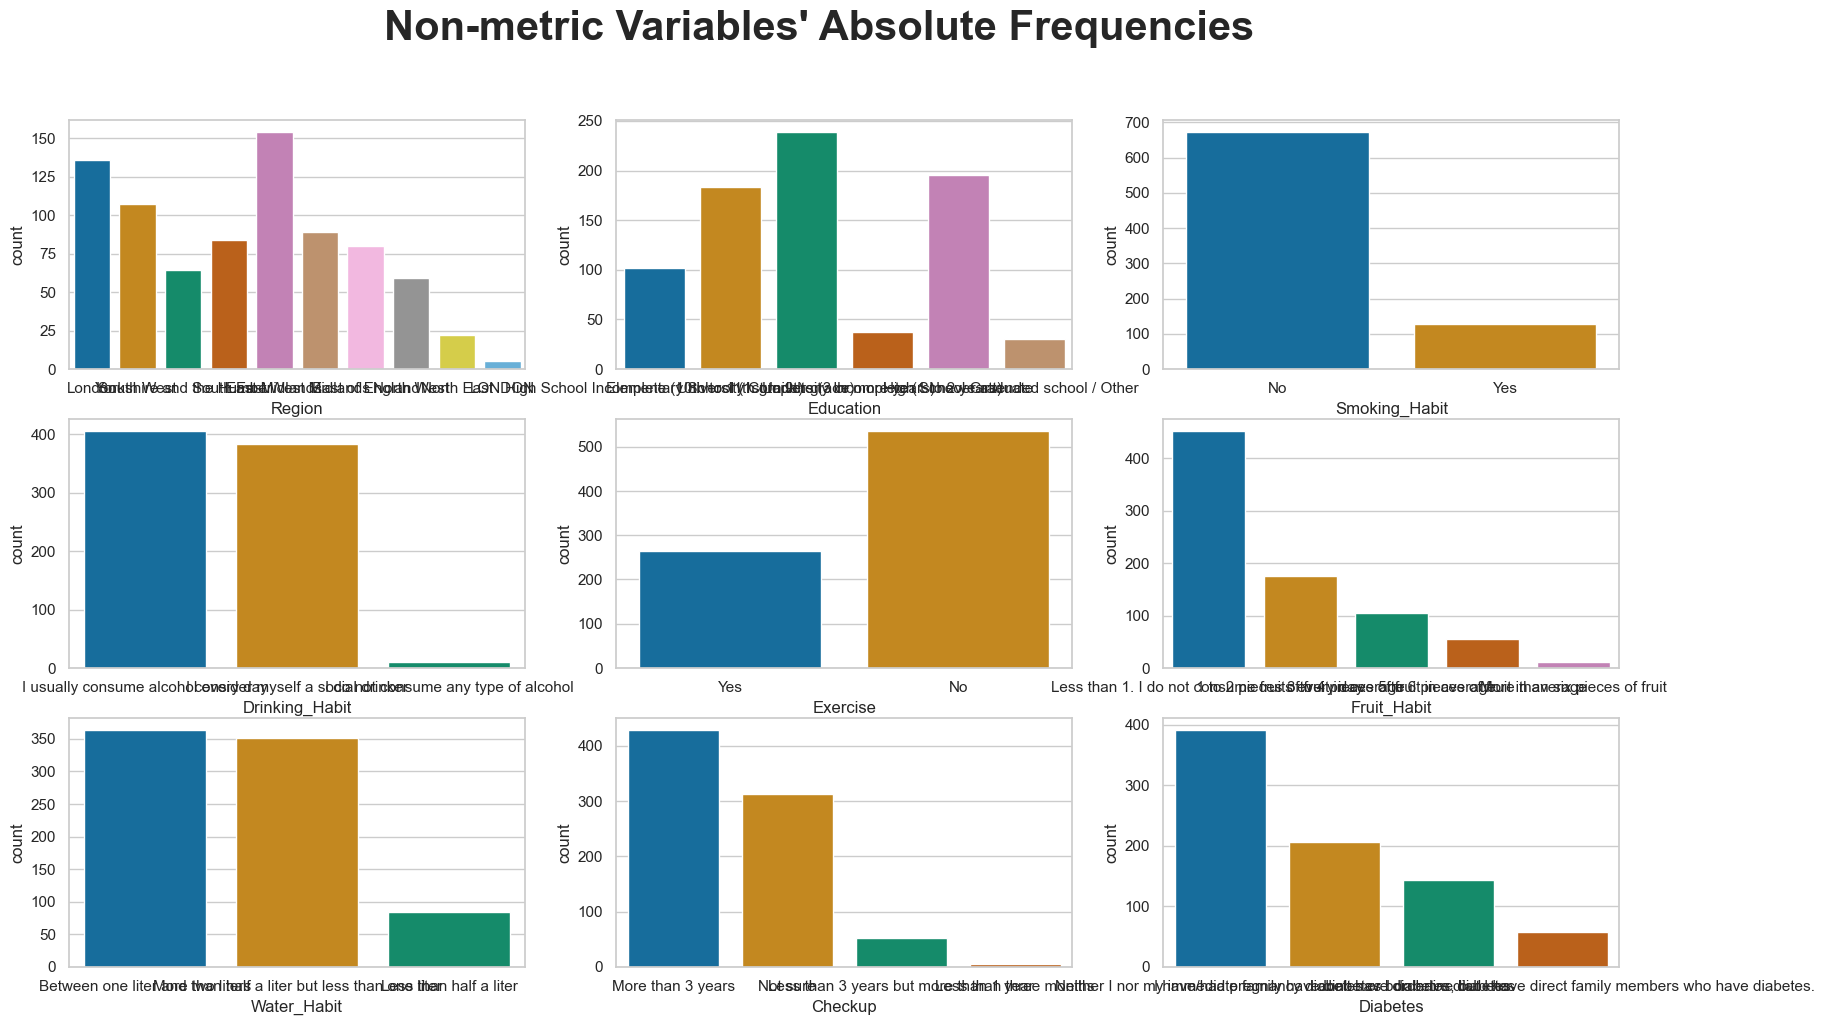

In [35]:
absolute_freq(data, non_metric)

<a class="anchor" id="2.3.5"></a>

### 2.3.5 Non-metric Variables" Segmented by the Target

In [36]:
def bar_charts_categorical(df, feature, target):
    
    # Data to plot
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    # Setting the Frequencies bar charts
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color=["#8b8b8c"])
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color=["#d8e43c"])
    plt.legend((p2[0], p1[0]), ("$y_i=1$", "$y_i=0$"))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")
    plt.xticks(rotation="vertical")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    # Setting the Proportions bar charts  
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color=["#8b8b8c"])
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color=["#d8e43c"])
    plt.legend((p2[0], p1[0]), ("$y_i=1$", "$y_i=0$"))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")

    plt.show()

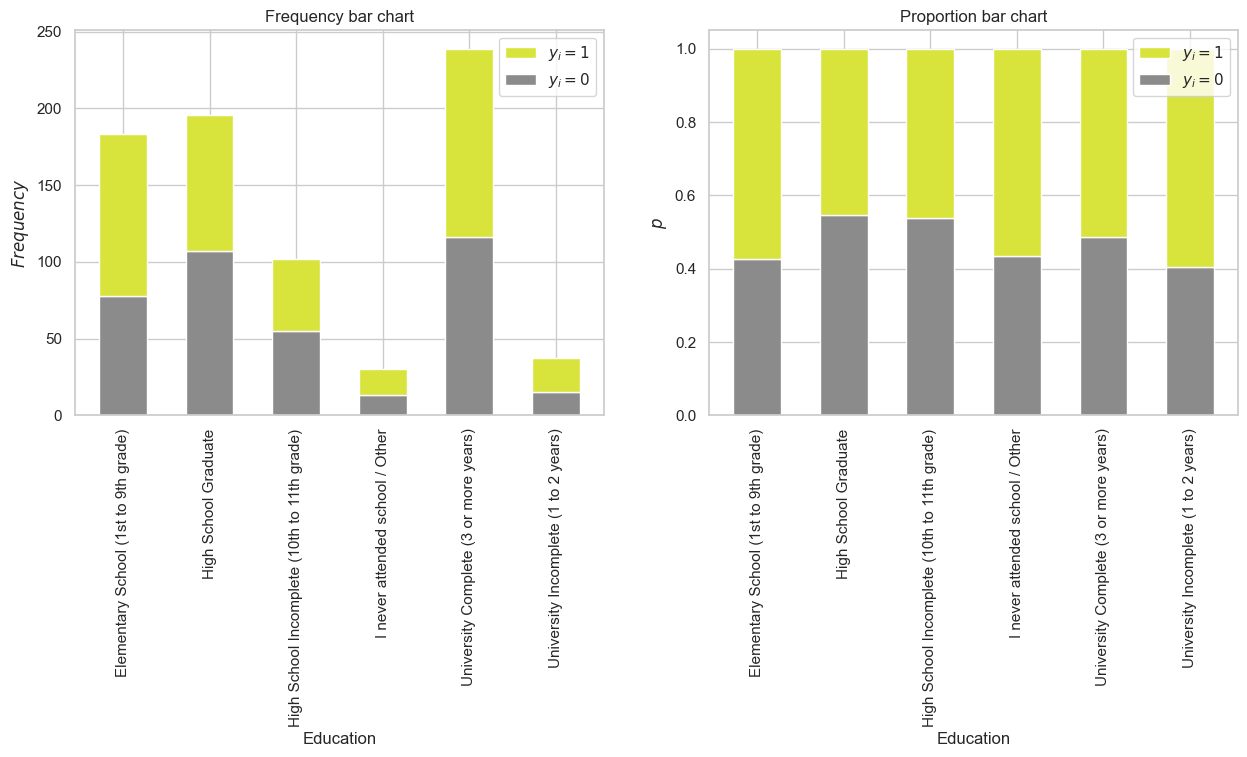

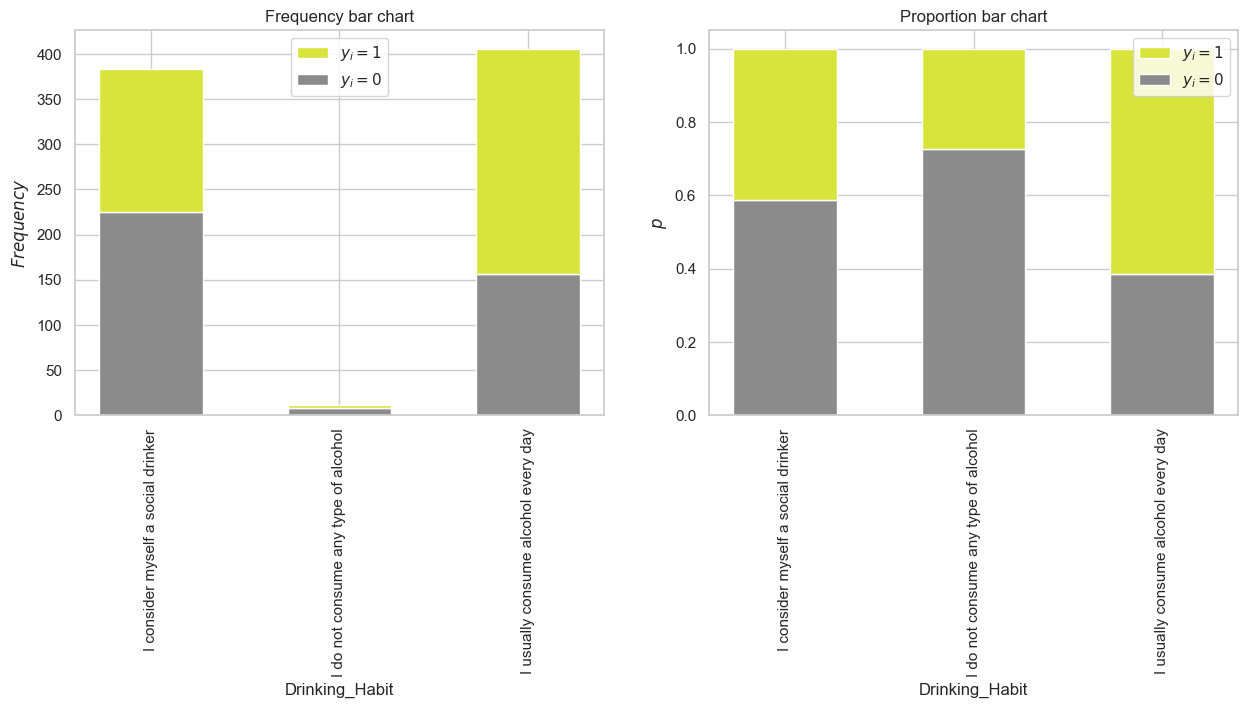

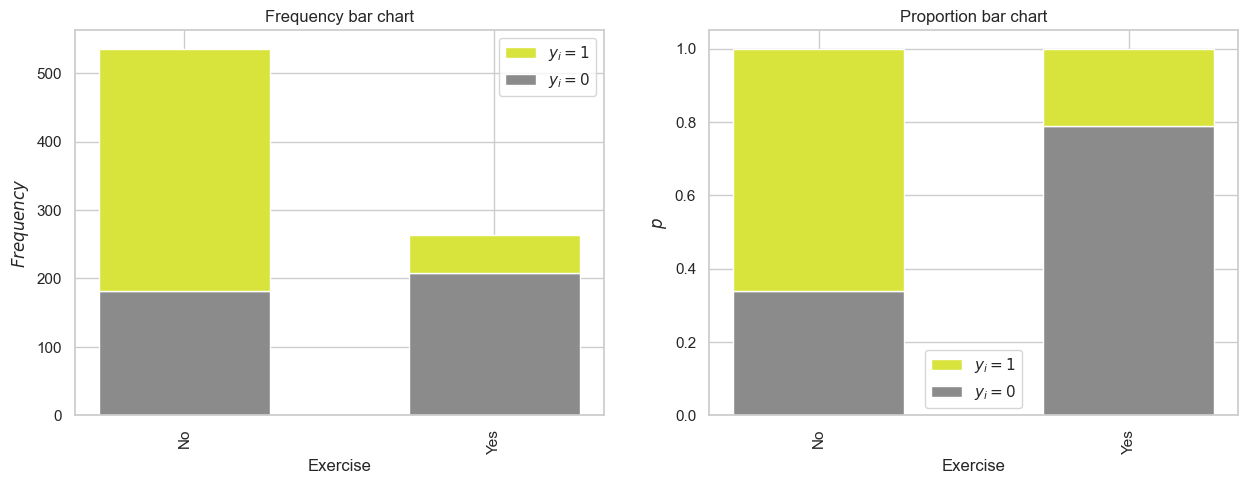

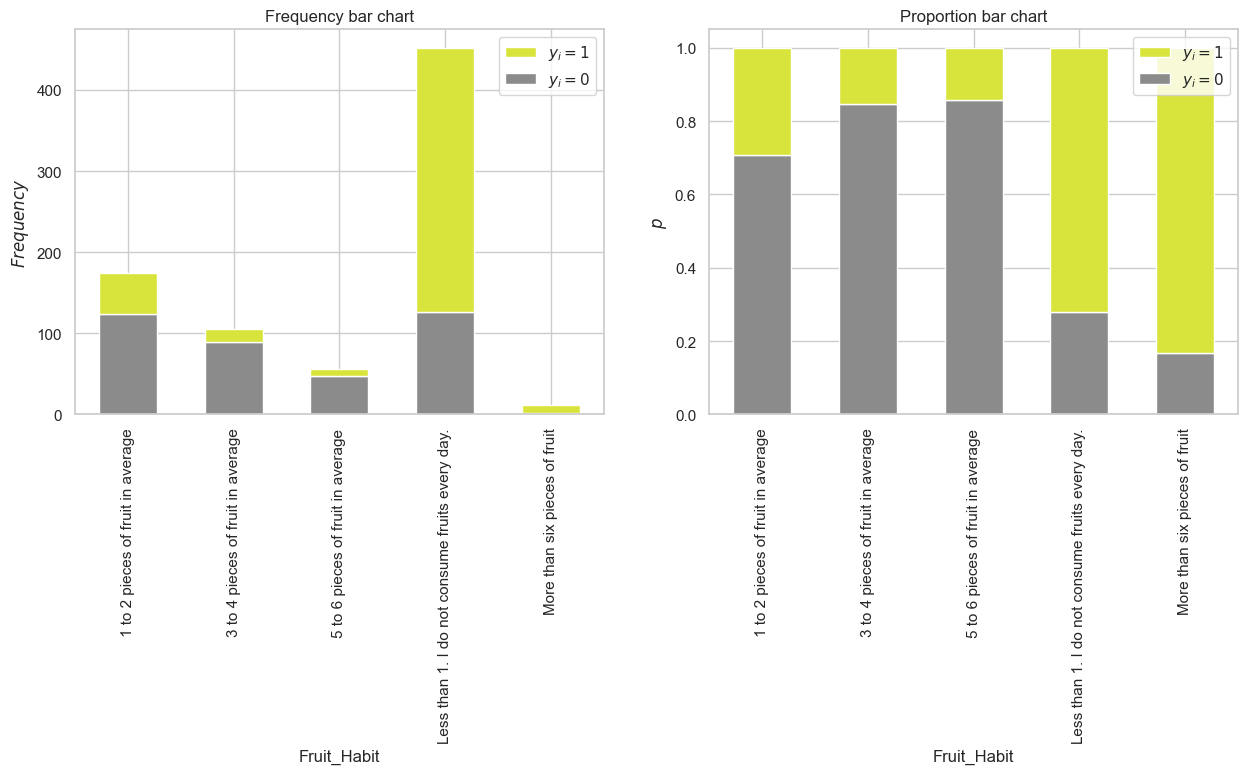

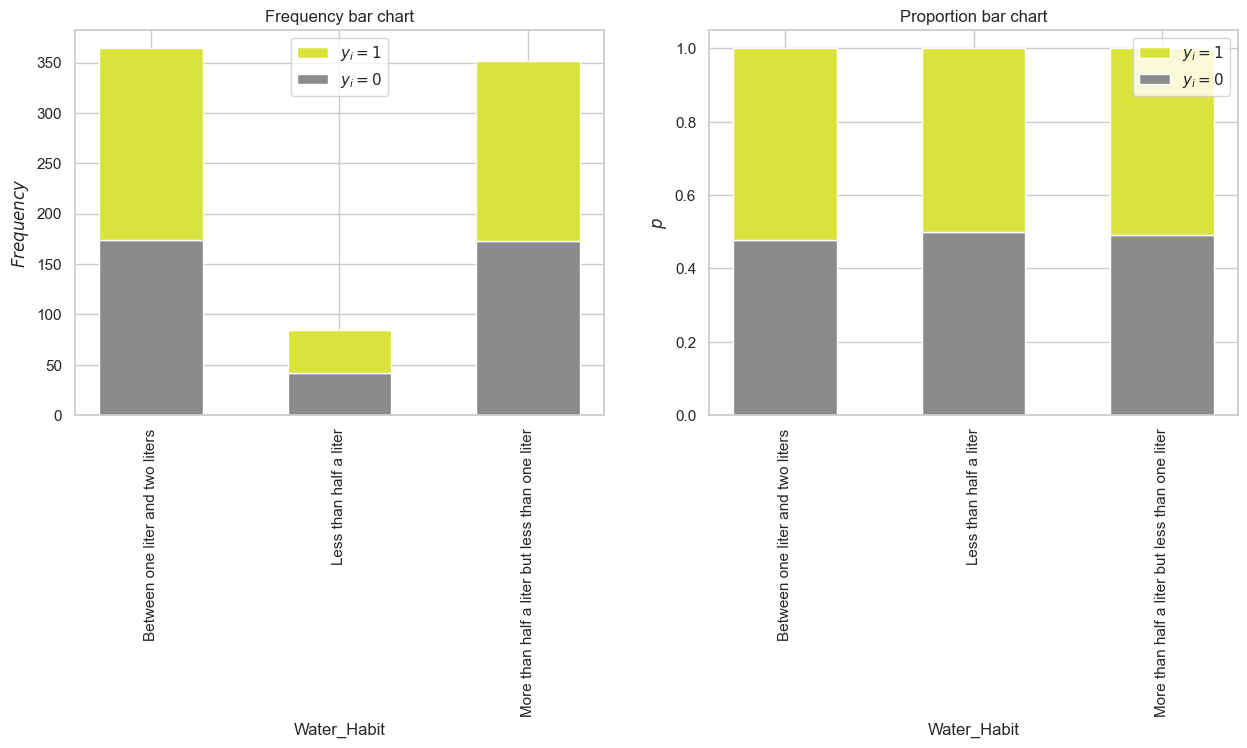

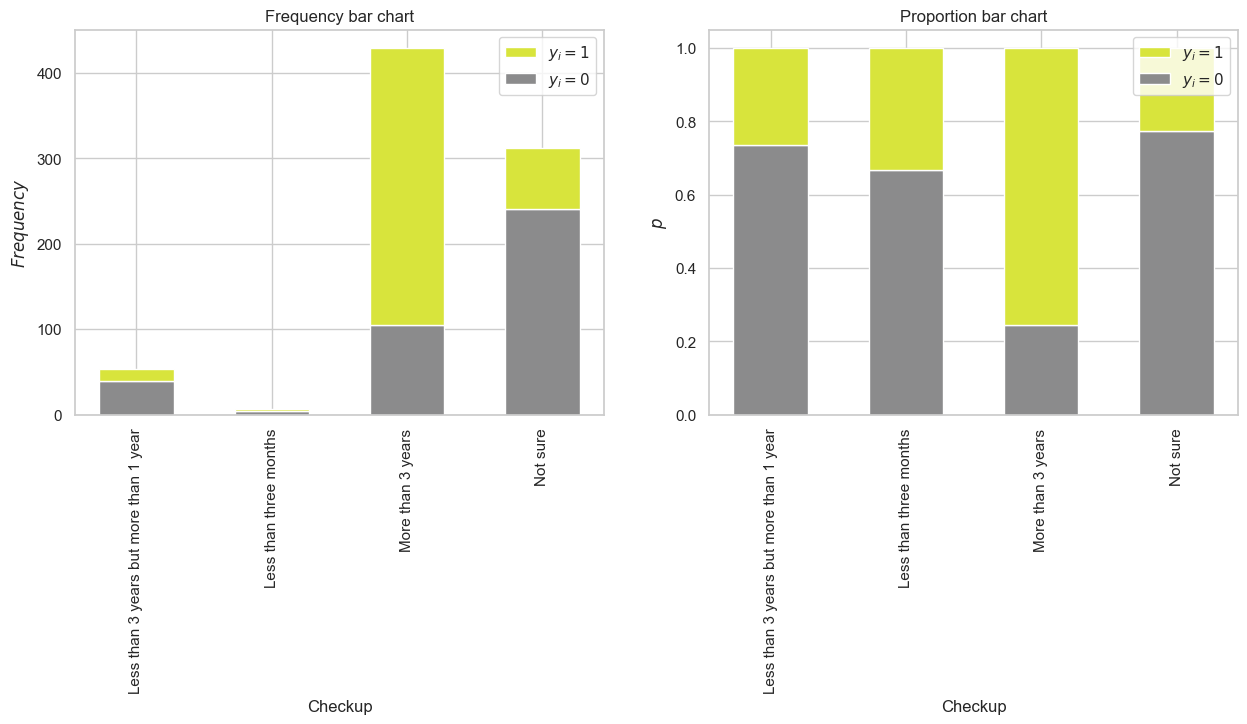

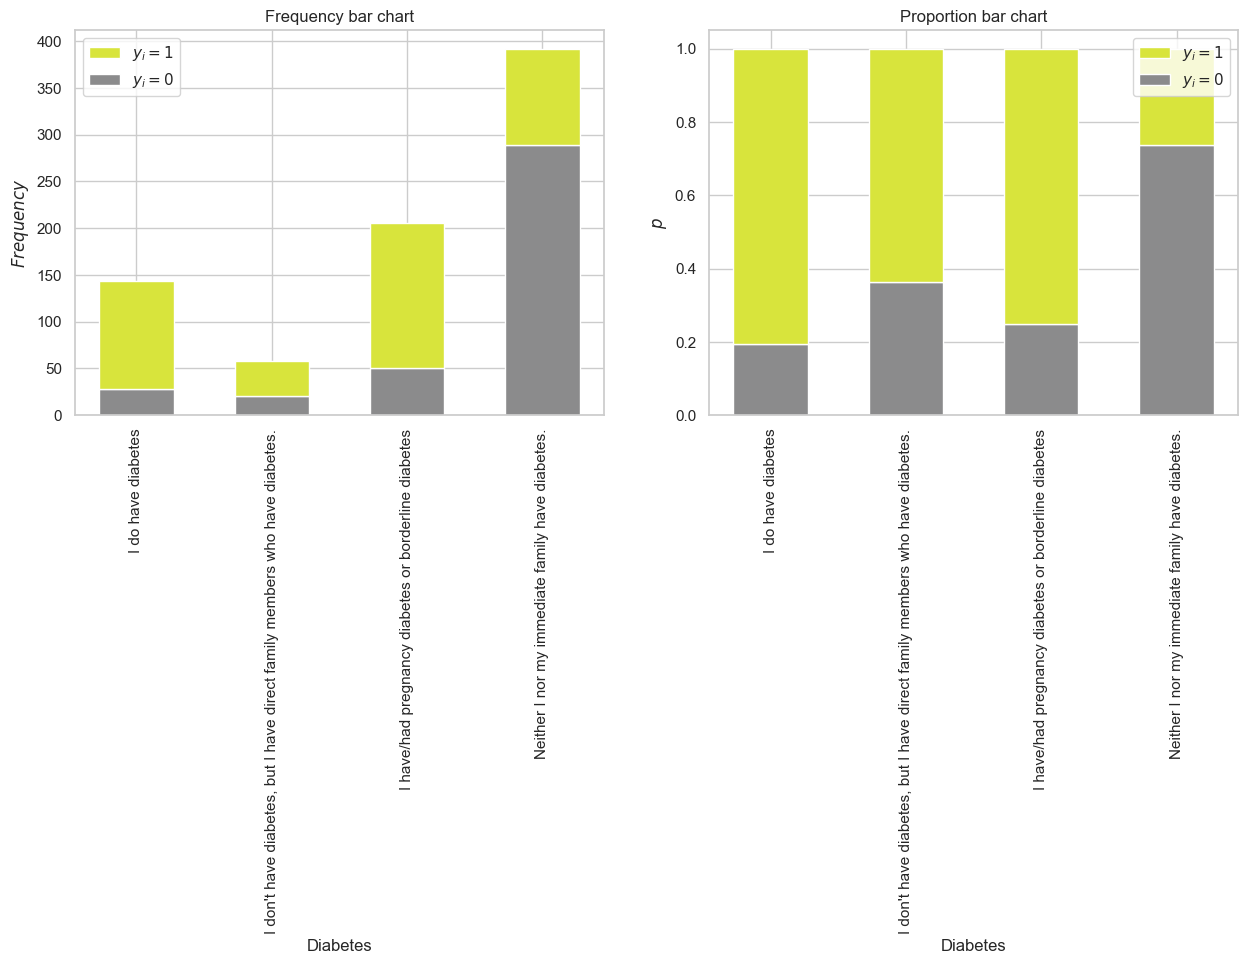

In [37]:
bar_charts_categorical(data_train, "Education", "Disease")

bar_charts_categorical(data_train, "Drinking_Habit", "Disease")

bar_charts_categorical(data_train, "Exercise", "Disease")

bar_charts_categorical(data_train, "Fruit_Habit", "Disease")

bar_charts_categorical(data_train, "Water_Habit", "Disease")

bar_charts_categorical(data_train, "Checkup", "Disease")

bar_charts_categorical(data_train, "Diabetes", "Disease")

These graphs present the comparison between the frequencies and proportions of each categorical variable.

<div class="alert alert-block alert-info"> <a id = "3"></a>
    
# 3. Pre-processing

<a class="anchor" id="3.1"></a>

## 3.1 Data Partition

Right now, we have four different datasets:
    
`data` - With all the independent variables (and without the target). Its shape is 800 rows x 17 columns.

`target` - With only the dependent variable (that is, "Disease"). Its shape is 800 rows x 1 column.

`data_train`- With all the independent and dependent variables. Its shape is 800 rows x 18 columns.
 
`data_test` - With all independent variables. Its shape is 225 rows x 17 columns.

Now, we have to **split** our dataset into train and validation, since we're going to start the **Data Pre-processing** part, and we don't want to use any information from validation/ test datasets to fill in, for example, missing values from the train dataset, since this can bias our results.

Once we already have a dataset to test (``data_test``), we only have to split our train datasset into train and validation.

In [38]:
# Split our data dataset into train (85%) and validation (15%)

X_train, X_valid, y_train, y_valid = train_test_split(data, 
                                                      target, 
                                                      test_size=0.15, 
                                                      random_state=2,
                                                      stratify= target,
                                                      shuffle = True)

In [39]:
# Check the percentages

print("Train:{}% | Validation:{}% | Test:{}%".format(round(len(X_train)/(len(data)+len(data_test))*100,0),
                                                     round(len(X_valid)/(len(data)+len(data_test))*100,0),
                                                     round(len(data_test)/(len(data)+len(data_test))*100,0)
                                                     ))

Train:66.0% | Validation:12.0% | Test:22.0%


In [40]:
# Create a copy of our train and validation datasets created before

X_train_baseline = X_train.copy()
X_valid_baseline = X_valid.copy()

<a class="anchor" id="3.2"></a>

## 3.2 Fixing Structural Errors

**`REGION`**

In the data exploration part, we noticed that the region London was displayed in two different ways: "LONDON" and "London". We will capitalize all the values of the variable, in case there are other regions with the same mistake in the test dataset.

In [41]:
# Make a copy of the datasets

X_train_struc = X_train.copy()
X_valid_struc = X_valid.copy()
X_test_struc  = data_test.copy()

In [42]:
def fix_struc_errors(df):
    
    # Capitalize all Region"s name, since there can be more inconsistencies 
    
    df["Region"]= df["Region"].str.capitalize()

    return df

In [43]:
# Apply the function to our datasets

X_train_struc = fix_struc_errors(X_train_struc)
X_valid_struc = fix_struc_errors(X_valid_struc)
X_test_struc  = fix_struc_errors(X_test_struc)

<a class="anchor" id="3.3"></a>

## 3.3 Cardinality

**`EDUCATION`**

We also noticed that some values in the feature `Education` might be redundant. Let"s correct this problem.

In [44]:
# Make a copy of the datasets

X_train_card = X_train_struc.copy()
X_valid_card = X_valid_struc.copy()
X_test_card = X_test_struc.copy()

In [45]:
def error_education(df, column_name):
    
    # High School Incomplete (10th to 11th grade) is the same as Elementary School (1st to 9th grade)

    df[column_name].replace("High School Incomplete (10th to 11th grade)", 
                              "Elementary School (1st to 9th grade)", 
                              inplace=True) # Inplace = True to apply the changes directly to the dataset

    # University Incomplete (1 to 2 years) is the same as High School Graduate

    df[column_name].replace("University Incomplete (1 to 2 years)", 
                          "High School Graduate", 
                          inplace=True)  # Inplace = True to apply the changes directly to the dataset
    
    # Return the values of the feature to make sure we don"t have redundant values anymore
    
    return df

In [46]:
# Apply our function to the X_train_card dataset

X_train_card = error_education(X_train_card, "Education")
X_valid_card = error_education(X_valid_card, "Education")
X_test_card = error_education(X_test_card, "Education")

<a class="anchor" id="3.4"></a>

## 3.4 Removal of Unwanted Observations

**`DRINKING_HABIT`** and **`CHECKUP`**

In the `Drinking Habit` feature, there are only 11 observations who answered _"I do not consume any type of alcohol"_ to the question _"What is your behavior concerning alcohol consumption?"_. 

For the feature `Checkup`, there are only 6 patients who answered _"Less than three months"_ to the question _"How long has it been since you last visited a doctor for a routine Checkup?"_.

After visualizing the proportion and frequencies barplots in the **Data Visualization** chapter, we saw that its proportion is very small when compared to the total observations of the dataset. For that reason, we decided to convert those values to **Missing Values**, and will treat them in further steps.

In [47]:
# Make a copy of the datasets

X_train_obs = X_train_card.copy()
X_valid_obs = X_valid_card.copy()
X_test_obs = X_test_card.copy()

In [48]:
def remove_values(df):
    
    # Replace the values with Missing Values
    # Inplace = True to apply directly to df
    df.replace("I do not consume any type of alcohol", np.NaN, inplace=True)
    
    df.replace("Less than three months", np.NaN, inplace=True)
    
    return df

In [49]:
# Apply the function directly to our datasets

X_train_obs =remove_values(X_train_struc)
X_valid_obs=remove_values(X_valid_struc)
X_test_obs=remove_values(X_test_struc)

In [50]:
# Checking the ammount of missing values we have per feature in the train dataset

X_train_obs.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           10
Smoking_Habit        0
Drinking_Habit      11
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              6
Diabetes             0
dtype: int64

In the `X_train_obs` dataset, now, we have the following missing values:
- `Education`: 10 missing values
- `Drinking_Habit`: 11 missing values (just imputed) 
- `Checkup`: 6 missing values (just imputed) 

<a class="anchor" id="3.5"></a>

## 3.5 Outliers

In this chapter, we'll test two different approaches of treating outliers - Manual Filtering and the IQR Method.

In [51]:
# Create a copy of the data dataset to apply different methods of outlier removal

X_train_out = X_train_obs.copy()
X_valid_out = X_valid_obs.copy()
X_test_out = X_test_obs.copy()

In [52]:
# Create a function to return box plots and histograms so we can visualize our features properly

def display_outliers(df):
    
    # Numeric Features
    
    numeric_features = df[df.select_dtypes(include=np.number).columns.tolist()].columns
    
    # Layout
    
    fig, ax = plt.subplots(math.ceil(len(numeric_features)/2),4, figsize = (30,30))
    ax_flat1 = list(ax.flatten())[::2]
    ax_flat2 = list(ax.flatten())[1::2]
    
    # Iterate across each feature to create the histograms and boxplots
    
    for i, feat in zip(range(len(ax_flat1)), numeric_features):
        ax_flat1[i].hist(df[feat], bins = 50, color = "#8b8b8c")
        ax_flat2[i].boxplot(df[feat], notch = True)
        ax_flat1[i].set_title(feat)
        ax_flat2[i].set_title(feat)

    plt.show()

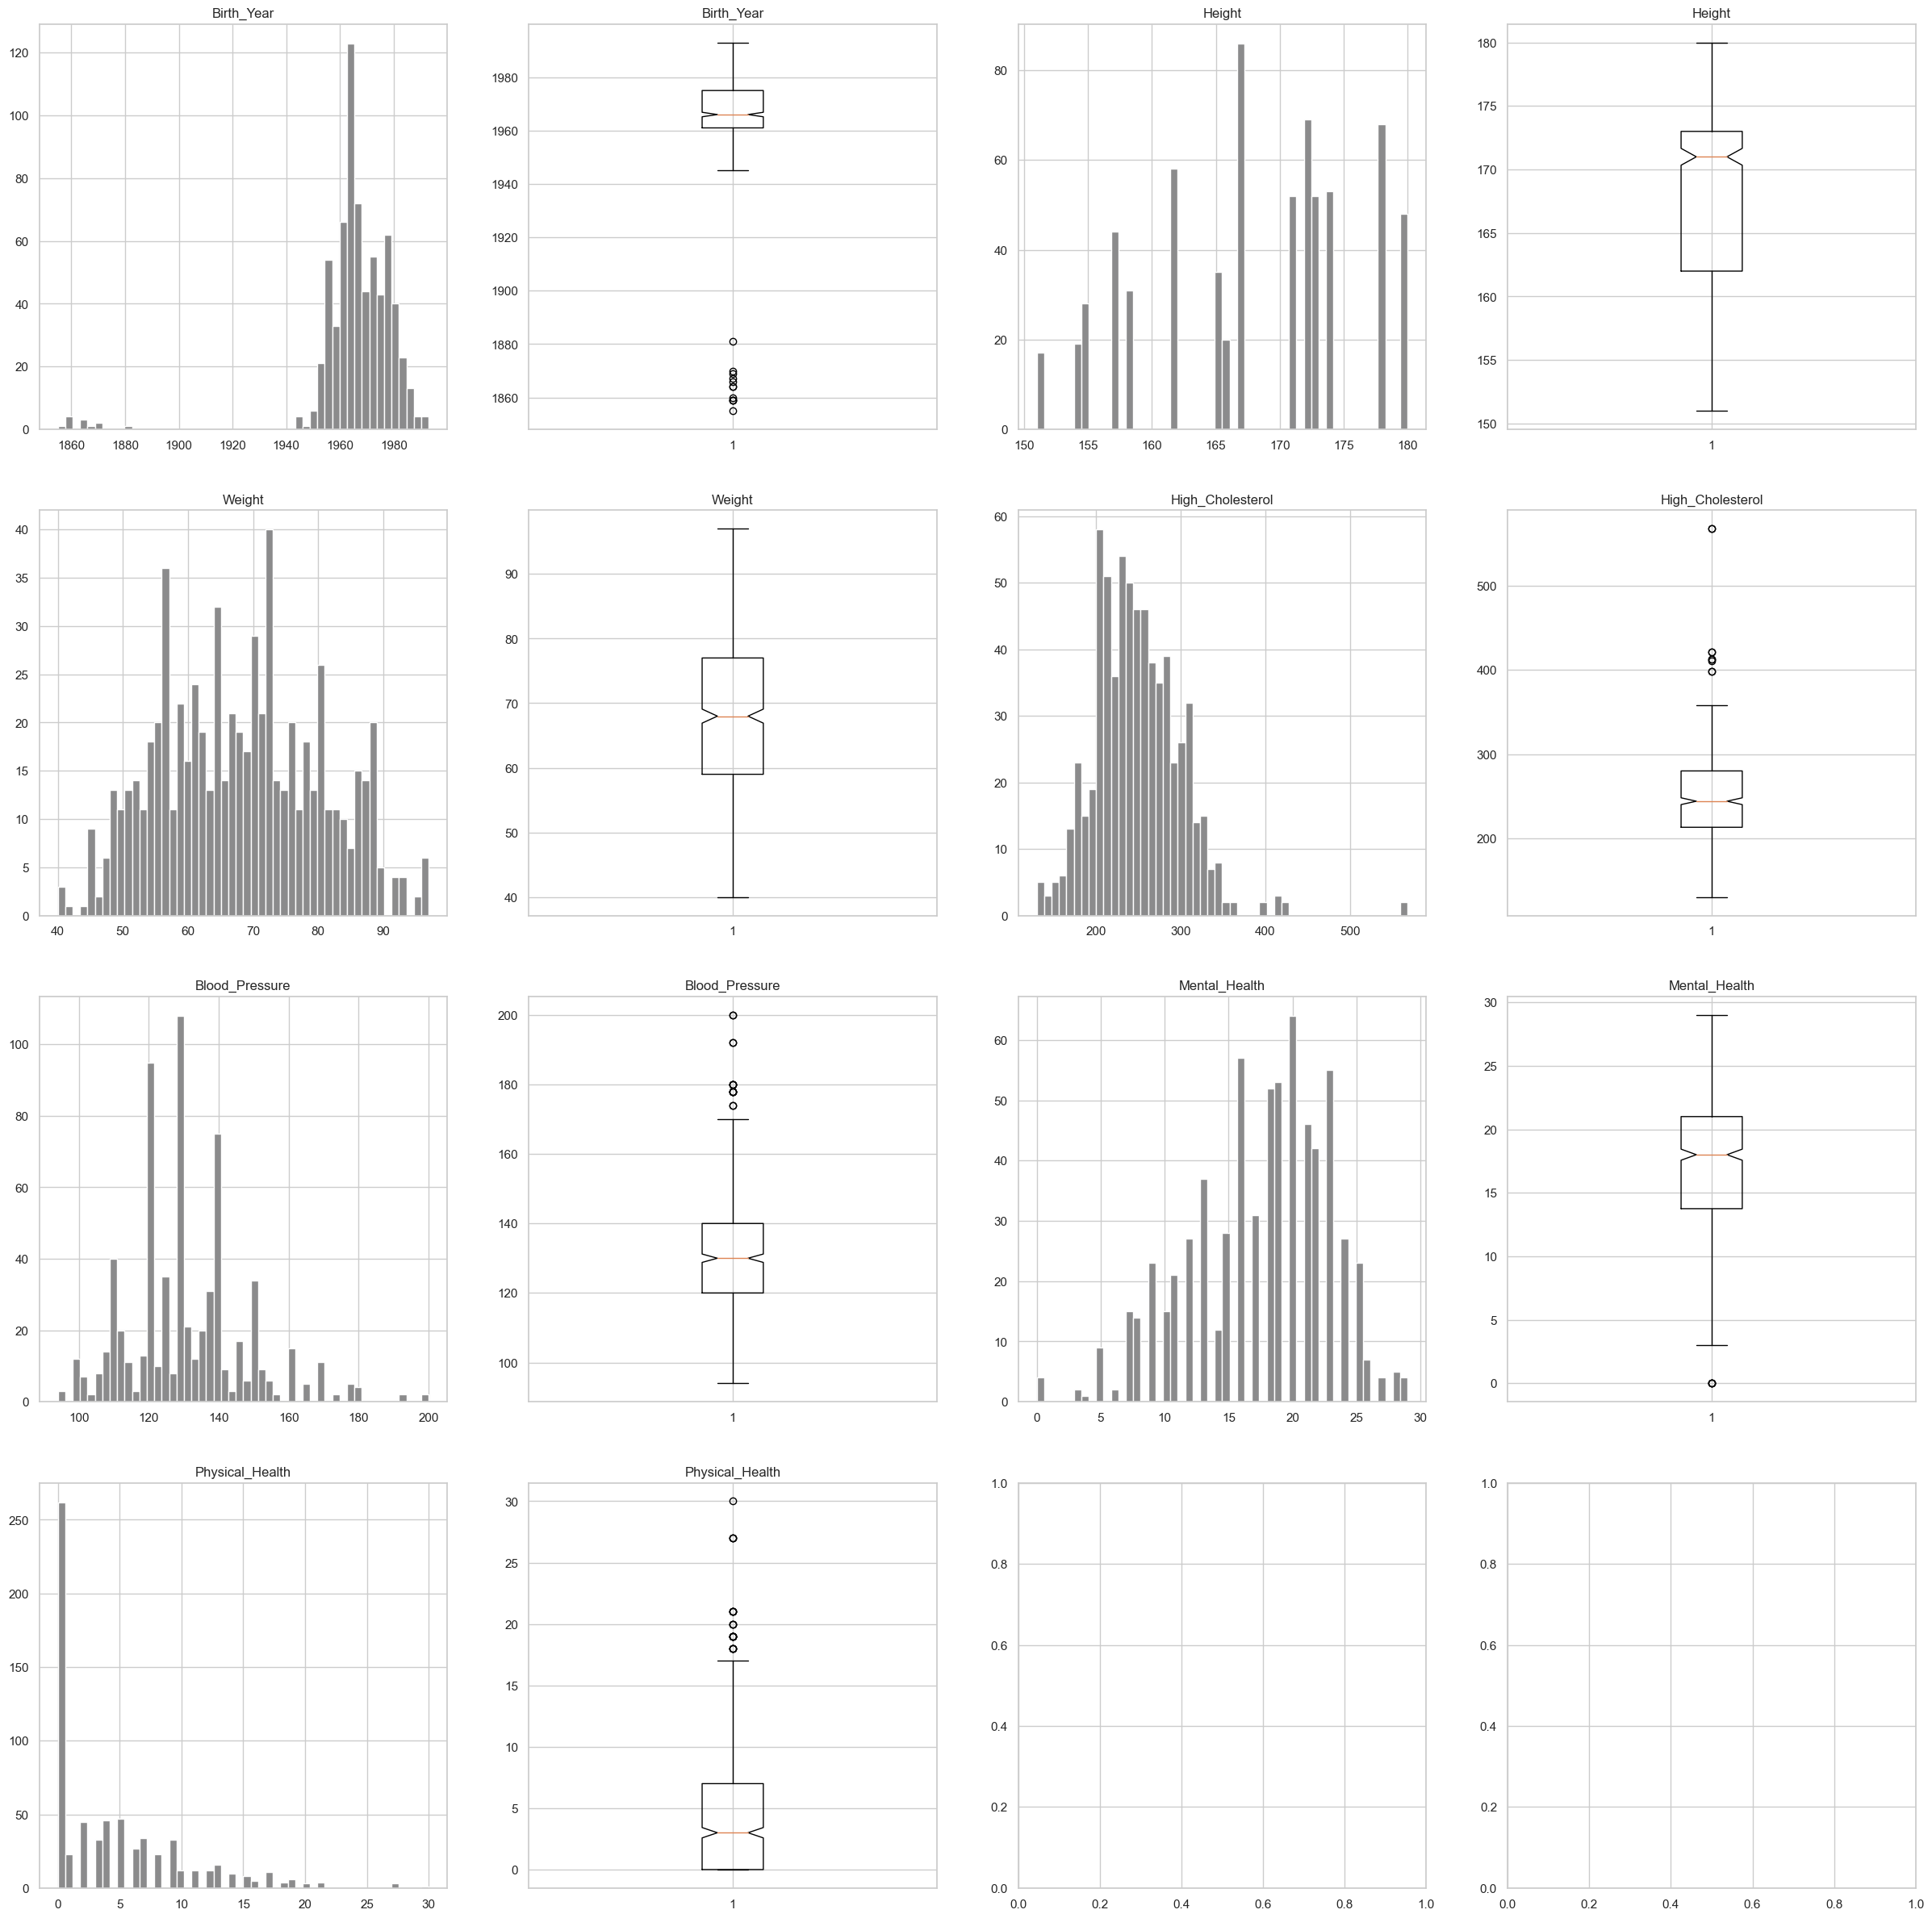

In [53]:
# Apply the function to visualize

display_outliers(X_train_out)

<a class="anchor" id="3.5.1"></a>

### 3.5.1 Manual Filtering

We will apply a Manual Filter on the extreme values of the variables `Birth_Year`, `High_Cholesterol` and `Blood_Pressure` that we considered that were not correct. Let's also take into consideration that the filters we applied, were only for **extreme values**, since the rest of them, eventhough being outliers, represent real behaviour. `Physical_Health` also has outliers, we will keep these values because, once again, represent real behavior.

In [54]:
def outliers_filtering(df):
    
    # Create the filters for the features, based on what we see on the boxplots and histograms

    filters = (
        (df["Birth_Year"]>1920) &  
        
        (df["High_Cholesterol"]<500) & 
        
        (df["Blood_Pressure"]<185)
    )
    
    # Apply the filters to the dataframe
    
    df_filter = df[filters]
    
    # Return the dataset with the filters
    
    return df_filter

In [55]:
# Apply the function to our outliers dataset - X_train_out - and store it into a new variable one

X_train_manual_filter = outliers_filtering(X_train_out)

# Check the percentage of data kept using this Manual Filtering Method

print("Percentage of data kept after removing outliers:", 
      np.round(X_train_manual_filter.shape[0] / X_train_out.shape[0] * 100, 4), 
      "%")

Percentage of data kept after removing outliers: 97.5 %


In [56]:
# Apply the function also to the validation and test datasets

X_valid_manual_filter = outliers_filtering(X_valid_out)
X_test_manual_filter = outliers_filtering(X_test_out)

<a class="anchor" id="3.5.2"></a>

### 3.5.2 IQR Method

The Inter Quartile Range (IQR) Method sets up a "fence" outside of quartiles 1 and 3, and any values that fall outside these values are considered outliers. Then, these observations that are outside the box are deleted from the dataset.

Adapted from: https://online.stat.psu.edu/stat200/lesson/3/3.2

In [57]:
def outliers_IQR(df, metric_features):
    
    # Calculating the quartiles and the inter quartil range
    
    q25 = df[metric_features].quantile(.25)
    q75 = df[metric_features].quantile(.75)
    IQR = (q75 - q25)
    
    # Defining the upper and lower limits
    
    upper_lim = q75 + 1.5 * IQR
    lower_lim = q25 - 1.5 * IQR
    
    filter = []
    
    # Iterate across each metric feature
    
    for metric in metric_features:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filter.append(df[metric].between(llim, ulim, inclusive = "both"))
        
    filter = pd.Series(np.all(filter, 0), index = df.index)

    # Apply the filter to the dataframe
    
    df_filter = df[filter]
    
    # Return the new dataframe without outliers
    
    return df_filter

In [58]:
# Apply the function to our outliers dataset - X_train_out - and store it into a new variable one

X_train_IQR = outliers_IQR(X_train_out, metric)

# Check the percentage of data kept using this method

print("Percentage of data kept after removing outliers:", 
      np.round(X_train_IQR.shape[0] / X_train_out.shape[0] * 100, 2),
      "%")

Percentage of data kept after removing outliers: 92.06 %


In [59]:
# Apply the function also to the validation and test datasets

X_valid_out_IQR = outliers_IQR(X_valid_out,metric)
X_test_out_IQR = outliers_IQR(X_test_out,metric)

<a class="anchor" id="3.5.3"></a>

### 3.5.3 Final Insights

Let's take into consideration the acceptable range of values to remove outliers, that is, usually around 5% of the dataset.

With the `Manual Filtering Method`, we removed around 2.5% of the dataset.

Using the `IQR Method` we can see that around 8% of the observations were deleted, which we consider a high proportion compared to the small size of the dataset, and won"t keep going with this approach.

With that said, we'll keep going with 2 types of approaches: a dataset without outliers (because these were removed with the manual filtering method), and a dataset with outliers, since we have some models that work better with outliers.

In [60]:
# Apply the manual filter and store it into a variable called X_train_out_mf

X_train_out_mf = X_train_manual_filter.copy()
X_valid_out_mf = X_valid_manual_filter.copy()
X_test_out_mf= X_test_out.copy()

Right now, we have 2 different kind of datasets:

- `X_train_out_mf` - that doesn't have outliers, since these were removed with the manual filter;

- `X_train_out` - that has outliers, since no approach was done to this dataset.

IMPORTANT: we do **not** aply the outlier removal to the test dataset

<a class="anchor" id="3.6"></a>

## 3.6 Missing Values

As seen in the Data Exploration chapter, we had some missing values in the feature `Education`. Additionally, we converted some unwanted observations into missing values in variables``Checkup`` and ``Drinking_Habit``. Note that we only have missing values in non-metric features.

There are different ways to handle missing values, such as: **delete** them, **impute the mode, median or mean**, or **predict** their value. We"ll try the two first approaches and decide which one we"re going to use.

In [61]:
# Create a copy of the datasets to apply different methods of treating missing values

# Copy of the datasets without outliers

X_train_mf_miss = X_train_out_mf.copy()
X_valid_mf_miss = X_valid_out_mf.copy()
X_test_mf_miss  = X_test_out_mf.copy()

# Copy of the datasets with outliers

X_train_miss = X_train_out.copy()
X_valid_miss = X_valid_out.copy()
X_test_miss  = X_test_out.copy()

<AxesSubplot: >

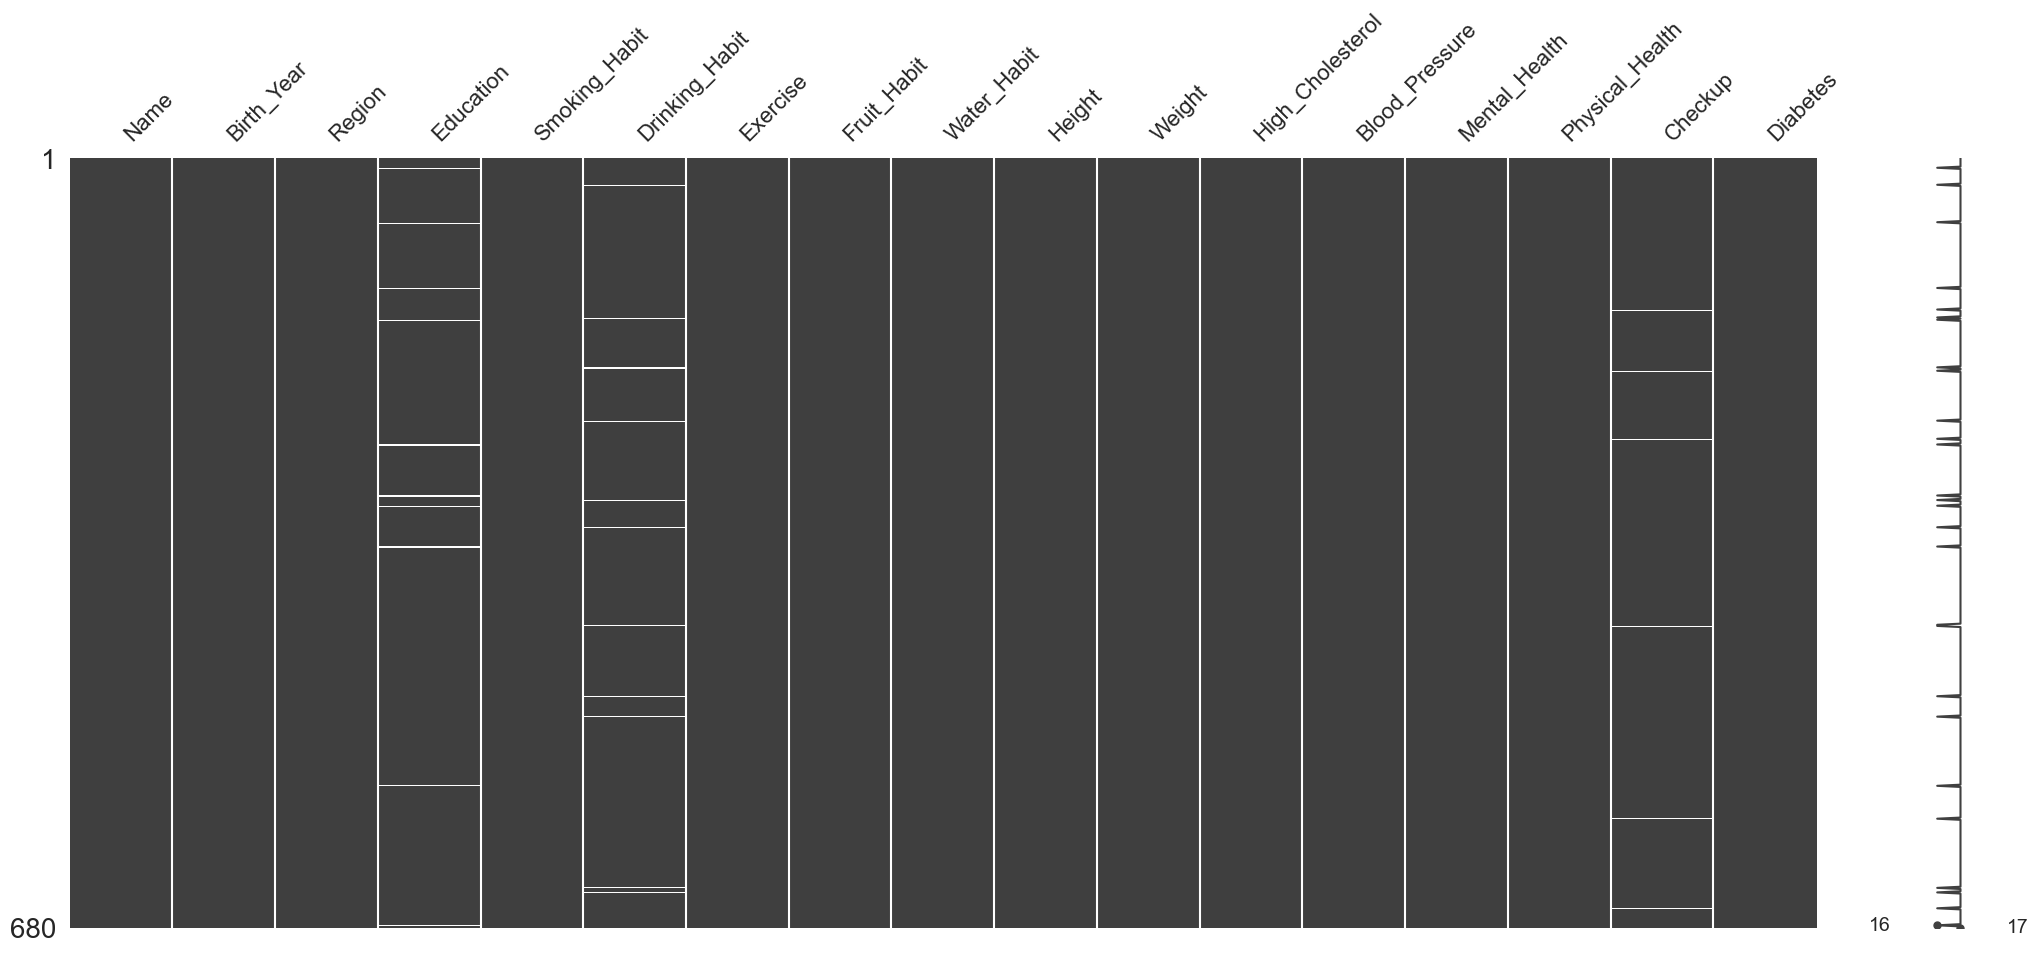

In [62]:
msno.matrix(X_train_miss)

In [63]:
# How many missing values do we have and in which features:

print(X_train_miss.isna().sum())

# Display all rows that we have missing values for visualization purposes

display(X_train_miss[X_train_miss.isna().any(axis=1)])

Name                 0
Birth_Year           0
Region               0
Education           10
Smoking_Habit        0
Drinking_Habit      11
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              6
Diabetes             0
dtype: int64


,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1085,Mr. Robert Swenson,1978,South west,NaN,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes
2005,Mrs. Penelope Beaty,1967,London,High School Incomplete (10th to 11th grade),No,NaN,Yes,1 to 2 pieces of fruit in average,Less than half a liter,166,67,209,128,13,9,Not sure,Neither I nor my immediate family have diabetes.
1195,Mr. John Hess,1963,London,NaN,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,84,216,150,19,7,More than 3 years,I have/had pregnancy diabetes or borderline di...
1904,Mr. Manuel Rothwell,1967,East midlands,NaN,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,82,266,130,19,0,More than 3 years,I do have diabetes
1734,Mr. Robert Ogburn,1970,South east,High School Graduate,Yes,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Less than half a liter,162,59,208,128,19,4,NaN,Neither I nor my immediate family have diabetes.
1716,Mrs. Margaret Chin,1967,North west,University Complete (3 or more years),No,NaN,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,68,209,128,13,9,Not sure,Neither I nor my immediate family have diabetes.
1072,Mr. Steven Fisher,1866,East midlands,NaN,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,171,62,253,125,16,5,More than 3 years,Neither I nor my immediate family have diabetes.
1986,Mrs. Sonia Johnson,1967,London,Elementary School (1st to 9th grade),No,NaN,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,157,56,331,180,10,16,More than 3 years,Neither I nor my immediate family have diabetes.
1893,Mr. Anthony Malone,1970,London,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,52,208,128,19,4,NaN,Neither I nor my immediate family have diabetes.


In [64]:
# Create a function that will return us a table with the ammount of zeros, of missing values and the percentage of
# missing values in out dataframe

def missin_values(df):
    
    # Get the total quantity of zeros in our dataset, and build a DataFrame with it
    
    zeros = df[df==0].count().to_frame().rename(columns = {0:"Zeros"}) # The name of the column is Zeros
    
    # Get the total quantity of missing values (NaN) in our dataset, and build a DataFrame with it
    
    missing = df.isnull().sum().to_frame().rename(columns = {0:"Missing_values"}) # The name of the column is Missing_values
    
    # Get the percentage of the missing values of our dataset
    
    missing_percent = df.isnull().mean()*100
    
    # And build a DataFrame with the missing_percent calculated before
    
    missing_percent_2 = missing_percent.to_frame().rename(columns = {0:"Missing_values_percent"}) # The name of the column is Missing_values_percent

    # Finally, concatenate all 3 columns created
    
    df = pd.concat([zeros, missing, missing_percent_2], axis=1)
    
    # For visualization purposes, let"s turn red the values that we have to treat, and green the rest (non-problematic values)
    
    def color_negative_red(val):
        color = "red" if val > 0 else "green"
        return "color: %s" % color
    
    # Return the dataframe
    
    return df.style.applymap(color_negative_red)

In [65]:
# Apply the funtion to out X_train_miss dataset

missin_values(X_train_miss)

,Zeros,Missing_values,Missing_values_percent
Name,0,0,0.000000
Birth_Year,0,0,0.000000
Region,0,0,0.000000
Education,0,10,1.470588
Smoking_Habit,0,0,0.000000
Drinking_Habit,0,11,1.617647
Exercise,0,0,0.000000
Fruit_Habit,0,0,0.000000
Water_Habit,0,0,0.000000
Height,0,0,0.000000


Summing up:
- We have 262 zeros in `Physical_Health`. These values have to do with the answer to the question: *Thinking about your physical health, which includes physical illness and injury,for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?*
    
- 10 missing values in `Education`. These values were already NaN values from the original dataset.

- 11 missing values in `Drinking_Habit`, which represents around 1,18% of the observations; These values were inputed as NaN values in **3.4 - Removal of Unwanted Observations**.

- 6 missing values in `Checkup`, which represents around 0,88% of the observations. These values were inputed as NaN values in **3.4 - Removal of Unwanted Observations**.

Now, let's start exploring the different ways we have to treat missing values.

In [66]:
# Do a list of our metric and non-metric features

metric = list(X_train_miss[X_train_miss.select_dtypes(include=np.number).columns.tolist()].columns) 

non_metric = list(X_train_miss[X_train_miss.select_dtypes(include=np.object).columns.tolist()].columns)

<a class="anchor" id="3.6.1"></a>

### 3.6.1 Delete

The first method we'll try, is deleting the observations that have missing values. The 27 observations with missing values represent around 5% of the training dataset, so deleting them should not be problematic.

In [67]:
# Create a copy of the datasets to apply the deleting method

# Copy of the datasets without outliers

X_train_mf_miss_del = X_train_mf_miss.copy()
X_valid_mf_miss_del = X_valid_mf_miss.copy()
X_test_mf_miss_del = X_test_mf_miss.copy()

# Copy of the datasets with outliers

X_train_miss_del = X_train_miss.copy()
X_valid_miss_del = X_valid_miss.copy()
X_test_miss_del = X_test_miss.copy()

In [68]:
def nan_delete(df):
    
    # Delete the missing values using the dropna method
    
    df.dropna(inplace=True)
    
    return df

In [69]:
# Test the function in each dataset 

# Dataset with outliers

X_train_miss_del = nan_delete(X_train_miss_del)

print("Percentage of data kept after deleting missing values:", 
      np.round((X_train_miss_del.shape[0] / X_train_miss.shape[0] * 100), 2),
      "%")


Percentage of data kept after deleting missing values: 96.03 %


In [70]:
# Dataset without outliers

X_train_mf_miss_del = nan_delete(X_train_mf_miss_del)

print("Percentage of data kept after deleting missing values:", 
      np.round((X_train_mf_miss_del.shape[0] / X_train_miss.shape[0] * 100), 2), "%")

Percentage of data kept after deleting missing values: 93.68 %


The percentage of deleted data in both datasets:
- Around 4% in the dataset with outliers.
- Around 6,3% in the dataset without outliers.

<a class="anchor" id="3.6.3"></a>

### 3.6.2 Simple Imputer

SimpleImputer is a helpful scikit-learn class, useful to handle the missing data in a dataset. It replaces the missing values with a specified strategy (mean, median, mode, constant). In this case, we decided to use the mode for the non-metric features and the mean for the metric features.

Adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [71]:
# Create a copy of the datasets to apply the Simple Imputer method

# Copy of the datasets without outliers

X_train_mf_miss_SI = X_train_mf_miss.copy()
X_valid_mf_miss_SI = X_valid_mf_miss.copy()
X_test_mf_miss_SI = X_test_mf_miss.copy()

# Copy of the datasets with outliers

X_train_miss_SI = X_train_miss.copy()
X_valid_miss_SI = X_valid_miss.copy()
X_test_miss_SI = X_test_miss.copy()

In [72]:
# Function to impute missing values in the training dataset

def simple_imputer_train(train_data, strat, missing=np.nan):
    
    imp = SimpleImputer(missing_values=missing, strategy=strat).fit_transform(train_data)
    
    df = pd.DataFrame(imp, index=train_data.index, columns=list(train_data.columns))
    
    return df

In [73]:
# Function to impute missing values in the test and validation datasets

def simple_imputer_test(train_data, test_data, strat, missing=np.nan):
    
    imp = SimpleImputer(missing_values=missing, strategy=strat).fit(train_data)
    
    imp_trans = imp.transform(test_data)
    
    df = pd.DataFrame(imp_trans, index=test_data.index, columns=list(test_data.columns))
    
    return df

In [74]:
# Aplly the created functions in both datasets we have, for each train, valid and test datasets
# We'll impute the mode and the mean for the non-metric and metric features, respectively

# Dataset with outliers

X_train_miss_SI_nonmetric = simple_imputer_train(X_train_miss_SI[non_metric], 
                                                 "most_frequent" , 
                                                 missing=np.nan)
X_train_miss_SI_metric = simple_imputer_train(X_train_miss_SI[metric], 
                                              "mean" , 
                                              missing=np.nan)
X_train_miss_SI  = pd.concat([X_train_miss_SI_nonmetric, X_train_miss_SI_metric], axis=1)



X_valid_miss_SI_nonmetric = simple_imputer_test(X_train_miss_SI[non_metric], 
                                                X_valid_miss_SI[non_metric], 
                                                "most_frequent" , 
                                                missing=np.nan)
X_valid_miss_SI_metric = simple_imputer_test(X_train_miss_SI[metric], 
                                             X_valid_miss_SI[metric], 
                                             "mean" , 
                                             missing=np.nan)
X_valid_miss_SI  = pd.concat([X_valid_miss_SI_nonmetric, X_valid_miss_SI_metric], axis=1)



X_test_miss_SI_nonmetric = simple_imputer_test(X_train_miss_SI[non_metric], 
                                               X_test_miss_SI[non_metric], 
                                               "most_frequent" , 
                                               missing=np.nan)
X_test_miss_SI_metric = simple_imputer_test(X_train_miss_SI[metric], 
                                            X_test_miss_SI[metric], 
                                            "mean" , 
                                            missing=np.nan)
X_test_miss_SI  = pd.concat([X_test_miss_SI_nonmetric, X_test_miss_SI_metric], axis=1)


# Dataset without outliers

X_train_mf_miss_SI_nonmetric = simple_imputer_train(X_train_mf_miss_SI[non_metric], 
                                                    "most_frequent" , 
                                                    missing=np.nan)
X_train_mf_miss_SI_metric = simple_imputer_train(X_train_mf_miss_SI[metric], 
                                                 "mean" , 
                                                 missing=np.nan)
X_train_mf_miss_SI  = pd.concat([X_train_mf_miss_SI_nonmetric, X_train_mf_miss_SI_metric], axis=1)



X_valid_mf_miss_SI_nonmetric = simple_imputer_test(X_train_mf_miss_SI[non_metric], 
                                                   X_valid_mf_miss_SI[non_metric], 
                                                   "most_frequent" , 
                                                   missing=np.nan)
X_valid_mf_miss_SI_metric = simple_imputer_test(X_train_mf_miss_SI[metric], 
                                                X_valid_mf_miss_SI[metric], 
                                                "mean" , 
                                                missing=np.nan)
X_valid_mf_miss_SI  = pd.concat([X_valid_mf_miss_SI_nonmetric, X_valid_mf_miss_SI_metric], axis=1)



X_test_mf_miss_SI_nonmetric = simple_imputer_test(X_train_mf_miss_SI[non_metric], 
                                                  X_test_mf_miss_SI[non_metric], 
                                                  "most_frequent" , 
                                                  missing=np.nan)
X_test_mf_miss_SI_metric = simple_imputer_test(X_train_mf_miss_SI[metric], 
                                               X_test_mf_miss_SI[metric], 
                                               "mean" , 
                                               missing=np.nan)
X_test_mf_miss_SI  = pd.concat([X_test_mf_miss_SI_nonmetric, X_test_mf_miss_SI_metric], axis=1)

<a class="anchor" id="3.6.4"></a>

### 3.6.3 Iterative Imputer

Iterative Imputer is a multivariate imputing strategy that models a column with the missing values (target variable) as a function of other features (predictor variables) in a round-robin fashion and uses that estimate for imputation.

Adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [75]:
# Create a copy of the datasets to apply the Simple Imputer method

# Copy of the datasets without outliers

X_train_mf_miss_II = X_train_mf_miss.copy()
X_valid_mf_miss_II = X_valid_mf_miss.copy()
X_test_mf_miss_II = X_test_mf_miss.copy()

# Copy of the datasets with outliers

X_train_miss_II = X_train_miss.copy()
X_valid_miss_II = X_valid_miss.copy()
X_test_miss_II = X_test_miss.copy()

In [76]:
# Function to impute missing values in the train datasets

def mince_imputer_train(train_data):
    
    mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), 
                                    n_nearest_features=None, 
                                    imputation_order="ascending")
    
    train_data_imputed = pd.DataFrame(mice_imputer.fit_transform(train_data), 
                                      columns=train_data.columns, 
                                      index=train_data.index)
    return train_data_imputed

In [77]:
# Function to impute missing values in the test and validation datasets

def mince_imputer_test(train_data, test_data):
    
    mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), 
                                    n_nearest_features=None, 
                                    imputation_order="ascending")
    
    data_fit = mice_imputer.fit(train_data)
    
    data_trans = data_fit.transform(test_data)
    
    df = pd.DataFrame(data_trans, columns=test_data.columns, index=test_data.index)
    
    return df

In [78]:
# Aplly the created functions in both datasets we have (with and without outliers)

# Dataset with outliers

X_train_miss_II = mince_imputer_train(X_train_miss_II[metric])

X_valid_miss_II = mince_imputer_test(X_train_miss_II[metric], X_valid_miss_II[metric])

X_test_miss_II = mince_imputer_test(X_train_miss_II[metric], X_test_miss_II[metric])

# Dataset without outliers

X_train_mf_miss_II = mince_imputer_train(X_train_mf_miss_II[metric])

X_valid_mf_miss_II = mince_imputer_test(X_train_mf_miss_II[metric], X_valid_mf_miss_II[metric])

X_test_mf_miss_II = mince_imputer_test(X_train_mf_miss_II[metric], X_test_mf_miss_II[metric])

<a class="anchor" id="3.6.5"></a>

### 3.6.4 Final Insights

As a general rule of thumb, it would be acceptable to delete the missing values, using the dataset with outliers (< 5%). However, since our dataset is relatively small, we decided to go with the Simple Imputer using the mode and mean, in order to lose as little information as possible.

In [79]:
# Apply the Simple Imputer to the datasets

# Dataset without outliers
X_train_mf_cleaned = X_train_mf_miss_SI.copy()
X_valid_mf_cleaned = X_valid_mf_miss_SI.copy()
X_test_mf_cleaned = X_test_mf_miss_SI.copy()

# Dataset with outliers
X_train_cleaned = X_train_miss_SI.copy()
X_valid_cleaned = X_valid_miss_SI.copy()
X_test_cleaned = X_test_miss_SI.copy()

<div class="alert alert-block alert-info"> <a id = "4"></a>
    
# 4. Feature Engineering

<a class="anchor" id="4.1"></a>

## 4.1 Creation of new Features

**`AGE`**,**`GENDER`** and **`BMI`**

We can create three new features that might be useful:
   - `Gender`: the gender of the patient
   - `Age`: the age of the patient
   - `BMI`: Body Mass Index, given by the formula $ BMI = \frac{weight (kg)}{height (m) ^ 2} $
   
Additionally, since the vairable `Name` doesn"t provide any useful information in the context of the problem, after creating the variable `Gender`, we can drop the `Name`. The same happens for the variable `Birth_Year`, after creating thevariable `Age`, and for `Height` and `Weight`, after creating `BMI`.

In [80]:
# Create a copy of the datasets

# Dataset without outliers

X_train_mf_variables  = X_train_mf_cleaned.copy()
X_valid_mf_variables  = X_valid_mf_cleaned.copy()
X_test_mf_variables   = X_test_mf_cleaned.copy()

# Dataset with outliers

X_train_variables  = X_train_cleaned.copy()
X_valid_variables  = X_valid_cleaned.copy()
X_test_variables   = X_test_cleaned.copy()

In [81]:
def new_variables(df):
    
    # Create the feature "Age"
    df["Age"] = datetime.now().year - df["Birth_Year"]
        
    # Create the feature "Gender", based on the prefix of the column "Name"
    df["Gender"] = df["Name"].str.split(".").str[0]
    df["Name"] = df["Name"].str.split(".").str[1]
    df["Gender"]= np.where(df["Gender"]== "Mr", "M", "F") #M for Male and F for Female
    
    # Drop the column "Name", since it doesn"t provide any useful information in the context of the problem
    df.drop("Name", axis =1, inplace=True)
    
    # Drop the column "Birth_Year", since now we have "Age"
    df.drop("Birth_Year", axis =1, inplace=True)
    
    # Create the BMI feature, with Height and Weight
    df["BMI"] = round((df["Weight"]/ ((df["Height"]/100)**2)), 0)
    
    df.drop("Height", axis =1, inplace=True)
    df.drop("Weight", axis =1, inplace=True)
    
    return df

In [82]:
# Apply the function to create new variables on the datasets that do not have outliers

X_train_mf_variables = new_variables(X_train_mf_variables)
X_valid_mf_variables = new_variables(X_valid_mf_variables)
X_test_mf_variables = new_variables(X_test_mf_variables )

# Apply the function to create new variables on the datasets that do have outliers

X_train_variables = new_variables(X_train_variables)
X_valid_variables = new_variables(X_valid_variables)
X_test_variables = new_variables(X_test_variables )

# Add to our metric features list the new features

metric.append("BMI")
metric.append("Age")
non_metric.append("Gender")

# Remove from our metric features list the new features

metric.remove("Birth_Year")
metric.remove("Height")
metric.remove("Weight")
non_metric.remove("Name")

<a class="anchor" id="4.1.2"></a>

## 4.2 Visualization of the Cleaned Data

After removing the extreme outliers, treat the missing values, create new features and remove features that we didn"t want, let"s visualize our cleaned data, by calling the functions we created before.

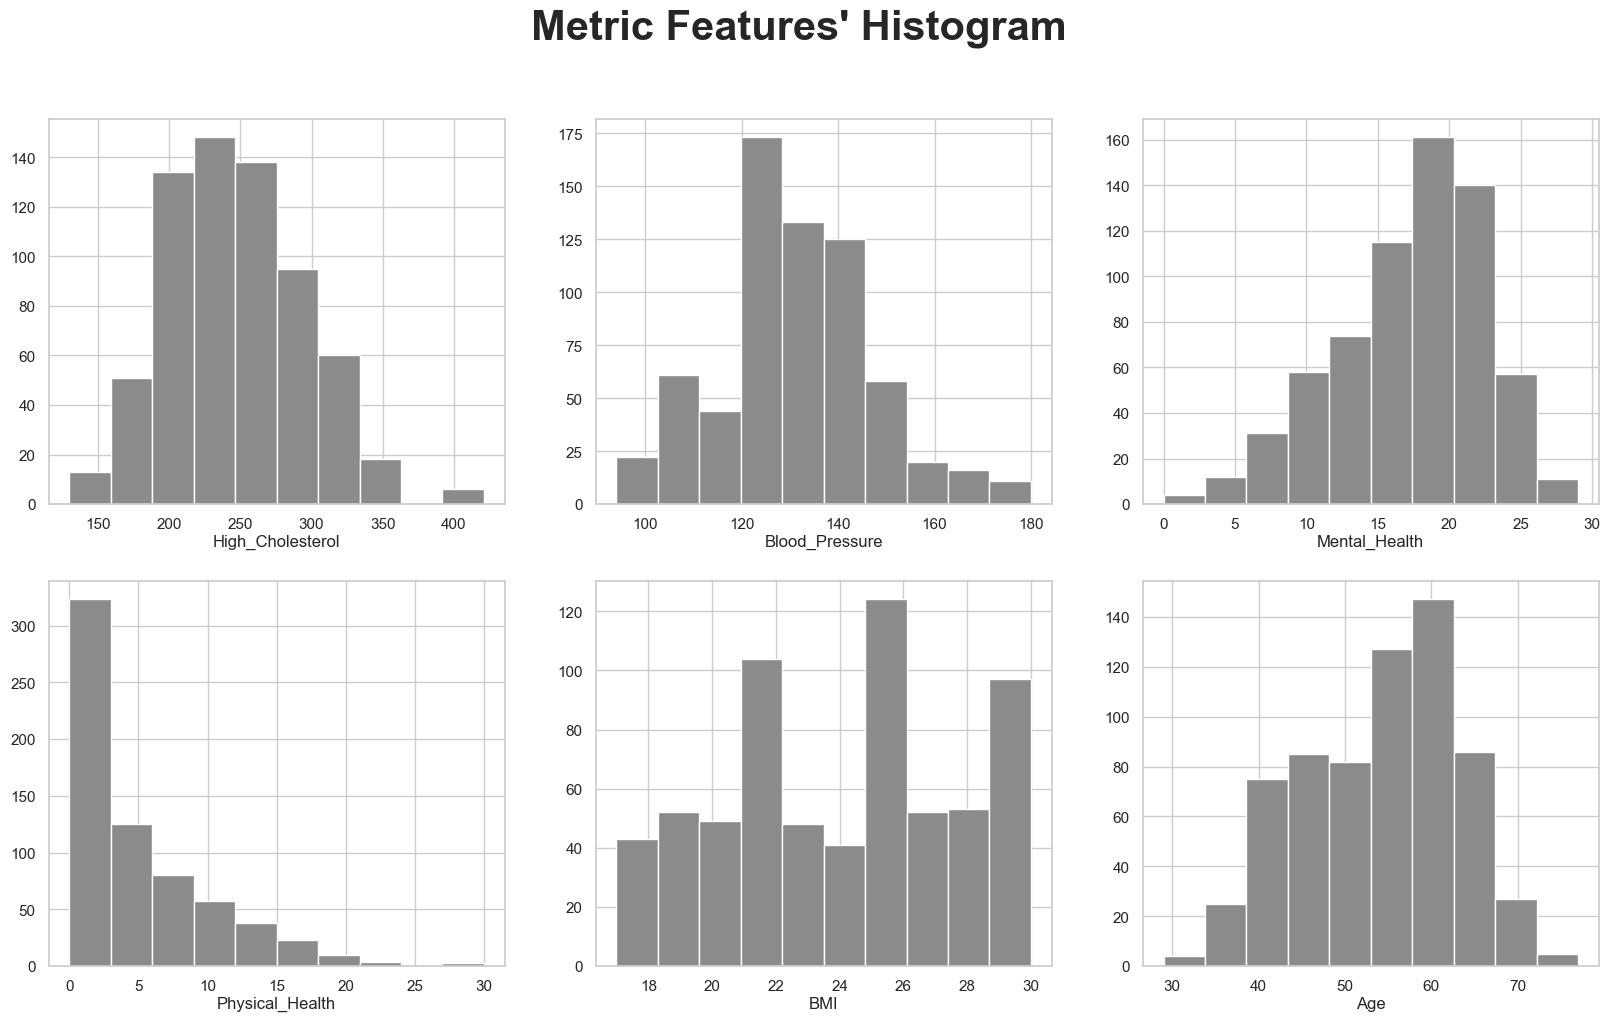

In [83]:
histogram(X_train_mf_variables, metric)

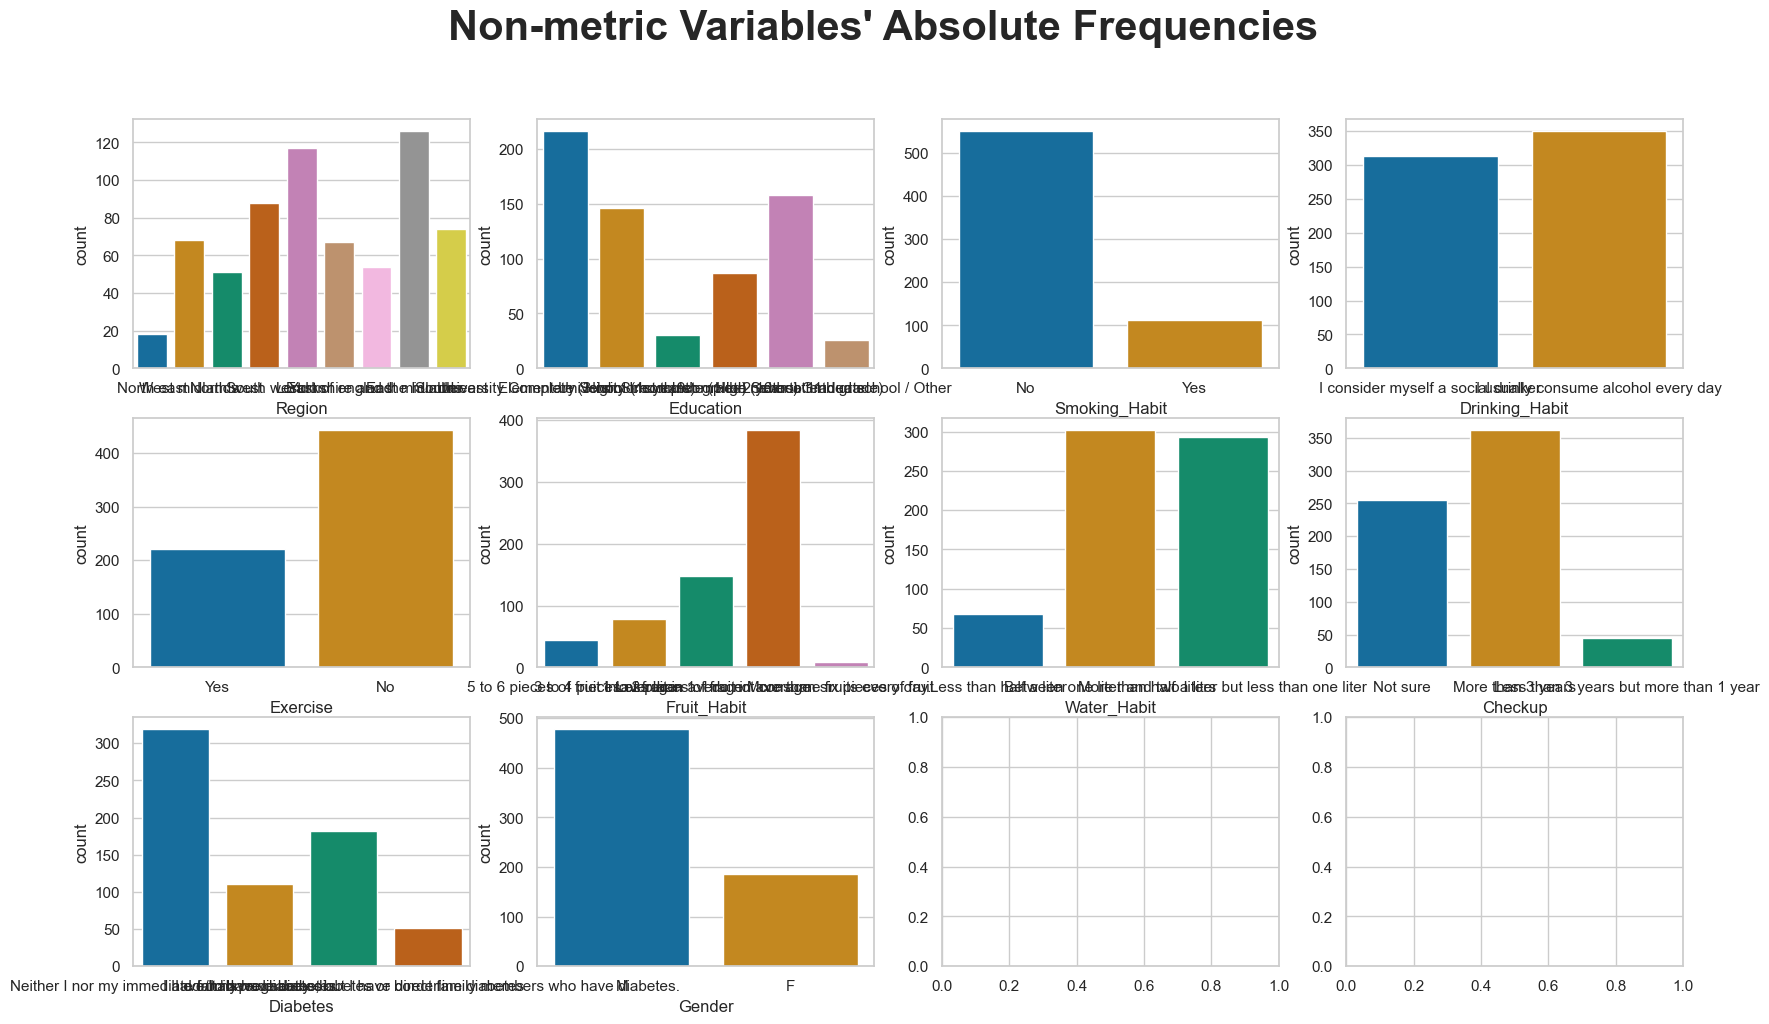

In [84]:
absolute_freq(X_train_mf_variables, non_metric)

<a class="anchor" id="4.2"></a>

## 4.3 Encoding

Encoding features is a required pre-processing step when working with categorical data. This is because Machine Learning Models can only work with numeric data. In this step, we're going to test three ways of encoding our data: we'll try the Ordinal Encoder, the Label Encoder and the One-Hot Encoding.

In [85]:
# Creating a copy of the datasets

# Datasets without outliers

X_train_mf_encode  = X_train_mf_variables.copy()
X_valid_mf_encode = X_valid_mf_variables.copy()
X_test_mf_encode = X_test_mf_variables.copy()

# Datasets with outliers

X_train_encode  = X_train_variables.copy()
X_valid_encode = X_valid_variables.copy()
X_test_encode = X_test_variables.copy()

In [86]:
# Defining our categorical and ordinal features, once we"ll need this

categorical_features = ["Region",
                    "Smoking_Habit",
                    "Drinking_Habit",
                    "Exercise", 
                    "Gender",
                    "Checkup",
                    "Diabetes"]

# Ordinal features are the ones that have an order on their values

ordinal_features = ["Education",
                    "Fruit_Habit",
                    "Water_Habit"]

In [87]:
# Defining the categories for the ordinal variables

education_categories = ["I never attended school / Other", 
                "Elementary School (1st to 9th grade)",
                "High School Incomplete (10th to 11th grade)",
                "High School Graduate",
                "University Incomplete (1 to 2 years)",
                "University Complete (3 or more years)"]

fruit_categories = ["Less than 1. I do not consume fruits every day.", 
                    "1 to 2 pieces of fruit in average", 
                    "3 to 4 pieces of fruit in average",
                    "5 to 6 pieces of fruit in average",
                    "More than six pieces of fruit"]

water_categories = ["Less than half a liter", 
                    "More than half a liter but less than one liter", 
                    "Between one liter and two liters"]

In [88]:
# Defining a funtion to get a dataframe with our metric data, and a datafram with the non-metric

def metric_or_not(data):
    
    data_metric = data[data.select_dtypes(include=np.number).columns.tolist()]
    
    data_non_metric = data.drop(data_metric, axis=1)
    
    return data_metric, data_non_metric

In [89]:
# Apply the function to the dataset with outliers and without outliers

X_metric, X_non_metric = metric_or_not(X_train_encode)

X_metric_mf, X_non_metric_mf = metric_or_not(X_train_mf_encode)

<a class="anchor" id="4.2.1"></a>

### 4.3.1 Label Encoding

Label Encoding is a way that encodes each category with a different number. This is usually used when the number of categories is quite large, and when the order doesn't matter (which is not the case here). This encoder needs the target variable in the dataset.

In [90]:
# Let's create new datasets: the ones we have now, merged with the target, since we need to use a dataset with the 
# target to apply the Label Encoder

# Without outliers

train_with_target_mf = pd.merge(left = X_train_mf_encode, 
                                right = target_frame,
                                how = "left", 
                                left_on = "PatientID", 
                                right_on = "PatientID")
 
valid_with_target_mf = pd.merge(left = X_valid_mf_encode, 
                                right = target_frame,
                                how = "left", 
                                left_on = "PatientID", 
                                right_on = "PatientID")

test_with_target_mf = pd.merge(left = X_test_mf_encode, 
                               right = target_frame,
                               how = "left", 
                               left_on = "PatientID", 
                               right_on = "PatientID")

# With outliers

train_with_target = pd.merge(left = X_train_encode, 
                             right = target_frame,
                             how = "left", 
                             left_on = "PatientID", 
                             right_on = "PatientID")

valid_with_target = pd.merge(left = X_valid_encode, 
                             right = target_frame,
                             how = "left", 
                             left_on = "PatientID", 
                             right_on = "PatientID")

test_with_target = pd.merge(left = X_test_encode, 
                            right = target_frame,
                            how = "left", 
                            left_on = "PatientID", 
                            right_on = "PatientID")

In [91]:
def label_encode(df, column):
    
    data = list(df[column])
    
    # Defining an instance to Label Encoder
    encoder = LabelEncoder()
    
    # Fit our data
    feat = encoder.fit(data)
    
    print(list(feat.classes_))
    
    feat = feat.transform(data)
    
    df = pd.DataFrame(feat, index=df.index).rename(columns={0:column})
    
    df[column] = df[column]    
    
    return df

In [92]:
# Apply the funtion to our previously created datasets

# Datasets without outliers

X_train_mf_LE = label_encode(train_with_target_mf, "Disease")
X_valid_mf_LE = label_encode(valid_with_target_mf, "Disease")
X_test_mf_LE = label_encode(test_with_target_mf, "Disease")

# Datasets with outliers

X_train_LE = label_encode(train_with_target, "Disease")
X_valid_LE = label_encode(valid_with_target, "Disease")
X_test_LE = label_encode(test_with_target, "Disease")

[0, 1]
[0, 1]
[nan]
[0, 1]
[0, 1]
[nan]


<a class="anchor" id="4.2.2"></a>

### 4.3.2 Ordinal Encoding

Ordinal Encoder is normally used when the variables in the data are ordinal. This encoder converts each label into integer values and the encoded data represents the sequence of labels. In our case, ordinal features were defined before, as well as the categories to use.

In [93]:
# Creating a copy of the datasets

# Datasets without outliers

X_train_mf_encode_oe  = X_train_mf_encode.copy()
X_valid_mf_encode_oe = X_valid_mf_encode.copy()
X_test_mf_encode_oe = X_test_mf_encode.copy()

# Datasets with outliers

X_train_encode_oe  = X_train_encode.copy()
X_valid_encode_oe = X_valid_encode.copy()
X_test_encode_oe = X_test_encode.copy()

In [94]:
def ordinal_encode(df, features, category_list = "auto"):
    
    data = df[features]
    
    # Defining an instance for Ordinal Encoder
    ordinal_encoder = OrdinalEncoder(categories=category_list)
    
    # Fit our data
    oe_feat = ordinal_encoder.fit_transform(data)
    
    oe_df = pd.DataFrame(oe_feat, index=data.index, columns= data.columns)
    
    df[features] = oe_df
    
    return df

In [95]:
# Apply our function to the copy dataset

# Note that some inputs of the function are the categories list created above

# Datasets without outliers

X_train_mf_encode_oe = ordinal_encode(X_train_mf_encode_oe, 
                                      ordinal_features, 
                                      [education_categories, fruit_categories, water_categories])

X_valid_mf_encode_oe  = ordinal_encode(X_valid_mf_encode_oe, 
                                       ordinal_features, 
                                       [education_categories, fruit_categories, water_categories])

X_test_mf_encode_oe = ordinal_encode(X_test_mf_encode_oe, 
                                     ordinal_features, 
                                     [education_categories, fruit_categories, water_categories])

# Datasets with outliers

X_train_encode_oe = ordinal_encode(X_train_encode_oe, 
                                   ordinal_features, 
                                   [education_categories, fruit_categories, water_categories])

X_valid_encode_oe  = ordinal_encode(X_valid_encode_oe, 
                                    ordinal_features, 
                                    [education_categories, fruit_categories, water_categories])

X_test_encode_oe = ordinal_encode(X_test_encode_oe, 
                                  ordinal_features, 
                                  [education_categories, fruit_categories, water_categories])

In [96]:
X_train_mf_encode_oe

,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Checkup,Diabetes,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,Gender,BMI
PatientID,,,,,,,,,,,,,,,,
1322,North east,5.0,No,I consider myself a social drinker,Yes,3.0,0.0,Not sure,Neither I nor my immediate family have diabetes.,313.0,142.0,17.0,0.0,45.0,M,23.0
1482,West midlands,1.0,No,I usually consume alcohol every day,Yes,3.0,2.0,Not sure,Neither I nor my immediate family have diabetes.,302.0,140.0,11.0,20.0,51.0,M,19.0
1844,North west,4.0,No,I consider myself a social drinker,No,2.0,0.0,Not sure,Neither I nor my immediate family have diabetes.,297.0,140.0,22.0,5.0,60.0,M,19.0
1490,South west,5.0,No,I consider myself a social drinker,No,1.0,2.0,More than 3 years,Neither I nor my immediate family have diabetes.,307.0,128.0,20.0,0.0,57.0,F,26.0
1179,London,2.0,No,I consider myself a social drinker,Yes,2.0,1.0,Not sure,Neither I nor my immediate family have diabetes.,413.0,134.0,18.0,9.0,56.0,F,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,South east,3.0,No,I usually consume alcohol every day,No,0.0,1.0,More than 3 years,I have/had pregnancy diabetes or borderline di...,339.0,140.0,19.0,0.0,64.0,M,26.0
1818,London,5.0,No,I consider myself a social drinker,No,2.0,1.0,More than 3 years,"I don't have diabetes, but I have direct famil...",248.0,148.0,24.0,3.0,42.0,M,28.0
1664,East midlands,5.0,No,I usually consume alcohol every day,No,0.0,1.0,More than 3 years,"I don't have diabetes, but I have direct famil...",230.0,150.0,9.0,12.0,66.0,F,18.0


<a class="anchor" id="4.2.3"></a>

### 4.3.3 One-Hot Encoding

One-Hot Encoding creates as many new columns as there are possible categories, and it's often used when we have numerical features, and not ordinal (even though it also works with ordinal features).

In [97]:
# Creating a copy of the datasets

# Dataset without outliers

X_train_mf_encode_oh  = X_train_mf_encode.copy()
X_valid_mf_encode_oh = X_valid_mf_encode.copy()
X_test_mf_encode_oh = X_test_mf_encode.copy()

# Dataset with outliers

X_train_encode_oh  = X_train_encode.copy()
X_valid_encode_oh = X_valid_encode.copy()
X_test_encode_oh = X_test_encode.copy()

In [98]:
def oh_encode(X, features):
    
    data = X[features]
    
    # Define an instance for One-Hot Encoding
    oh_encoder = OneHotEncoder(drop="first")
    
    # Fit our data
    ohe_feat = oh_encoder.fit_transform(data)
    
    ohe_df = pd.DataFrame(ohe_feat.toarray(), index=data.index, columns=oh_encoder.get_feature_names_out())
    
    X[oh_encoder.get_feature_names_out()] = ohe_df
    
    X = X.drop(features, axis=1)
    
    return X

In [99]:
# Apply our function to the datasets

# Datasets with outliers

X_train_encode_oh = oh_encode(X_train_encode_oh, list(X_non_metric.columns))
X_valid_encode_oh  = oh_encode(X_valid_encode_oh, list(X_non_metric.columns))
X_test_encode_oh = oh_encode(X_test_encode_oh, list(X_non_metric.columns))

# Datasets without outliers

X_train_mf_encode_oh = oh_encode(X_train_mf_encode_oh, list(X_non_metric_mf.columns))
X_valid_mf_encode_oh  = oh_encode(X_valid_mf_encode_oh, list(X_non_metric_mf.columns))
X_test_mf_encode_oh = oh_encode(X_test_mf_encode_oh, list(X_non_metric_mf.columns))

In [100]:
X_train_mf_encode_oh

,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI,Region_East of england,Region_London,Region_North east,Region_North west,...,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Gender_M
PatientID,,,,,,,,,,,,,,,,,,,,,
1322,313.0,142.0,17.0,0.0,45.0,23.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1482,302.0,140.0,11.0,20.0,51.0,19.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1844,297.0,140.0,22.0,5.0,60.0,19.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1490,307.0,128.0,20.0,0.0,57.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1179,413.0,134.0,18.0,9.0,56.0,23.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,339.0,140.0,19.0,0.0,64.0,26.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1818,248.0,148.0,24.0,3.0,42.0,28.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1664,230.0,150.0,9.0,12.0,66.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


<a class="anchor" id="4.2.4"></a>

### 4.3.4 Final Insights

Our group decided to keep going with the One-Hot Encoding approach, since it is one of the most common to use when we have so many categorical features.

In [101]:
# Apply the chosen method (One-Hot Encoding) to our datasets

# Without outliers

X_train_mf_oh  =  X_train_mf_encode_oh.copy()
X_valid_mf_oh = X_valid_mf_encode_oh.copy()
X_test_mf_oh = X_test_mf_encode_oh.copy()

# With outliers

X_train_oh  =  X_train_encode_oh.copy()
X_valid_oh = X_valid_encode_oh.copy()
X_test_oh = X_test_encode_oh.copy()

<a class="anchor" id="4.4"></a>

## 4.4 Scaling the Data

As said before, Machine Learning algorithms just see numbers, and it makes the underlying assumption that higher ranging numbers have superiority of some sort, and starts playing a more decisive role while training the model. Because that is not always true, scaling the data is a crucial step in the pre-processing part, so all data is in the same panel.

Adapted from: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py and from https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35  

<a class="anchor" id="4.4.1"></a>

### 4.4.1 Standard Scaler

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0 (Mean = 0), with a standard deviation of 1. It's usually used when there"s need to transform a feature with 0 mean and 1 of standard deviation.

In [102]:
# Create a copy of the datasets

# Dataset without outliers

X_train_mf_oh_standard  = X_train_mf_oh.copy()
X_valid_mf_oh_standard = X_valid_mf_oh.copy()
X_test_mf_oh_standard = X_test_mf_oh.copy()

# Dataset with outliers

X_train_oh_standard  =  X_train_oh.copy()
X_valid_oh_standard = X_valid_oh.copy()
X_test_oh_standard = X_test_oh.copy()

In [103]:
# Function to apply to validation and test datasets

# from. thetraining dataset

def scaler_func_std_validation(train, validation, test, metric):
    
    # Defining an instance of MinMaxScaler
    scaler = StandardScaler().fit(train.loc[:, metric])
    
    # Fit the data
    scaled_train = scaler.transform(train.loc[:, metric])
    
    scaled_validation = scaler.transform(validation.loc[:, metric])
    scaled_test= scaler.transform(test.loc[:, metric])

    train.loc[:, metric] = scaled_train
    
    validation.loc[:, metric] = scaled_validation
    test.loc[:, metric] = scaled_test
    
    return train, validation, test

In [104]:
# Apply the functions to our datasets

# Without outliers
X_train_mf_oh_standard , X_valid_mf_oh_standard, X_test_mf_oh_standard  = scaler_func_std_validation(X_train_mf_oh_standard,X_valid_mf_oh_standard,  X_test_mf_oh_standard, metric)

# With outliers
X_train_oh_standard , X_valid_oh_standard, X_test_oh_standard  = scaler_func_std_validation(X_train_oh_standard,X_valid_oh_standard,  X_test_oh_standard, metric)


<a class="anchor" id="4.4.2"></a>

### 4.4.2 MinMax Scaler

The Min Max Scaler subtracts the mimimum value in the column and then divides by the difference between the original maximum and original minimum. It transforms features by scaling each feature to a given range that the user can choose (the most used are [-1,1] when there are negative values, and [0,1] when there's no negative numbers. 

This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. Additionally, this scaler is sensitive to outliers, and it preserves the shape of the original distribution.  

In [105]:
# Copy of the datasets 

# Datasets without outliers

X_train_mf_oh_minmax  = X_train_mf_oh.copy()
X_valid_mf_oh_minmax = X_valid_mf_oh.copy()
X_test_mf_oh_minmax = X_test_mf_oh.copy()

# Datasets with outliers

X_train_oh_minmax  =  X_train_oh.copy()
X_valid_oh_minmax = X_valid_oh.copy()
X_test_oh_minmax = X_test_oh.copy()

In [106]:
def scaler_func_minmax(df, metric):
    
    # Defining an instance of Standard Scaler
    scaler = MinMaxScaler().fit(df.loc[:, metric])
    
    # Fit the data
    scaled_features = scaler.transform(df.loc[:, metric])

    df.loc[:, metric] = scaled_features
    
    return df

In [107]:
# Function to apply to validation and test datasets

def scaler_func_minmax_validation(train, validation, test, metric):
    
    # Defining an instance of MinMaxScaler
    scaler = MinMaxScaler().fit(train.loc[:, metric])
    
    # Fit the data
    scaled_train = scaler.transform(train.loc[:, metric])
    
    scaled_validation = scaler.transform(validation.loc[:, metric])
    scaled_test= scaler.transform(test.loc[:, metric])

    train.loc[:, metric] = scaled_train
    
    validation.loc[:, metric] = scaled_validation
    test.loc[:, metric] = scaled_test
    
    return train, validation, test

In [108]:
# Apply the functions to our datasets

# Datasets without outliers

X_train_mf_oh_minmax , X_valid_mf_oh_minmax, X_test_mf_oh_minmax  = scaler_func_minmax_validation(X_train_mf_oh_minmax,X_valid_mf_oh_minmax,  X_test_mf_oh_minmax, metric)

# With outliers
X_train_oh_minmax , X_valid_oh_minmax, X_test_oh_minmax  = scaler_func_minmax_validation(X_train_oh_minmax,X_valid_oh_minmax,  X_test_oh_minmax, metric)


<a class="anchor" id="4.4.3"></a>

### 4.4.3 RobustScaler

The Robust Scaler standardizes a feature by removing the median and dividing each feature by the interquartile range. It is often used if there are outliers and the user doesn't want them to have much influence. 

In [109]:
# Copy of the datasets 

# Datasets without outliers

X_train_mf_oh_robust  = X_train_mf_oh.copy()
X_valid_mf_oh_robust = X_valid_mf_oh.copy()
X_test_mf_oh_robust = X_test_mf_oh.copy()

# Datasets with outliers

X_train_oh_robust  =  X_train_oh.copy()
X_valid_oh_robust = X_valid_oh.copy()
X_test_oh_robust = X_test_oh.copy()

In [110]:
# Function to apply to validation and test datasets

def scaler_func_robust_validation(train, validation, test, metric):
    
    # Defining an instance of MinMaxScaler
    scaler = RobustScaler().fit(train.loc[:, metric])
    
    # Fit the data
    scaled_train = scaler.transform(train.loc[:, metric])
    
    scaled_validation = scaler.transform(validation.loc[:, metric])
    scaled_test= scaler.transform(test.loc[:, metric])

    train.loc[:, metric] = scaled_train
    
    validation.loc[:, metric] = scaled_validation
    test.loc[:, metric] = scaled_test
    
    return train, validation, test

In [111]:

# Apply the functions to our datasets

# Datasets without outliers

X_train_mf_oh_robust , X_valid_mf_oh_robust, X_test_mf_oh_robust  = scaler_func_robust_validation(X_train_mf_oh_robust,X_valid_mf_oh_robust,  X_test_mf_oh_robust, metric)

# Datasets with outliers
X_train_oh_robust , X_valid_oh_robust, X_test_oh_robust  = scaler_func_robust_validation(X_train_oh_robust,X_valid_oh_robust,  X_test_oh_robust, metric)


In [112]:
X_test_mf_oh_robust[metric].describe().T

,count,mean,std,min,25%,50%,75%,max
High_Cholesterol,225.0,0.140431,0.772051,-1.611940,-0.388060,0.014925,0.522388,2.656716
Blood_Pressure,225.0,0.179778,0.949155,-1.800000,-0.500000,0.000000,0.700000,3.500000
Mental_Health,225.0,-0.056667,0.612814,-1.875000,-0.375000,0.000000,0.500000,1.125000
Physical_Health,225.0,0.339683,0.865862,-0.428571,-0.428571,0.142857,0.857143,3.857143
BMI,225.0,0.024444,0.651060,-1.166667,-0.500000,0.000000,0.666667,1.000000
Age,225.0,-0.126496,0.726047,-1.692308,-0.692308,-0.076923,0.384615,1.615385


In [113]:
X_train_oh_robust[metric].describe().T

,count,mean,std,min,25%,50%,75%,max
High_Cholesterol,680.0,0.074122,0.758958,-1.701493,-0.462687,0.0,0.537313,4.835821
Blood_Pressure,680.0,0.043750,0.842590,-1.800000,-0.500000,0.0,0.500000,3.500000
Mental_Health,680.0,-0.078905,0.745219,-2.482759,-0.586207,0.0,0.413793,1.517241
Physical_Health,680.0,0.219328,0.775771,-0.428571,-0.428571,0.0,0.571429,3.857143
BMI,680.0,0.010049,0.615439,-1.166667,-0.500000,0.0,0.500000,1.000000
Age,680.0,-0.008824,1.167734,-1.928571,-0.642857,0.0,0.357143,7.928571


<a class="anchor" id="4.5"></a>

## 4.5 Feature Selection

We decided to procceed our work with only one dataset: without outliers, encoded with `One-Hot Encoding` and scaled with `MinMax Scaler`.

In [114]:
# Create a copy of our datasets 

X_train_select  = X_train_mf_oh_minmax.copy()
X_valid_select  = X_valid_mf_oh_minmax.copy()
X_test_select   = X_test_mf_oh_minmax.copy()

<a class="anchor" id="4.5.1"></a>

### 4.5.1 Filter Methods

<a class="anchor" id="4.5.1.1"></a>

#### UNIVARIATE VARIABLES

We can remove the variables that are univariate.

In [115]:
X_train_select[metric].var()

High_Cholesterol    0.026756
Blood_Pressure      0.035261
Mental_Health       0.034827
Physical_Health     0.031134
BMI                 0.079942
Age                 0.035669
dtype: float64

None of our variables is univariate.

<a class="anchor" id="4.5.1.2"></a>

#### SPEARMAN CORRELATION

The spearman correlation evaluates the monotic relationship between two variables. First we need to create a new dataframe with all the training data and the target, so we can check if any of the independent variables are correlated with the dependent one.

In [116]:
# Apply the metric_or_not function to create two datasets: one with the metric variables and one without

X_train_variables_metric, X_train_variables_non_metric = metric_or_not(X_train_variables)

# Take into account that these datasets are neither encoded nor standardized

In [117]:
# Create a copy of the dataset, just in case we apply some changes that we were not supposed to

X_train_variables_metric_target = X_train_variables_metric.copy()

# Scale the created dataset with MinMaxScaler()

X_train_variables_metric_target = scaler_func_minmax(X_train_variables_metric_target, metric)

In [118]:
# Convert y_train to a DataFrame and store it into y_train_dataframe

y_train_dataframe= pd.DataFrame({"PatientID":y_train.index, "Disease":y_train.values}).set_index("PatientID")

In [119]:
# Join X_train_variables_metric_target with the target: y_train_dataframe

X_train_variables_metric_target = X_train_variables_metric_target.join(y_train_dataframe)

# X_train_variables_metric_target is now a dataset with all metric features scaled, and with the target

In [120]:
def cor_heatmap(cor):
    
    plt.figure(figsize=(16,9))
    
    # Create a heatmap
    
    sns.heatmap(data = cor, annot = True, cmap = "RdBu")
    plt.title("Spearman Correlation Heatmap",fontsize=30,fontweight ="bold" )
    plt.show()

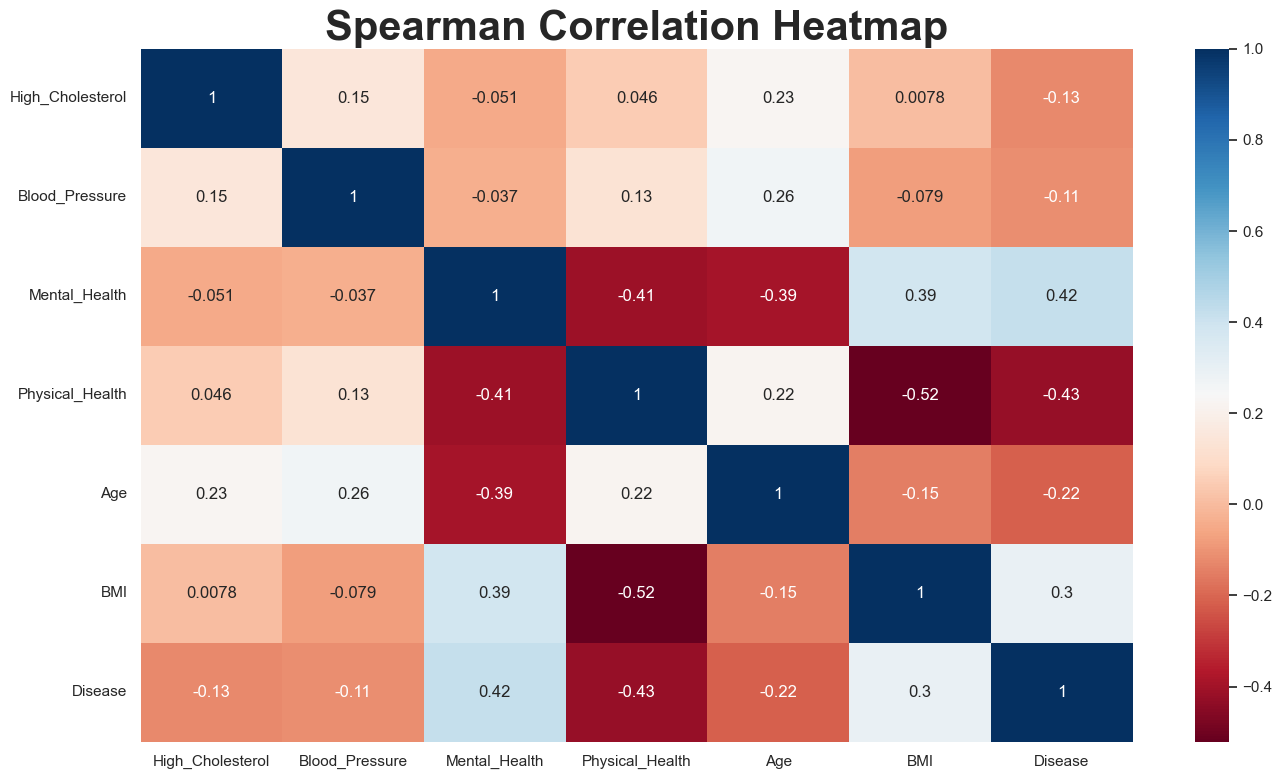

In [121]:
# Define cor (in this case, the correlation using the Spearman method)

cor = X_train_variables_metric_target.corr(method="spearman")

# Call the previous created function

cor_heatmap(cor)

After visualizing the correlation matrix above, we can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
- There's 1 pair of variables more or less highly correlated:    
    - `Physical_Health` vs `BMI` (-0.52) <br>

We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the `BMI` since it is correlated with both variables, but maybe this can have a higher influence on the target).

<a class="anchor" id="4.5.1.3"></a>

#### PEARSON CORRELATION

The Pearson Correlation is one of the most common methods to do feature selection: it evaluates the linear relationship between two continuous variables, and if two variables are highly correlated, we can discard one of them (the one with less explanatory power).

To do this, we decided to create a function that, defined a threshold, assigns if the feature is good or not.

In [122]:
def select_by_correlation(X,y, threshold=0.9, method="pearson"):
    
    # Create a pandas dataframe with all independent and dependent variables
    
    target = list(y.columns)[0]
    
    data_select = pd.concat([X, y], axis=1)
    
    # Apply the correlation
    
    cor = data_select.corr(method=method)[target]
    
    # Define the parameter to the best columns. In this case, the best features are the ones that have a correlation
    # higher or smaller than the positive and negative threshold
    
    best_columns = cor[(cor > threshold) | (cor < -threshold)]
    
    best_columns = best_columns.drop(target)
    
    # Return the results
    
    return best_columns

In [123]:
def select_by_correlation(X,y, threshold=0.2, method="pearson"):
    target = list(pd.DataFrame(y).columns)[0]
    
    data_select = pd.concat([X, y], axis=1)
    cor = data_select.corr(method=method)[target]
    best_columns = cor[(cor > threshold) | (cor < -threshold)]
    best_columns = best_columns.drop(target)
    
    return best_columns


In [124]:
# Apply the function to the data X_train_select and y_train_dataframe, and store it into corr_best_features object

corr_best_features = list(select_by_correlation(X_train_select[metric],y_train, method="pearson").index)
corr_best_features 

# Print the results 

print("According to the Pearson Correlation, and defining a threshold of 0.3, the features that we should keep are:",
       corr_best_features,
      ".")

According to the Pearson Correlation, and defining a threshold of 0.3, the features that we should keep are: ['Mental_Health', 'Physical_Health', 'BMI', 'Age'] .


<a class="anchor" id="4.5.1.4"></a>

#### K-BEST USING THE ANOVA F-VALUE

This method selects features according to the *k* highest scores. In this case, we decided to use the default parameters, that is, the *f_classif* and the *k=4*, so the function can select the 4 best metric features, taking into account the ANOVA F-value for the provided sample.

Adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

In [125]:
# Create a KBest instance with the default arguments

kbest = SelectKBest(f_classif, k=4)

# Fit the data to the instance

kbest_ft = kbest.fit_transform(X_train_select[metric], y_train.loc[y_train.index & X_train_select.index])


filter_mask = kbest.get_support()

# Store the variables that were selected on an object

filter_features = np.array(list(X_train_select[metric].columns)) 

filter_best_features = filter_features[filter_mask]

# Print the results of the test

print("All features: ", X_train_select[metric].shape[1])

print("According to the ANOVA f-value, the 4 best features for the model are:",filter_features[filter_mask])

All features:  6
According to the ANOVA f-value, the 4 best features for the model are: ['Mental_Health' 'Physical_Health' 'BMI' 'Age']


<a class="anchor" id="4.4.1.5"></a>

#### CHI-SQUARED FOR CATEGORICAL DATA


This method basically calculates the Chi-Squared between each categorical variable and the target, and selects the variables with best scores. This test has 2 hypothesis:

- H0: Two categorical variables (in this case, the feature being tested and the target) are **independent** - so the tested feature **is not important**
- H1: Two categorical variables (in this case, the feature being tested and the target) are **dependent** - so the tested feature is **important**

If p < alpha, the test rejects the H0, so the test has statistical evidence to say that that the variable is important. If p > alpha, the test doesn't reject the null hypothesis, so the feature is not important.

Adapted from: https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/

In [126]:
def TestIndependence(X,y,var,alpha=0.05): 
    
    # Create a dataframe with the inserted arguments (independent and dependent variables)
    
    dfObserved = pd.crosstab(y,X)
    
    
    # Apply the test for the observed values
    
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # Insert the results into a pandas dataframe
    
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    
    # Creating an If Else statement to see if the p-value is smaller or bigger than alpha (significance level)
    
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    
    print(result)

In [127]:
# Apply the function to X_non_metric(dataset with the non metric variables and where the variables are not encoded)

for var in X_non_metric:
    TestIndependence(X_non_metric[var],y_train, var)

Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Smoking_Habit is NOT an important predictor. (Discard Smoking_Habit from model)
Drinking_Habit is IMPORTANT for Prediction
Exercise is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


According to Chi-Square Test, the categorical variables that we should discard for the final model are `Region`, `Education`, `Smoking_Habit` and `Water_Habit`. 

<a class="anchor" id="4.5.2"></a>

### 4.5.2 Wrapper Methods

<a class="anchor" id="4.5.2.1"></a>

#### RFE

The Recursive Feature Elimination Method is a method that ranks features, adapts the model and removes the weakest features until a certain number of features is reached. 

Adapted from: https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

In [128]:
# First, let's create an object - X_metric_scaled - that contains all metric variables scaled (with MinMaxScaler)

X_metric_scaled=scaler_func_minmax(X_metric_mf, metric)

In [129]:
# Create a RFE instance

rfc = LogisticRegression()

# Transform and fit the data to the instance rfe, where we have the independent variables and the dependent

rfecv = RFECV(estimator=rfc, cv=5, scoring="f1")
rfecv = rfecv.fit(X_metric_scaled, y_train.loc[y_train.index & X_metric_scaled.index])

# Store the variables that were selected by RFE as the most "important" ones on an object

wrapper_mask = rfecv.get_support()
wrapper_features = np.array(list(X_metric_scaled.columns)) 
wrapper_best_features = wrapper_features[wrapper_mask]

# Print the results

print("Feature ranking:", rfecv.ranking_)

print("All features:", X_metric_scaled.shape[1])

print("Selected best:", wrapper_best_features.shape[0])
print("According to RFE, the best metric features for the model are:", wrapper_features[wrapper_mask])

Feature ranking: [1 2 1 1 4 3]
All features: 6
Selected best: 3
According to RFE, the best metric features for the model are: ['High_Cholesterol' 'Mental_Health' 'Physical_Health']


<a class="anchor" id="4.5.3"></a>

### 4.5.3 Embedded Methods

<a class="anchor" id="4.5.3.1"></a>

#### LASSO

Lasso is a type of linear regression that uses shrinkage (where data values are shrunk towards a central point, for example, the mean). This approach is able to **nullify** the impact of an irrelevant feature in the data, thus completely eliminating it and hence is better at reducing the variance when the data consists of many insignificant features, when comparing to other techniques, like Ridge.

Adapted from: https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

In [130]:
def plot_importance(coef,name):
    
    # Sort the values of the regression and assign it to an object called imp_coef
    
    imp_coef = coef.sort_values()
    
    # Create a plot for visualization purposes
    
    plt.figure(figsize = (16, 9))
    imp_coef.plot(kind = "barh", color = "#d8e43c")
    plt.title("Feature importance using " + name + " Model", fontsize=30, fontweight ="bold")
    plt.show()

In [131]:
# Creating the lasso regression instance

reg = LassoCV()

# Fit the data to reg

reg.fit(X_train_select[metric], y_train.loc[y_train.index & X_train_select.index])

# Create an object (pandas Series) that will have as index the data columns names and the coef_attribute as value

coef = pd.Series(reg.coef_, index = X_train_select[metric].columns)
coef.sort_values()

Physical_Health    -0.820215
High_Cholesterol   -0.206347
Blood_Pressure     -0.145801
Age                 0.000000
BMI                 0.063091
Mental_Health       0.793021
dtype: float64

In [132]:
# Check how many variables did Lasso picked (if coef != 0), and how many variables did Lasso eliminated (if coef=0)

print("Lasso picked", str(sum(coef != 0)), "variables and eliminated the other", str(sum(coef == 0)), "variable(s).")

Lasso picked 5 variables and eliminated the other 1 variable(s).


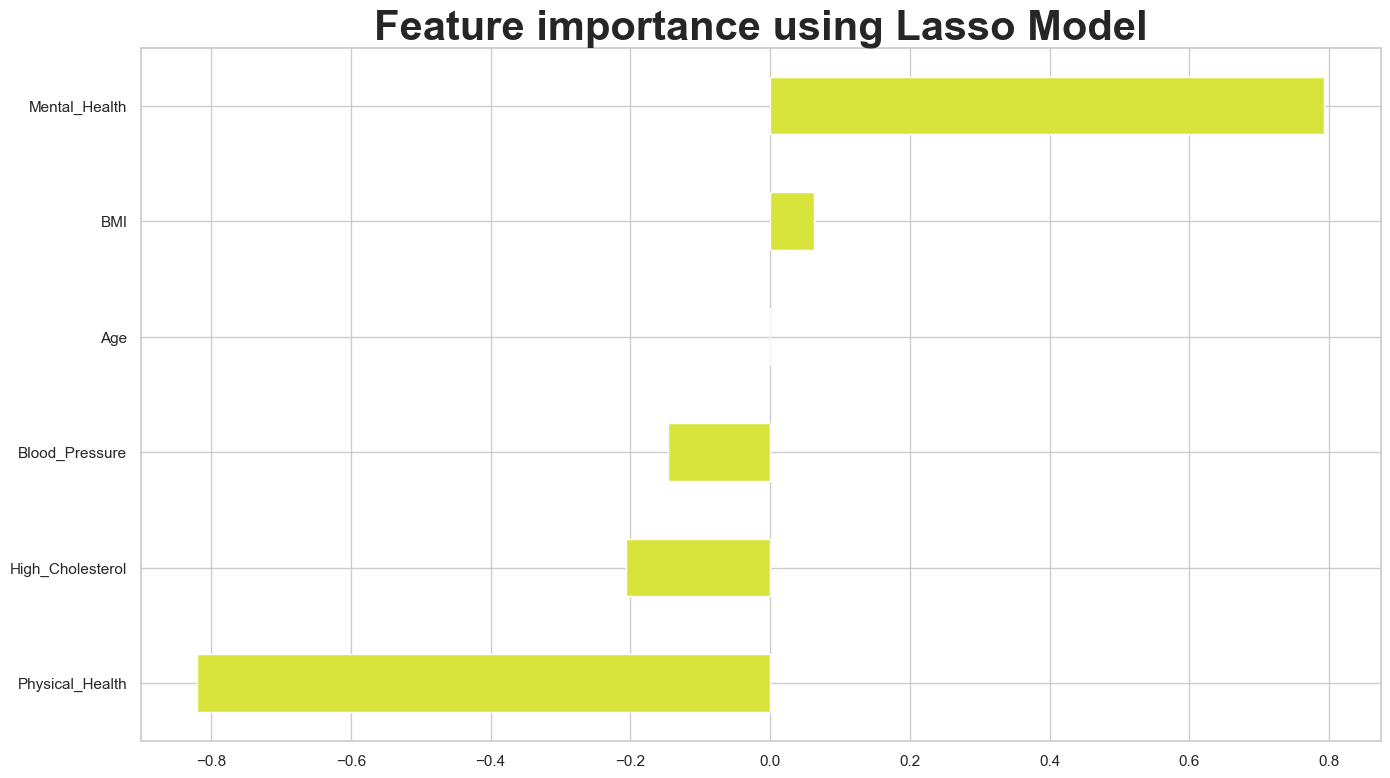

In [133]:
# Apply the function created before to visualize the Lasso Result

plot_importance(coef,"Lasso")

According to Lasso Regression, we should discard the `Age`. The `BMI` seems also insignificant for the definition of the target comparing to the remaining predictors.

<a class="anchor" id="4.5.3.2"></a>

#### RIDGE

Unlike Lasso, Ridge Regression can't reduce the coefficients to absolute zero. However, Ridge performs better when the data consists of features which are sure to be more relevant and useful.

Adapted from: https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

In [134]:
# Creating the Ridge regression instance

reg = Ridge()

# Fit the data to reg

reg.fit(X_train_select[metric], y_train.loc[y_train.index & X_train_select.index])

# Create an object (pandas Series) that will have as index the data columns names and the coef_attribute as value

coef = pd.Series(reg.coef_, index = X_train_select[metric].columns)
coef.sort_values()

Physical_Health    -0.805477
High_Cholesterol   -0.243875
Blood_Pressure     -0.178628
Age                 0.036410
BMI                 0.081240
Mental_Health       0.801844
dtype: float64

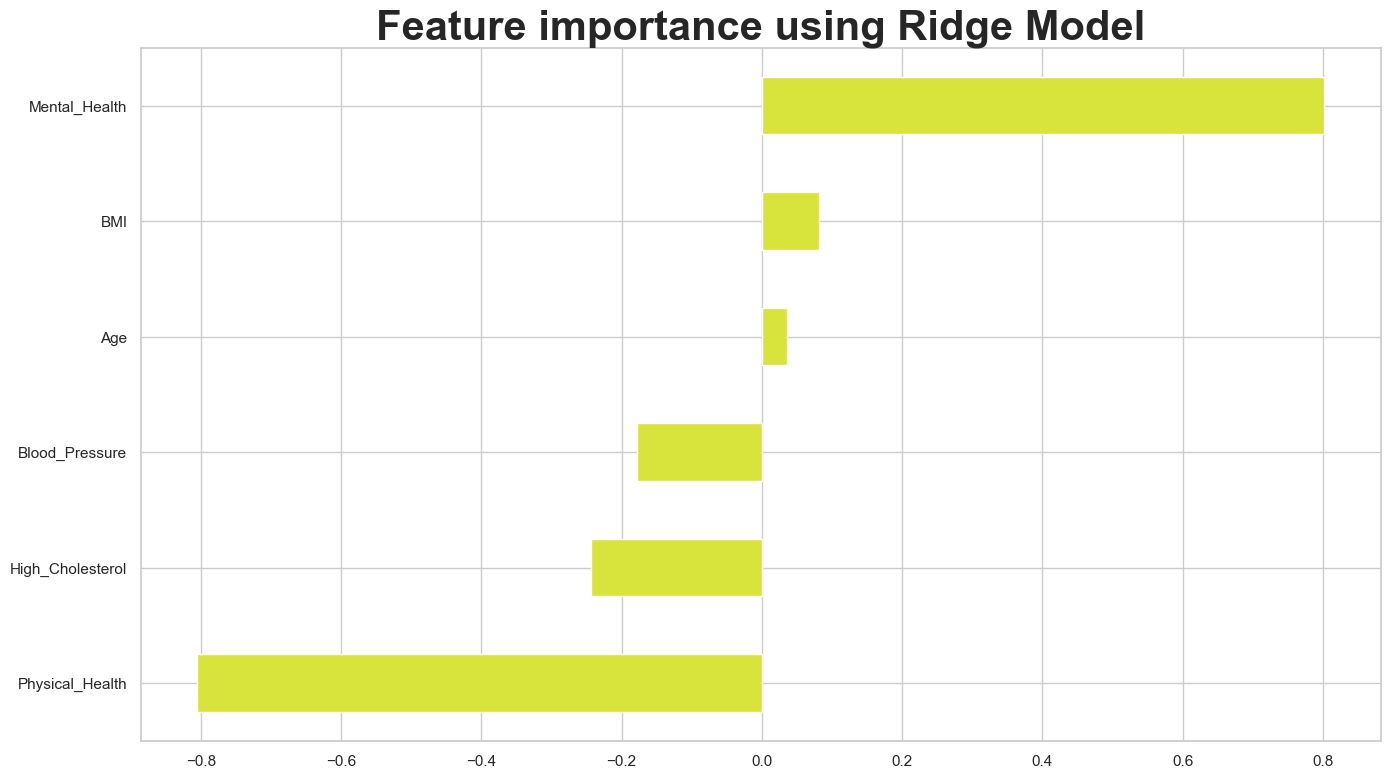

In [135]:
# Apply the function created before to visualize the Ridge Result

plot_importance(coef,"Ridge")

According to Ridge, we should discard the `Age`, and the `BMI` seems also insignificant for the definition of the target comparing to the remaining predictors.

<a class="anchor" id="4.5.4"></a>

### 4.5.4 Final Insights - Selection

<hr>

### Numerical Data

| Predictor | Spearman | Pearson| RFE | Lasso | Ridge | ANOVA |What to do? (One possible way to "solve") | 
| --- | --- | --- | --- | --- | --- | --- | --- |
| High_Cholesterol | Keep | Discard | Keep | Keep | Discard | Discard | Try with and without
| Blood_Pressure | Keep | Discard | Discard | Keep | Discard | Discard | Discard
| Mental_Health | Keep | Keep | Keep | Keep | Keep | Keep | Include in the model
| Physical_Health | Keep | Keep | Keep |  Keep | Keep | Keep | Include in the model
| BMI | Keep | Discard | Discard |  Discard ? | Discard | Keep | Try with and Without
| Age | Keep | Discard | Discard |  Discard | Discard | Keep | Discard

<hr>


### Categorical Data

| Predictor | Chi-Square - What to do? (One possible way to "solve") | 
| --- | --- | 
| Gender | Include in the model
| Region | Discard
| Education | Discard
| Checkup | Include in the model
| Diabetes | Include in the model
| Smoking_Habit | Discard
| Exercise | Include in the model
| Fruit_Habit | Include in the model
| Water_Habit | Discard
| Drinking_Habit | Include in the model

<hr>

Create a list of all the variables to keep according to the final insights of feature selection

In [136]:
# Discard "Region", "Education", "Smoking_Habit" and "Water_Habit", "Age", "Blood_Pressure"

variables_to_keep = ["High_Cholesterol",
                     "Mental_Health",
                     "Physical_Health",
                     "BMI",
                     "Gender_M",
                     "Checkup_More than 3 years", "Checkup_Not sure",
                     "Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",
                     "Diabetes_I have/had pregnancy diabetes or borderline diabetes",
                     "Diabetes_Neither I nor my immediate family have diabetes.",
                     "Exercise_Yes",
                     "Fruit_Habit_3 to 4 pieces of fruit in average",
                     "Fruit_Habit_5 to 6 pieces of fruit in average",
                     "Fruit_Habit_Less than 1. I do not consume fruits every day.",
                     "Fruit_Habit_More than six pieces of fruit",
                     "Drinking_Habit_I usually consume alcohol every day"
                     ]

In [137]:
# Taking into consideration the Chi-Squared test and the Pearson Correlation Best Features

corr_chi_to_keep = ["Mental_Health",
                    "Physical_Health",
                    "BMI",
                    "Age",
                    "Gender_M",
                     "Checkup_More than 3 years", "Checkup_Not sure",
                     "Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",
                     "Diabetes_I have/had pregnancy diabetes or borderline diabetes",
                     "Diabetes_Neither I nor my immediate family have diabetes.",
                     "Exercise_Yes",
                     "Fruit_Habit_3 to 4 pieces of fruit in average",
                     "Fruit_Habit_5 to 6 pieces of fruit in average",
                     "Fruit_Habit_Less than 1. I do not consume fruits every day.",
                     "Fruit_Habit_More than six pieces of fruit",
                     "Drinking_Habit_I usually consume alcohol every day"
                     ]

Now, we'll apply the choosed on the datasets that we want to keep going with:
 - `X_train_MF_OH_SS`: Datasets that don"t have outliers (these were removed with Manual Filtering), were encoded with One-Hot Encoding and Scaled with Standard Scaler;
 
 - `X_train_OH_SS`: Datasets that have outliers, were encoded with One-Hot Encoding and Scaled with Standard Scaler;
 
 - `X_train_MF_OH_MM`: Datasets that don"t have outliers (these were removed with Manual Filtering), were encoded with One-Hot Encoding and Scaled with MinMax Scaler;
 
 - `X_train_OH_MM`: Datasets that have outliers, were encoded with One-Hot Encoding and Scaled with MinMax Scaler;
 
 - `X_train_MF_OH_RS`: Datasets that don"t have outliers (these were removed with Manual Filtering), were encoded with One-Hot Encoding and Scaled with Robust Scaler;
 
 - `X_train_OH_RS`: Datasets that have outliers, were encoded with One-Hot Encoding and Scaled with Robust Scaler;

 - `X_train_MF_OH_MM_FS`: same as `X_train_MF_OH_MM` but with a different Feature Selection Method;
 
These are the training datasets. We still have, for each dataset, the validation and the test datasets.

In [138]:
# Apply the choices to the datasets we want to keep going with

# MANUAL CHOICE OF FEATURES

# STANDARD SCALER

# Without outliers
X_train_MF_OH_SS = X_train_mf_oh_standard.copy()
X_valid_MF_OH_SS = X_valid_mf_oh_standard.copy()
X_test_MF_OH_SS = X_test_mf_oh_standard.copy()

X_train_MF_OH_SS = X_train_MF_OH_SS[variables_to_keep]
X_valid_MF_OH_SS = X_valid_MF_OH_SS[variables_to_keep]
X_test_MF_OH_SS = X_test_MF_OH_SS[variables_to_keep]

# With outliers
X_train_OH_SS = X_train_oh_standard.copy()
X_valid_OH_SS = X_valid_oh_standard.copy()
X_test_OH_SS = X_test_oh_standard.copy()

X_train_OH_SS = X_train_OH_SS[variables_to_keep]
X_valid_OH_SS = X_valid_OH_SS[variables_to_keep]
X_test_OH_SS = X_test_OH_SS[variables_to_keep]

# MINMAX SCALER

# Without outliers
X_train_MF_OH_MM = X_train_mf_oh_minmax.copy()
X_valid_MF_OH_MM = X_valid_mf_oh_minmax.copy()
X_test_MF_OH_MM = X_test_mf_oh_minmax.copy()

X_train_MF_OH_MM = X_train_MF_OH_MM[variables_to_keep]
X_valid_MF_OH_MM = X_valid_MF_OH_MM[variables_to_keep]
X_test_MF_OH_MM = X_test_MF_OH_MM[variables_to_keep]

# With outliers
X_train_OH_MM  = X_train_oh_minmax.copy()
X_valid_OH_MM = X_valid_oh_minmax.copy()
X_test_OH_MM = X_test_oh_minmax.copy()

X_train_OH_MM = X_train_OH_MM[variables_to_keep]
X_valid_OH_MM = X_valid_OH_MM[variables_to_keep]
X_test_OH_MM = X_test_OH_MM[variables_to_keep]

# ROBUST SCALER

# Without outliers
X_train_MF_OH_RS = X_train_mf_oh_robust.copy()
X_valid_MF_OH_RS = X_valid_mf_oh_robust.copy()
X_test_MF_OH_RS = X_test_mf_oh_robust.copy()

X_train_MF_OH_RS = X_train_MF_OH_RS[variables_to_keep] 
X_valid_MF_OH_RS = X_valid_MF_OH_RS[variables_to_keep] 
X_test_MF_OH_RS = X_test_MF_OH_RS[variables_to_keep] 

# With outliers
X_train_OH_RS = X_train_oh_robust.copy()
X_valid_OH_RS = X_valid_oh_robust.copy()
X_test_OH_RS = X_test_oh_robust.copy()

X_train_OH_RS = X_train_OH_RS[variables_to_keep] 
X_valid_OH_RS = X_valid_OH_RS[variables_to_keep] 
X_test_OH_RS = X_test_OH_RS[variables_to_keep] 

# CHOICE OF FEATURES ACCORDING TO CHI-SQUARED AND PEARSON TESTS

# STANDARD SCALER

# Without outliers
X_train_MF_OH_MM_FS = X_train_mf_oh_minmax.copy()
X_valid_MF_OH_MM_FS = X_valid_mf_oh_minmax.copy()
X_test_MF_OH_MM_FS = X_test_mf_oh_minmax.copy()

X_train_MF_OH_MM_FS  = X_train_MF_OH_MM_FS[corr_chi_to_keep]
X_valid_MF_OH_MM_FS  = X_valid_MF_OH_MM_FS[corr_chi_to_keep]
X_test_MF_OH_MM_FS  = X_test_MF_OH_MM_FS[corr_chi_to_keep]

# With outliers
X_train_OH_MM_FS = X_train_mf_oh_minmax.copy()
X_valid_OH_MM_FS = X_valid_mf_oh_minmax.copy()
X_test_OH_MM_FS = X_test_mf_oh_minmax.copy()

X_train_OH_MM_FS  = X_train_OH_MM_FS[corr_chi_to_keep]
X_valid_OH_MM_FS  = X_valid_OH_MM_FS[corr_chi_to_keep]
X_test_OH_MM_FS  = X_test_OH_MM_FS[corr_chi_to_keep]

<a class="anchor" id="5"></a>

# 5. Model Assessment

<a class="anchor" id="5.1"></a>

## 5.1 First Model Assessment Round: One Dataset, Multiple Classifier

There are many measures to evaluate the performance of our models. To evaluate our models, we'll be taking these into consideration the following metrics, as well as the values of the Confusion Matrix:


**AUC / AUROC** - True Positive Rate against the False Positive Rate. Receiver Operating Characteristic (`ROC`) is a probability curve and Area Under the Curve (`AUC`) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.


**Accuracy** - The ratio between the correctly classified samples to the total number of samples.


**Precision** - If Precicion = 1 the model produce no False Positive. Represents the ratio of positive samples that were correctly classified.

 
**Recall** - If Recall = 1 the model produce no False Negatives. It represents the rate at which model is correctly classifying positive outcomes. 


**F1 Score** - The models balance between Precicion and Recall.

 
Adapted From: https://medium.com/ibm-data-ai/interpreting-machine-learning-model-performance-measures-ef2138047b96

In [139]:
# Create a list with the models we're going to test

models = [DecisionTreeClassifier(),  
         RandomForestClassifier(),  
         ExtraTreesClassifier(), 
         LogisticRegression(),  
         LinearDiscriminantAnalysis(),
         GaussianNB(),  
         GaussianProcessClassifier(),     
         KNeighborsClassifier(),  
         BaggingClassifier(),  
         AdaBoostClassifier(), 
         GradientBoostingClassifier(), 
         HistGradientBoostingClassifier(),
         SVC(), 
         LinearSVC(),
         RidgeClassifier(),    
         SGDClassifier(),    
         PassiveAggressiveClassifier(),
         QuadraticDiscriminantAnalysis()
         ]

In [140]:
def model_performance_evaluation(models=models, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid):
    
    valid_results = [] 
    train_results = []
    auc_scores_valid = []
    auc_scores_train = []
    model_names = []
    confusion_mat_train = []
    confusion_mat_valid = []
    
    # Matching rows of treated X_train/X_valid and y_train/y_valid
    
    y_train = y_train.loc[y_train.index & X_train.index]
    y_valid = y_valid.loc[y_valid.index & X_valid.index]

    def evaluate_model(model, X, y):
        m = model.fit(X_train, y_train)
        # Model.transform(X, y)  
        preds = m.predict(X)
        accuracy = metrics.accuracy_score(y, preds)
        precision = metrics.precision_score(y, preds)
        recall = metrics.recall_score(y, preds)
        f1 = metrics.f1_score(y, preds)
        return accuracy, precision, recall, f1
        
    for model in models:

        cv_train = evaluate_model(model, X_train, y_train)
        cv_valid = evaluate_model(model, X_valid, y_valid)
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)
        auc_score_train = roc_auc_score(y_train, y_train_pred)
        auc_score_valid = roc_auc_score(y_valid, y_valid_pred)
        con_mat_train = confusion_matrix(np.ravel(y_train), y_train_pred).tolist()
        con_mat_valid = confusion_matrix(np.ravel(y_valid), y_valid_pred).tolist()

        auc_scores_train.append(auc_score_train)
        auc_scores_valid.append(auc_score_valid)
        confusion_mat_train.append(con_mat_train)
        confusion_mat_valid.append(con_mat_valid)
        train_results.append(cv_train)
        valid_results.append(cv_valid)
        model_names.append(type(model).__name__)
        
        fpr, tpr, _ = roc_curve(y_train, y_train_pred)
        auc_score = roc_auc_score(y_train, y_train_pred)



    df = pd.DataFrame(model_names).rename(columns={0:"model_name"})
    
    # Create a column with the AUC values (for train, validation and the difference)
    df["auc_score_train"] = auc_scores_train
    df["auc_score_valid"] = auc_scores_valid
    df["auc_score_diff"] = df["auc_score_train"]-df["auc_score_valid"]
    
    # Create a column with the F1 scores (for train, validation and the difference)
    
    df["f1_train"] = [tup[3] for tup in train_results]
    df["f1_valid"] = [tup[3] for tup in valid_results]
    df["f1_diff"] = df["f1_train"]-df["f1_valid"]
    
    # Create a column with the Accuracy values (for train, validation and the difference)
    
    df["accuracy_train"] = [tup[0] for tup in train_results]
    df["accuracy_valid"] = [tup[0] for tup in valid_results]
    df["accuracy_diff"] = df["accuracy_train"]-df["accuracy_valid"]
    
    # Create a column with the Precision values (for train, validation and the difference)
    
    df["precision_train"] = [tup[1] for tup in train_results]
    df["precision_valid"] = [tup[1] for tup in valid_results]
    df["precision_diff"] = df["precision_train"]-df["precision_valid"]
    
    # Create a column with the recall values (for train, validation and the difference)
    
    df["recall_train"] = [tup[2] for tup in train_results]
    df["recall_valid"] = [tup[2] for tup in valid_results]
    df["recall_diff"] = df["recall_train"]-df["recall_valid"]
    
    # Create columns with the values of the confusion matrix
    
    df["true_positive_train"] = [tup[0][0] for tup in confusion_mat_train]
    df["false_positive_train"] = [tup[0][1] for tup in confusion_mat_train]
    df["false_negative_train"] = [tup[1][0] for tup in confusion_mat_train]
    df["true_negative_train"] = [tup[1][1] for tup in confusion_mat_train]
    df["true_positive_valid"] = [tup[0][0] for tup in confusion_mat_valid]
    df["false_positive_valid"] = [tup[0][1] for tup in confusion_mat_valid]
    df["false_negative_valid"] = [tup[1][0] for tup in confusion_mat_valid]
    df["true_negative_valid"] = [tup[1][1] for tup in confusion_mat_valid]

    
    return df

In [141]:
def display_model_performance(model_evaluation_df):
    
    diff_columns  = ["accuracy_diff", 
                     "precision_diff", 
                     "recall_diff", 
                     "f1_diff", 
                     "auc_score_diff", 
                     "false_positive_train", 
                     "true_negative_train",
                     "false_positive_valid", 
                     "true_negative_valid" ]
    
    score_columns = list(model_evaluation_df.drop(diff_columns, axis=1).drop("model_name", axis=1).columns)

    display(model_evaluation_df.set_index("model_name")\
            .style.highlight_max(subset=score_columns, color = "lightgreen", axis = 0)\
            .highlight_min(subset=diff_columns, color="yellow"))


    fig = px.bar(model_evaluation_df, x="auc_score_train" , y="model_name", text_auto=True)
    fig.update_layout(barmode="stack", xaxis={"categoryorder": "total ascending"})
    fig.show()

    scoring = "accuracy"
    fig = px.scatter(model_evaluation_df, 
                     x=f"{scoring}_train", 
                     y=f"{scoring}_valid", 
                     hover_name="model_name", 
                     hover_data=list(model_evaluation_df.columns)[1:], 
                     color="model_name", 
                     title=f"{scoring} - Model Performance Evaluation // Train vs. Validation")
    fig.update_layout(shapes=[dict(type= "line", yref= "y", y0=model_evaluation_df[f"{scoring}_valid"]\
                                   .min(), y1= 1, xref= "x", x0=model_evaluation_df[f"{scoring}_valid"]\
                                   .min(), x1= 1)])
    fig.show()

    scoring = "f1"
    fig = px.scatter(model_evaluation_df, 
                     x=f"{scoring}_train", 
                     y=f"{scoring}_valid", 
                     hover_name="model_name", 
                     hover_data=list(model_evaluation_df.columns)[1:], 
                     color="model_name", title=f"{scoring} - Model Performance Evaluation // Train vs. Validation")
    fig.update_layout(shapes=[dict(type= "line", 
                                   yref= "y", 
                                   y0=model_evaluation_df[f"{scoring}_valid"]\
                                   .min(), y1= 1, xref= "x", x0=model_evaluation_df[f"{scoring}_valid"]\
                                   .min(), x1= 1)])
    fig.show()

In [142]:
# First, let's try with the dataset that makes more sence to us, the dataset without outliers, encoded with the 
# One-Hot Encoder and scaled with the Standard Scaler
model_evaluation_df = model_performance_evaluation(models = models, 
                                                   X_train = X_train_MF_OH_SS, 
                                                   y_train = y_train, 
                                                   X_valid = X_valid_MF_OH_SS, 
                                                   y_valid = y_valid)

display_model_performance(model_evaluation_df)

,auc_score_train,auc_score_valid,auc_score_diff,f1_train,f1_valid,f1_diff,accuracy_train,accuracy_valid,accuracy_diff,precision_train,precision_valid,precision_diff,recall_train,recall_valid,recall_diff,true_positive_train,false_positive_train,false_negative_train,true_negative_train,true_positive_valid,false_positive_valid,false_negative_valid,true_negative_valid
model_name,,,,,,,,,,,,,,,,,,,,,,,
DecisionTreeClassifier,1.000000,0.923302,0.076698,1.000000,0.925620,0.074380,1.000000,0.923077,0.076923,1.000000,0.933333,0.066667,1.000000,0.918033,0.081967,319,0,0,344,52,4,5,56
RandomForestClassifier,1.000000,0.947160,0.052840,1.000000,0.952381,0.047619,1.000000,0.948718,0.051282,1.000000,0.923077,0.076923,1.000000,0.983607,0.016393,319,0,0,344,51,5,1,60
ExtraTreesClassifier,1.000000,0.973946,0.026054,1.000000,0.975610,0.024390,1.000000,0.974359,0.025641,1.000000,0.967742,0.032258,1.000000,0.983607,0.016393,319,0,0,344,54,2,1,60
LogisticRegression,0.852291,0.836212,0.016079,0.863188,0.848000,0.015188,0.853695,0.837607,0.016088,0.838356,0.828125,0.010231,0.889535,0.868852,0.020682,260,59,38,306,45,11,8,53
LinearDiscriminantAnalysis,0.854856,0.844409,0.010448,0.867503,0.857143,0.010361,0.856712,0.846154,0.010558,0.833780,0.830769,0.003011,0.904070,0.885246,0.018824,257,62,33,311,45,11,7,54
GaussianNB,0.849726,0.845141,0.004585,0.858773,0.854839,0.003934,0.850679,0.846154,0.004525,0.843137,0.841270,0.001867,0.875000,0.868852,0.006148,263,56,43,301,46,10,8,53
GaussianProcessClassifier,0.966542,0.904713,0.061829,0.968208,0.912000,0.056208,0.966817,0.905983,0.060835,0.962644,0.890625,0.072019,0.973837,0.934426,0.039411,306,13,9,335,49,7,4,57
KNeighborsClassifier,0.950326,0.862998,0.087329,0.951825,0.868852,0.082972,0.950226,0.863248,0.086978,0.956012,0.868852,0.087159,0.947674,0.868852,0.078822,304,15,18,326,48,8,8,53
BaggingClassifier,0.997093,0.915105,0.081988,0.998544,0.916667,0.081878,0.998492,0.914530,0.083962,1.000000,0.932203,0.067797,0.997093,0.901639,0.095454,319,0,2,342,52,4,6,55


In [143]:
# Taking into consideration the previous table, we'll select the best models and store their instance into a list

best_models =  [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GradientBoostingClassifier(),
               GaussianProcessClassifier(),
               HistGradientBoostingClassifier(),
               ExtraTreesClassifier(),
               KNeighborsClassifier(),
               BaggingClassifier()
               ]

<a class="anchor" id="5.2"></a>

## 5.2 Second Model Asessment Round: Evaluation of the best- Multiple datasets, only the best Classifier

In [144]:
X_train_baseline.drop("Name", axis=1, inplace=True)

In [145]:
me_pv_baseline = model_performance_evaluation(models = best_models, 
                                              X_train = X_train_baseline.select_dtypes(include = np.number), 
                                              X_valid=X_valid_baseline.select_dtypes(include = np.number))

me_pv_standard = model_performance_evaluation(models = best_models, 
                                              X_train = X_train_MF_OH_SS,
                                              y_train = y_train, 
                                              X_valid = X_valid_MF_OH_SS, 
                                              y_valid = y_valid)
me_pv_outliers_standard = model_performance_evaluation(models = best_models, 
                                                       X_train = X_train_OH_SS, 
                                                       X_valid = X_valid_OH_SS) 

me_pv_robust = model_performance_evaluation(models = best_models, 
                                            X_train =  X_train_MF_OH_RS, 
                                            X_valid = X_valid_MF_OH_RS)
me_pv_outliers_robust = model_performance_evaluation(models = best_models, 
                                                     X_train = X_train_OH_RS, 
                                                     X_valid = X_valid_OH_RS)

me_pv_minmax = model_performance_evaluation(models = best_models, 
                                            X_train = X_train_MF_OH_MM , 
                                            X_valid = X_valid_MF_OH_MM )
me_pv_outliers_minmax = model_performance_evaluation(models = best_models, 
                                                     X_train = X_train_OH_MM , 
                                                     X_valid = X_valid_OH_MM )

me_pv_fs = model_performance_evaluation(models = best_models, 
                                        X_train = X_train_MF_OH_MM_FS, 
                                        X_valid = X_valid_MF_OH_MM_FS)

me_pv_outliers_fs = model_performance_evaluation(models = best_models, 
                                                 X_train = X_train_OH_MM_FS, 
                                                 X_valid = X_valid_OH_MM_FS)

In [146]:
prepro_versions = [
                    me_pv_standard,
                    me_pv_outliers_standard,
                    me_pv_robust,
                    me_pv_outliers_robust,
                    me_pv_minmax,
                    me_pv_outliers_minmax,
                    me_pv_fs,
                    me_pv_outliers_fs
                   ]

prepro_version_names = [
                    "Standard",
                    "Outliers_in_Standard",
                    "Robust",
                    "Outliers_in_Robust",
                    "Minmax",
                    "Outliers_in_Minmax",
                    "Other_Feature_Selection",
                    "Other_Feature_Selection_Outliers"
                    ]

In [147]:
def pv_comperison(classifier, prepro_versions=prepro_versions, prepro_version_names=prepro_version_names):
    
    df = pd.DataFrame()
    df["baseline_values"] = me_pv_baseline[me_pv_baseline["model_name"] == classifier].T.drop("model_name")

    for version, name in zip(prepro_versions, prepro_version_names):
        x = version[version["model_name"] == classifier].T.drop("model_name")
        value = list(x.columns)[0]
        df[name] = x[value]#-df["baseline_values"]
        
    column_color = list(df.drop("baseline_values", axis=1).columns)
    
    return df.style.highlight_max(subset=column_color, color = "lightgreen", axis = 1), df

In [148]:
print("1. Decision Tree Classifier Comparison:", display(pv_comperison("DecisionTreeClassifier")[0])) 
print("2. Random Forest Classifier Comparison:", display(pv_comperison("RandomForestClassifier")[0])) 
print("3. Gradient Boosting Classifier Comparison:", display(pv_comperison("GradientBoostingClassifier")[0])) 
print("4. HistGradient Boosting Classifier Comparison:", display(pv_comperison("HistGradientBoostingClassifier")[0]))
print("5. Gaussian Process Classifier Comparison:", display(pv_comperison("GaussianProcessClassifier")[0]))
print("6. Extra Trees Classifier Comparison:", display(pv_comperison("ExtraTreesClassifier")[0]))
print("7. K-Neighbors Classifier Comparison:", display(pv_comperison("KNeighborsClassifier")[0])) 
print("8. Bagging Classifier Comparison:", display(pv_comperison("BaggingClassifier")[0])) 

,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
auc_score_valid,0.873471,0.923302,0.958565,0.923302,0.933259,0.923302,0.958565,0.922570,0.922570
auc_score_diff,0.126529,0.076698,0.041435,0.076698,0.066741,0.076698,0.041435,0.077430,0.077430
f1_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
f1_valid,0.883721,0.925620,0.959350,0.925620,0.935484,0.925620,0.959350,0.926829,0.926829
f1_diff,0.116279,0.074380,0.040650,0.074380,0.064516,0.074380,0.040650,0.073171,0.073171
accuracy_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_valid,0.875000,0.923077,0.958333,0.923077,0.933333,0.923077,0.958333,0.923077,0.923077
accuracy_diff,0.125000,0.076923,0.041667,0.076923,0.066667,0.076923,0.041667,0.076923,0.076923
precision_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Decision Tree Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
auc_score_valid,0.932703,0.964286,0.966073,0.965018,0.966073,0.956089,0.974694,0.982875,0.991071
auc_score_diff,0.067297,0.035714,0.033927,0.034982,0.033927,0.043911,0.025306,0.017125,0.008929
f1_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
f1_valid,0.936508,0.968254,0.968254,0.967742,0.968254,0.960000,0.976000,0.983607,0.991870
f1_diff,0.063492,0.031746,0.031746,0.032258,0.031746,0.040000,0.024000,0.016393,0.008130
accuracy_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_valid,0.933333,0.965812,0.966667,0.965812,0.966667,0.957265,0.975000,0.982906,0.991453
accuracy_diff,0.066667,0.034188,0.033333,0.034188,0.033333,0.042735,0.025000,0.017094,0.008547
precision_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. Random Forest Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,0.958327,0.984782,0.985206,0.984782,0.985206,0.984782,0.985206,0.981647,0.981647
auc_score_valid,0.890712,0.922570,0.924638,0.922570,0.924638,0.922570,0.924638,0.921838,0.921838
auc_score_diff,0.067615,0.062211,0.060567,0.062211,0.060567,0.062211,0.060567,0.059808,0.059808
f1_train,0.960563,0.985507,0.985714,0.985507,0.985714,0.985507,0.985714,0.982659,0.982659
f1_valid,0.897638,0.926829,0.928000,0.926829,0.928000,0.926829,0.928000,0.928000,0.928000
f1_diff,0.062926,0.058678,0.057714,0.058678,0.057714,0.058678,0.057714,0.054659,0.054659
accuracy_train,0.958824,0.984917,0.985294,0.984917,0.985294,0.984917,0.985294,0.981900,0.981900
accuracy_valid,0.891667,0.923077,0.925000,0.923077,0.925000,0.923077,0.925000,0.923077,0.923077
accuracy_diff,0.067157,0.061840,0.060294,0.061840,0.060294,0.061840,0.060294,0.058824,0.058824
precision_train,0.944598,0.982659,0.982906,0.982659,0.982906,0.982659,0.982906,0.977011,0.977011


3. Gradient Boosting Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
auc_score_valid,0.941324,0.956089,0.974694,0.956089,0.974694,0.956089,0.974694,0.973946,0.973946
auc_score_diff,0.058676,0.043911,0.025306,0.043911,0.025306,0.043911,0.025306,0.026054,0.026054
f1_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
f1_valid,0.944000,0.960000,0.976000,0.960000,0.976000,0.960000,0.976000,0.975610,0.975610
f1_diff,0.056000,0.040000,0.024000,0.040000,0.024000,0.040000,0.024000,0.024390,0.024390
accuracy_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_valid,0.941667,0.957265,0.975000,0.957265,0.975000,0.957265,0.975000,0.974359,0.974359
accuracy_diff,0.058333,0.042735,0.025000,0.042735,0.025000,0.042735,0.025000,0.025641,0.025641
precision_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. HistGradient Boosting Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,1.000000,0.966542,0.967546,0.935878,0.943767,0.907236,0.914334,0.907236,0.907236
auc_score_valid,0.907953,0.904713,0.916018,0.871194,0.883204,0.844409,0.865406,0.844409,0.844409
auc_score_diff,0.092047,0.061829,0.051529,0.064684,0.060563,0.062828,0.048928,0.062828,0.062828
f1_train,1.000000,0.968208,0.968571,0.940000,0.946176,0.912732,0.917847,0.912732,0.912732
f1_valid,0.912000,0.912000,0.920635,0.878049,0.887097,0.857143,0.875000,0.857143,0.857143
f1_diff,0.088000,0.056208,0.047937,0.061951,0.059079,0.055590,0.042847,0.055590,0.055590
accuracy_train,1.000000,0.966817,0.967647,0.936652,0.944118,0.907994,0.914706,0.907994,0.907994
accuracy_valid,0.908333,0.905983,0.916667,0.871795,0.883333,0.846154,0.866667,0.846154,0.846154
accuracy_diff,0.091667,0.060835,0.050980,0.064857,0.060784,0.061840,0.048039,0.061840,0.061840
precision_train,1.000000,0.962644,0.965812,0.924157,0.935574,0.898592,0.907563,0.898592,0.898592


5. Gaussian Process Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
auc_score_valid,0.916574,0.982143,1.000000,0.982143,0.991379,0.964286,0.974694,0.964286,0.964286
auc_score_diff,0.083426,0.017857,0.000000,0.017857,0.008621,0.035714,0.025306,0.035714,0.035714
f1_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
f1_valid,0.919355,0.983871,1.000000,0.983871,0.992000,0.968254,0.976000,0.968254,0.968254
f1_diff,0.080645,0.016129,0.000000,0.016129,0.008000,0.031746,0.024000,0.031746,0.031746
accuracy_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_valid,0.916667,0.982906,1.000000,0.982906,0.991667,0.965812,0.975000,0.965812,0.965812
accuracy_diff,0.083333,0.017094,0.000000,0.017094,0.008333,0.034188,0.025000,0.034188,0.034188
precision_train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


6. Extra Trees Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,0.862711,0.950326,0.953142,0.939696,0.950121,0.945282,0.936292,0.942261,0.942261
auc_score_valid,0.756674,0.862998,0.849833,0.871926,0.867075,0.861534,0.857341,0.853337,0.853337
auc_score_diff,0.106037,0.087329,0.103309,0.067770,0.083046,0.083748,0.078950,0.088924,0.088924
f1_train,0.868829,0.951825,0.953757,0.941691,0.951009,0.948127,0.939351,0.945245,0.945245
f1_valid,0.775194,0.868852,0.854839,0.876033,0.868852,0.873016,0.866142,0.864000,0.864000
f1_diff,0.093636,0.082972,0.098919,0.065658,0.082156,0.075111,0.073209,0.081245,0.081245
accuracy_train,0.863235,0.950226,0.952941,0.939668,0.950000,0.945701,0.936765,0.942685,0.942685
accuracy_valid,0.758333,0.863248,0.850000,0.871795,0.866667,0.863248,0.858333,0.854701,0.854701
accuracy_diff,0.104902,0.086978,0.102941,0.067873,0.083333,0.082453,0.078431,0.087984,0.087984
precision_train,0.855556,0.956012,0.962099,0.944444,0.956522,0.940000,0.925000,0.937143,0.937143


7. K-Neighbors Classifier Comparison: None


,baseline_values,Standard,Outliers_in_Standard,Robust,Outliers_in_Robust,Minmax,Outliers_in_Minmax,Other_Feature_Selection,Other_Feature_Selection_Outliers
auc_score_train,0.998567,0.998547,1.000000,0.997093,0.995702,0.997093,0.994269,0.998547,0.994186
auc_score_valid,0.933815,0.973946,0.958565,0.959016,0.950501,0.941159,0.966630,0.930767,0.932231
auc_score_diff,0.064752,0.024600,0.041435,0.038077,0.045201,0.055934,0.027640,0.067780,0.061955
f1_train,0.992785,0.997093,0.997126,0.995620,0.997126,1.000000,0.998565,0.997085,0.998549
f1_valid,0.934426,0.975610,0.959350,0.957265,0.950820,0.941176,0.967742,0.935484,0.933333
f1_diff,0.058359,0.021483,0.037777,0.038355,0.046307,0.058824,0.030823,0.061601,0.065215
accuracy_train,0.992647,0.996983,0.997059,0.995475,0.997059,1.000000,0.998529,0.996983,0.998492
accuracy_valid,0.933333,0.974359,0.958333,0.957265,0.950000,0.940171,0.966667,0.931624,0.931624
accuracy_diff,0.059314,0.022624,0.038725,0.038210,0.047059,0.059829,0.031863,0.065359,0.066868
precision_train,1.000000,0.997093,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997101


8. Bagging Classifier Comparison: None


In [149]:
print("1. Decision Tree Classifier Comparison:", display(pv_comperison("DecisionTreeClassifier")[1].T[["f1_valid", "f1_diff"]]))
print("2. Random Forest Classifier Comparison:", display(pv_comperison("RandomForestClassifier")[1].T[["f1_valid", "f1_diff"]]))
print("3. Gradient Boosting Classifier Comparison:", display(pv_comperison("GradientBoostingClassifier")[1].T[["f1_valid", "f1_diff"]]))
print("4. HistGradient Boosting Classifier Comparison:", display(pv_comperison("HistGradientBoostingClassifier")[1].T[["f1_valid", "f1_diff"]]))
print("5. Gaussian Process Classifier Comparison:", display(pv_comperison("GaussianProcessClassifier")[1].T[["f1_valid", "f1_diff"]]))
print("6. Extra Trees Classifier Comparison:", display(pv_comperison("ExtraTreesClassifier")[1].T[["f1_valid", "f1_diff"]]))
print("7. K-Neighbors Classifier Comparison:", display(pv_comperison("KNeighborsClassifier")[1].T[["f1_valid", "f1_diff"]])) 
print("8. Bagging Classifier Comparison:", display(pv_comperison("BaggingClassifier")[1].T[["f1_valid", "f1_diff"]])) 

,f1_valid,f1_diff
baseline_values,0.883721,0.116279
Standard,0.92562,0.07438
Outliers_in_Standard,0.95935,0.04065
Robust,0.92562,0.07438
Outliers_in_Robust,0.935484,0.064516
Minmax,0.92562,0.07438
Outliers_in_Minmax,0.95935,0.04065
Other_Feature_Selection,0.926829,0.073171
Other_Feature_Selection_Outliers,0.926829,0.073171


1. Decision Tree Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.936508,0.063492
Standard,0.968254,0.031746
Outliers_in_Standard,0.968254,0.031746
Robust,0.967742,0.032258
Outliers_in_Robust,0.968254,0.031746
Minmax,0.96,0.04
Outliers_in_Minmax,0.976,0.024
Other_Feature_Selection,0.983607,0.016393
Other_Feature_Selection_Outliers,0.99187,0.00813


2. Random Forest Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.897638,0.062926
Standard,0.926829,0.058678
Outliers_in_Standard,0.928,0.057714
Robust,0.926829,0.058678
Outliers_in_Robust,0.928,0.057714
Minmax,0.926829,0.058678
Outliers_in_Minmax,0.928,0.057714
Other_Feature_Selection,0.928,0.054659
Other_Feature_Selection_Outliers,0.928,0.054659


3. Gradient Boosting Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.944,0.056
Standard,0.96,0.04
Outliers_in_Standard,0.976,0.024
Robust,0.96,0.04
Outliers_in_Robust,0.976,0.024
Minmax,0.96,0.04
Outliers_in_Minmax,0.976,0.024
Other_Feature_Selection,0.97561,0.02439
Other_Feature_Selection_Outliers,0.97561,0.02439


4. HistGradient Boosting Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.912,0.088
Standard,0.912,0.056208
Outliers_in_Standard,0.920635,0.047937
Robust,0.878049,0.061951
Outliers_in_Robust,0.887097,0.059079
Minmax,0.857143,0.05559
Outliers_in_Minmax,0.875,0.042847
Other_Feature_Selection,0.857143,0.05559
Other_Feature_Selection_Outliers,0.857143,0.05559


5. Gaussian Process Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.919355,0.080645
Standard,0.983871,0.016129
Outliers_in_Standard,1.0,0.0
Robust,0.983871,0.016129
Outliers_in_Robust,0.992,0.008
Minmax,0.968254,0.031746
Outliers_in_Minmax,0.976,0.024
Other_Feature_Selection,0.968254,0.031746
Other_Feature_Selection_Outliers,0.968254,0.031746


6. Extra Trees Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.775194,0.093636
Standard,0.868852,0.082972
Outliers_in_Standard,0.854839,0.098919
Robust,0.876033,0.065658
Outliers_in_Robust,0.868852,0.082156
Minmax,0.873016,0.075111
Outliers_in_Minmax,0.866142,0.073209
Other_Feature_Selection,0.864,0.081245
Other_Feature_Selection_Outliers,0.864,0.081245


7. K-Neighbors Classifier Comparison: None


,f1_valid,f1_diff
baseline_values,0.934426,0.058359
Standard,0.97561,0.021483
Outliers_in_Standard,0.95935,0.037777
Robust,0.957265,0.038355
Outliers_in_Robust,0.95082,0.046307
Minmax,0.941176,0.058824
Outliers_in_Minmax,0.967742,0.030823
Other_Feature_Selection,0.935484,0.061601
Other_Feature_Selection_Outliers,0.933333,0.065215


8. Bagging Classifier Comparison: None


<a class="anchor" id="5.3"></a>

## 5.3 Evaluation of the Best Models

In [150]:
# First, we'll create a function to return the mean and standard deviation of Test and Valid datasets to apply in every model

def avg_score(model, X_train3, X_validation3, y_validation3, y_train3):
    method = RepeatedKFold(n_splits=4, n_repeats=8, random_state = 42)
    
    y_all = y_train3.append(y_validation3)
    X_all = pd.concat([X_train3, X_validation3])

    score_train = []
    score_validation = []

    for train_index, test_index in method.split(X_all):
        X_train2, X_validation2 = X_all.iloc[train_index], X_all.iloc[test_index]
        y_train2, y_validation2 = y_all.iloc[train_index], y_all.iloc[test_index]
        fitted_model = model.fit(X_train2, y_train2)
        value_train = fitted_model.score(X_train2, y_train2)
        value_validation = fitted_model.score(X_validation2, y_validation2)
        score_train.append(value_train)
        score_validation.append(value_validation)

    print("For the Train dataset:")
    print("Mean:", np.mean(score_train))
    print("Standard Deviation:", np.std(score_train))
    print("For the Validation dataset:" )
    print("Mean:", np.mean(score_validation))
    print("Standard Deviation:", np.std(score_validation))
    print("Overfitting:",  np.mean(score_train)-np.mean(score_validation))

<a class="anchor" id="5.3.1"></a>

### 5.3.1 Decision Tree Classifier

In [151]:
# Display the F1 scores to see which datasets work best on this model
display(pv_comperison("DecisionTreeClassifier")[1].T[["f1_valid", "f1_diff"]])

,f1_valid,f1_diff
baseline_values,0.883721,0.116279
Standard,0.92562,0.07438
Outliers_in_Standard,0.95935,0.04065
Robust,0.92562,0.07438
Outliers_in_Robust,0.935484,0.064516
Minmax,0.92562,0.07438
Outliers_in_Minmax,0.95935,0.04065
Other_Feature_Selection,0.926829,0.073171
Other_Feature_Selection_Outliers,0.926829,0.073171


In [152]:
def alpha_des(xtrain, ytrain, xvalid, yvalid):
   
    # Decide alpha
    dt_alpha = DecisionTreeClassifier(random_state=42)
    path = dt_alpha.cost_complexity_pruning_path(xtrain, ytrain)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    trees = []
    for ccp_alpha in ccp_alphas:
        dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(xtrain, ytrain)
        trees.append(dt_alpha)
        
    # Get scores    
    train_scores = [tree.score(xtrain, ytrain) for tree in trees]
    val_scores = [tree.score(xvalid, yvalid) for tree in trees]
    
    index_best = np.argmax(val_scores)
    best_model = trees[index_best]
    print("ccp_alpha of best model: ",trees[index_best])
    print("Training accuracy of best model: ",best_model.score(xtrain, ytrain))
    print("Validation accuracy of best model: ",best_model.score(xvalid, yvalid))


In [153]:
y_train1 = y_train.loc[y_train.index & X_train_MF_OH_MM.index]
y_valid1 = y_valid.loc[y_valid.index & X_valid_MF_OH_MM.index]

In [154]:
alpha_des(X_train_MF_OH_MM, y_train1, X_valid_MF_OH_MM, y_valid1)

ccp_alpha of best model:  DecisionTreeClassifier(random_state=42)
Training accuracy of best model:  1.0
Validation accuracy of best model:  0.9230769230769231


In [155]:
def best_parameters(X_train, y_train):
    parameter_space = {
    "max_depth": [2,3,4,5,6],
    "criterion": ["gini", "entropy"],
    "splitter": ["random", "best"],
    "max_features": [2,4,6,8, None],
    "max_leaf_nodes": [4,8,12, None]}
    
    modelDT = DecisionTreeClassifier().fit(X_train, y_train)
    clf = GridSearchCV(modelDT, parameter_space, scoring = "f1", return_train_score = True)
    clf.fit(X_train, y_train)
    print("Best parameters found:\n", clf.best_params_)

Define a function to use Grid Search to get the best parameters in order to optimize the Decision Tree Classifier and avoid overfitting Max_depth is always defined as 3. However, we won't use these "best parameters" but use the default ones, since the score values were signifficantly far away from 1.

<a class="anchor" id="5.3.1.1"></a>

#### **Model 1:** Dataset `X_train_MF_OH_MM`

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features.

In [156]:
best_parameters(X_train_MF_OH_MM, y_train1)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}


In [157]:
# Create an instance of the Decision Tree Classifier and fit the train
best_DT1 = DecisionTreeClassifier()
best_DT1.fit(X_train_MF_OH_MM, y_train1)

labels_best_DT_train1 = best_DT1.predict(X_train_MF_OH_MM)
labels_best_DT_val1 = best_DT1.predict(X_valid_MF_OH_MM)

avg_score(best_DT1, X_train_MF_OH_MM, X_valid_MF_OH_MM, y_valid1, y_train1)

print("\nF1 Score to the Train dataset:", f1_score(y_train1, labels_best_DT_train1))
print("F1 Score to the Validation dataset:", f1_score(y_valid1, labels_best_DT_val1))
print("\nKaggle Score:  0.98924")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.947275641025641
Standard Deviation: 0.023333135213303723
Overfitting: 0.05272435897435901

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9256198347107439

Kaggle Score:  0.98924


<a class="anchor" id="5.3.1.2"></a>

#### **Model 2:** Dataset `X_train_MF_OH_MM_FS`

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the choice of features of the Chi-Squared and Pearson Tests.

In [158]:
y_train_4 = y_train.loc[y_train.index & X_train_MF_OH_MM_FS.index]
y_valid_4 = y_valid.loc[y_valid.index & X_valid_MF_OH_MM_FS.index]

In [159]:
best_parameters(X_train_MF_OH_MM_FS, y_train_4) #Dataset Other_Feature_Selection

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}


In [160]:
best_DT2 = DecisionTreeClassifier()
best_DT2.fit(X_train_MF_OH_MM_FS, y_train_4)

labels_best_DT_train2 = best_DT2.predict(X_train_MF_OH_MM_FS)
labels_best_DT_val2 = best_DT2.predict(X_valid_MF_OH_MM_FS)

avg_score(best_DT2, X_train_MF_OH_MM_FS, X_valid_MF_OH_MM_FS, y_valid_4, y_train_4)

print("\nF1 Score to the Train dataset:", f1_score(y_train_4, labels_best_DT_train2))
print("F1 Score to the Validation dataset:", f1_score(y_valid_4, labels_best_DT_val2))
print("\nKaggle Score: 0.98924")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9419871794871795
Standard Deviation: 0.022036276200178326
Overfitting: 0.05801282051282053

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9354838709677418

Kaggle Score: 0.98924


<a class="anchor" id="5.3.1.3"></a>

#### **Model 3:** Dataset `X_train_MF_OH_SS` 

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with Standard Scaler and with the manual choice of features.

In [161]:
y_train_5 = y_train.loc[y_train.index & X_train_MF_OH_SS.index]
y_valid_5 = y_valid.loc[y_valid.index & X_valid_MF_OH_SS.index]

In [162]:
best_parameters(X_train_MF_OH_SS, y_train_5)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}


In [163]:
best_DT3 = DecisionTreeClassifier()
best_DT3.fit(X_train_MF_OH_SS, y_train_5)

labels_best_DT_train3 = best_DT3.predict(X_train_MF_OH_SS)
labels_best_DT_val3 = best_DT3.predict(X_valid_MF_OH_SS)

avg_score(best_DT3, X_train_MF_OH_SS, X_valid_MF_OH_SS, y_valid_5, y_train_5)

print("\nF1 Score to the Train dataset:", f1_score(y_train_5, labels_best_DT_train3))
print("F1 Score to the Validation dataset:", f1_score(y_valid_5, labels_best_DT_val3))
print("\nKaggle Score: 0.98924 ")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9509615384615384
Standard Deviation: 0.021373663647088727
Overfitting: 0.049038461538461586

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9256198347107439

Kaggle Score: 0.98924 


<a class="anchor" id="5.3.1.3"></a>

#### **Model 3A:** Dataset `X_train_OH_RS`

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with Robust Scaler and with the manual choice of features (also called "Outliers_in_Robust").

In [164]:
y_train_6 = y_train.loc[y_train.index & X_train_OH_RS.index]
y_valid_6 = y_valid.loc[y_valid.index & X_valid_OH_RS.index]

In [165]:
best_parameters(X_train_OH_RS, y_train_6)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}


In [166]:
best_DT4 = DecisionTreeClassifier()
best_DT4.fit(X_train_OH_RS, y_train_6)

labels_best_DT_train4 = best_DT4.predict(X_train_OH_RS)
labels_best_DT_val4 = best_DT4.predict(X_valid_OH_RS)

avg_score(best_DT4, X_train_OH_RS, X_valid_OH_RS, y_valid_6, y_train_6)

print("\nF1 Score to the Train dataset:", f1_score(y_train_6, labels_best_DT_train4))
print("F1 Score to the Validation dataset:", f1_score(y_valid_6, labels_best_DT_val4))
print("\nKaggle Score: 0.97872")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.95578125
Standard Deviation: 0.015964285090084674
Overfitting: 0.04421874999999997

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9354838709677419

Kaggle Score: 0.97872


<a class="anchor" id="5.3.2"></a>

### 5.3.2 Gaussian Proccess Classifier

In [167]:
display(pv_comperison("GaussianProcessClassifier")[1].T[["f1_valid", "f1_diff"]])

,f1_valid,f1_diff
baseline_values,0.912,0.088
Standard,0.912,0.056208
Outliers_in_Standard,0.920635,0.047937
Robust,0.878049,0.061951
Outliers_in_Robust,0.887097,0.059079
Minmax,0.857143,0.05559
Outliers_in_Minmax,0.875,0.042847
Other_Feature_Selection,0.857143,0.05559
Other_Feature_Selection_Outliers,0.857143,0.05559


<a class="anchor" id="5.3.2.4"></a>

#### **Model 4:** Dataset `X_train_OH_SS`

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with Standard Scaler and with the manual choice of features, also called "Outliers_in_Standard".

In [168]:
y_train_2 = y_train.loc[y_train.index & X_train_OH_SS.index]
y_valid_2 = y_valid.loc[y_valid.index & X_valid_OH_SS.index]

In [169]:
best_GPT = GaussianProcessClassifier()
best_GPT.fit(X_train_OH_SS, y_train_2)

labels_best_GPT_train = best_GPT.predict(X_train_OH_SS)
labels_best_GPT_val = best_GPT.predict(X_valid_OH_SS)

avg_score(best_GPT, X_train_OH_SS, X_valid_OH_SS, y_valid_2, y_train_2)

print("\nF1 Score to the Train dataset:", f1_score(y_train_2, labels_best_GPT_train))
print("F1 Score to the Validation dataset:", f1_score(y_valid_2, labels_best_GPT_val))
print("\nKaggle Score: 0.90109 ")

For the Train dataset:
Mean: 0.9617708333333332
Standard Deviation: 0.005252934034634579
For the Validation dataset:
Mean: 0.9178124999999999
Standard Deviation: 0.018283253095387583
Overfitting: 0.04395833333333332

F1 Score to the Train dataset: 0.9685714285714286
F1 Score to the Validation dataset: 0.9206349206349206

Kaggle Score: 0.90109 


<a class="anchor" id="5.3.3"></a>

### 5.3.3 ExtraTrees Classifier

In [170]:
display(pv_comperison("ExtraTreesClassifier")[1].T[["f1_valid", "f1_diff"]])

,f1_valid,f1_diff
baseline_values,0.919355,0.080645
Standard,0.983871,0.016129
Outliers_in_Standard,1.0,0.0
Robust,0.983871,0.016129
Outliers_in_Robust,0.992,0.008
Minmax,0.968254,0.031746
Outliers_in_Minmax,0.976,0.024
Other_Feature_Selection,0.968254,0.031746
Other_Feature_Selection_Outliers,0.968254,0.031746


In [171]:
def best_parameters_extra(X_train, y_train):
    parameter_space = {
    "max_depth": [2,3,4,5,6],
    "criterion": ["gini", "entropy"],
    "splitter": ["random", "best"],
    "max_features": [2,4,6,8, None],
    "max_leaf_nodes": [4,8,12, None]}
    
    modelET = ExtraTreeClassifier().fit(X_train, y_train)
    clf = GridSearchCV(modelET, parameter_space, scoring = "f1", return_train_score = True)
    clf.fit(X_train, y_train)
    print("Best parameters found:\n", clf.best_params_)

<a class="anchor" id="5.3.3.5"></a>

#### **Model 5:** Dataset `X_train_OH_MM`

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called Outliers_in_Minmax.

In [172]:
y_train_6 = y_train.loc[y_train.index & X_train_OH_MM.index]
y_valid_6 = y_valid.loc[y_valid.index & X_valid_OH_MM.index]

In [173]:
best_parameters_extra(X_train_OH_MM, y_train_6)

Best parameters found:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'max_leaf_nodes': None, 'splitter': 'best'}


In [174]:
best_ET = ExtraTreeClassifier()
best_ET.fit(X_train_OH_MM, y_train_6)

labels_best_ET_train = best_ET.predict(X_train_OH_MM)
labels_best_ET_val = best_ET.predict(X_valid_OH_MM)

avg_score(best_ET, X_train_OH_MM, X_valid_OH_MM, y_valid_6, y_train_6)

print("\nF1 Score to the Train dataset:", f1_score(y_train_6, labels_best_ET_train))
print("F1 Score to the Validation dataset:", f1_score(y_valid_6, labels_best_ET_val))
print("\nKaggle Score: 0.96774 ")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.95046875
Standard Deviation: 0.019857278852790962
Overfitting: 0.04953125000000003

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9672131147540983

Kaggle Score: 0.96774 


Define a function to use Grid Search to get the best parameters in order to optimize the Extra Trees Classifier and avoid overfitting Max_depth is always defined as 3. However, we won't use these "best parameters" but use the default ones, since the score values were signifficantly far away from 1.

<a class="anchor" id="5.3.3.6"></a>

#### **Model 6:** Dataset `X_train_OH_SS` 

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with Standard Scaler and with the manual choice of features, also called Outliers_in_Standard.

In [175]:
y_train_7 = y_train.loc[y_train.index & X_train_OH_SS.index]
y_valid_7 = y_valid.loc[y_valid.index & X_valid_OH_SS.index]

In [176]:
best_parameters_extra(X_train_OH_SS, y_train_7)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}


In [177]:
best_ET2 = ExtraTreeClassifier()
best_ET2.fit(X_train_OH_SS, y_train_7)

labels_best_ET_train2 = best_ET2.predict(X_train_OH_SS)
labels_best_ET_val2 = best_ET2.predict(X_valid_OH_SS)

avg_score(best_ET2, X_train_OH_SS, X_valid_OH_SS, y_valid_7, y_train_7)

print("\nF1 Score to the Train dataset:", f1_score(y_train_7, labels_best_ET_train2))
print("F1 Score to the Validation dataset:", f1_score(y_valid_7, labels_best_ET_val2))
print("\nKaggle Score: 0.96774 ")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9446875
Standard Deviation: 0.018368515012106974
Overfitting: 0.05531249999999999

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.975609756097561

Kaggle Score: 0.96774 


<a class="anchor" id="5.3.4"></a>

### 5.3.4 KNeighbors

In [178]:
display(pv_comperison("KNeighborsClassifier")[1].T[["f1_valid", "f1_diff"]])                                       

,f1_valid,f1_diff
baseline_values,0.775194,0.093636
Standard,0.868852,0.082972
Outliers_in_Standard,0.854839,0.098919
Robust,0.876033,0.065658
Outliers_in_Robust,0.868852,0.082156
Minmax,0.873016,0.075111
Outliers_in_Minmax,0.866142,0.073209
Other_Feature_Selection,0.864,0.081245
Other_Feature_Selection_Outliers,0.864,0.081245


<a class="anchor" id="5.3.4.7"></a>

#### **Model 7:** Dataset `X_train_OH_SS` 

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with Standard Scaler and with the manual choice of features, also called "Standard".

In [179]:
def nr_of_neighbors(X_train, y_train, X_val, y_val):
    numberK_list=np.arange(1,21)
    high_score=0
    nof=0           
    score_list_train =[]
    score_list_val =[]
    for n in numberK_list:
        model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
        score_train = model.score(X_train, y_train)
        score_val = model.score(X_val, y_val)
        score_list_train.append(score_train)
        score_list_val.append(score_val)
        
        if(score_val>high_score):
            high_score = score_val
            nof = numberK_list[n-1]
    print("Best number of neighbors: %d" %nof)
    print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
    print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

In [180]:
y_train_8 = y_train.loc[y_train.index & X_train_MF_OH_SS.index]
y_valid_8 = y_valid.loc[y_valid.index & X_valid_MF_OH_SS.index]

In [181]:
nr_of_neighbors(X_train_MF_OH_SS, y_train_8,X_valid_MF_OH_SS,y_valid_8)

Best number of neighbors: 1
Mean accuracy in train with 1 neighbors: 1.000000
Mean accuracy in validation with 1 neighbors: 0.982906


In [182]:
best_KNN = KNeighborsClassifier(n_neighbors=1)
best_KNN.fit(X_train_MF_OH_SS, y_train_8)

labels_best_KNN_train = best_KNN.predict(X_train_MF_OH_SS)
labels_best_KNN_val = best_KNN.predict(X_valid_MF_OH_SS)

avg_score(best_KNN, X_train_MF_OH_SS, X_valid_MF_OH_SS, y_valid_8, y_train_8)

print("\nF1 Score to the Train dataset:", f1_score(y_train_8, labels_best_KNN_train))
print("F1 Score to the Validation dataset:", f1_score(y_valid_8, labels_best_KNN_val))
print("\nKaggle Score: 0.97826")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9682692307692309
Standard Deviation: 0.016688225701211302
Overfitting: 0.03173076923076912

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9836065573770492

Kaggle Score: 0.97826


<a class="anchor" id="5.3.4.8"></a>

#### **Model 8:** Dataset `X_train_MF_OH_RS` 

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with Robust Scaler and with the manual choice of features, also called "Robust".

In [183]:
y_train_9 = y_train.loc[y_train.index & X_train_MF_OH_RS.index]
y_valid_9 = y_valid.loc[y_valid.index & X_valid_MF_OH_RS.index]

In [184]:
nr_of_neighbors(X_train_MF_OH_RS, y_train_9,X_valid_MF_OH_RS,y_valid_9)

Best number of neighbors: 1
Mean accuracy in train with 1 neighbors: 1.000000
Mean accuracy in validation with 1 neighbors: 0.991453


The number of neighbors that Grid Search gives us is 1. This is a clear case of overfitting, and because of that, we won't use this model.

In [185]:
best_KNN2 = KNeighborsClassifier(n_neighbors=1)
best_KNN2.fit(X_train_MF_OH_RS, y_train_9)

labels_best_KNN_train2 = best_KNN2.predict(X_train_MF_OH_RS)
labels_best_KNN_val2 = best_KNN2.predict(X_valid_MF_OH_RS)

avg_score(best_KNN2, X_train_MF_OH_RS, X_valid_MF_OH_RS, y_valid_9, y_train_9)

print("\nF1 Score to the Train dataset:", f1_score(y_train_9, labels_best_KNN_train2))
print("F1 Score to the Validation dataset:", f1_score(y_valid_9, labels_best_KNN_val2))
print("\nKaggle Score: 0.97826")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9677884615384615
Standard Deviation: 0.01832187085634348
Overfitting: 0.03221153846153846

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.991869918699187

Kaggle Score: 0.97826


<a class="anchor" id="5.3.4.9"></a>

#### **Model 9:** Dataset `X_train_MF_OH_MM`

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called "MinMax".

In [186]:
y_train_10 = y_train.loc[y_train.index & X_train_MF_OH_MM.index]
y_valid_10 = y_valid.loc[y_valid.index & X_valid_MF_OH_MM.index]

In [187]:
nr_of_neighbors(X_train_MF_OH_MM, y_train_10,X_valid_MF_OH_MM,y_valid_10)

Best number of neighbors: 1
Mean accuracy in train with 1 neighbors: 1.000000
Mean accuracy in validation with 1 neighbors: 0.957265


This model has more overfitting.

In [188]:
best_KNN3 = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")
best_KNN3.fit(X_train_MF_OH_MM, y_train_10)

labels_best_KNN_train3 = best_KNN3.predict(X_train_MF_OH_MM)
labels_best_KNN_val3 = best_KNN3.predict(X_valid_MF_OH_MM)

avg_score(best_KNN3, X_train_MF_OH_MM, X_valid_MF_OH_MM, y_valid_10, y_train_10)

print("\nF1 Score to the Train dataset:", f1_score(y_train_10, labels_best_KNN_train3))
print("F1 Score to the Validation dataset:", f1_score(y_valid_10, labels_best_KNN_val3))
print("\nKaggle Score: 0.96842")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9641025641025642
Standard Deviation: 0.02055284556651462
Overfitting: 0.03589743589743577

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.976

Kaggle Score: 0.96842


<a class="anchor" id="5.3.5"></a>

### 5.3.5 Random Forest

In [189]:
display(pv_comperison("RandomForestClassifier")[1].T[["f1_valid", "f1_diff"]])

,f1_valid,f1_diff
baseline_values,0.936508,0.063492
Standard,0.968254,0.031746
Outliers_in_Standard,0.968254,0.031746
Robust,0.967742,0.032258
Outliers_in_Robust,0.968254,0.031746
Minmax,0.96,0.04
Outliers_in_Minmax,0.976,0.024
Other_Feature_Selection,0.983607,0.016393
Other_Feature_Selection_Outliers,0.99187,0.00813


In [190]:
def best_parameters_RF(X_train, y_train):
    parameter_space = {
    "max_depth": [2,3,4,5,6],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": ["sqrt", "log2", None],
    "max_leaf_nodes": [4,8,12, None]}
    
    modelRF = RandomForestClassifier().fit(X_train, y_train)
    clf = GridSearchCV(modelRF, parameter_space, scoring = "f1", return_train_score = True)
    clf.fit(X_train, y_train)
    print("Best parameters found:\n", clf.best_params_)

Define a function to use Grid Search to get the best parameters in order to optimize the Random Forest Classifier and avoid overfitting. However, we won't use these "best parameters" but use the default ones, since the score values were signifficantly far away from 1.

<a class="anchor" id="5.3.5.10"></a>

#### **Model 10:** Dataset `X_train_OH_MM` 

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called "Outliers_in_MinMax".

In [191]:
y_train_11 = y_train.loc[y_train.index & X_train_OH_MM.index]
y_valid_11 = y_valid.loc[y_valid.index & X_valid_OH_MM.index]

In [192]:
best_parameters_RF(X_train_OH_MM, y_train_11)

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None}


In [193]:
best_RF11 = RandomForestClassifier()
best_RF11.fit(X_train_OH_MM, y_train_11)

labels_best_RF_train_11 = best_RF11.predict(X_train_OH_MM)
labels_best_RF_val_11 = best_RF11.predict(X_valid_OH_MM)

avg_score(best_RF11, X_train_OH_MM, X_valid_OH_MM, y_valid_11, y_train_11)

print("\nF1 Score to the Train dataset:", f1_score(y_train_11, labels_best_RF_train_11))
print("F1 Score to the Validation dataset:", f1_score(y_valid_11, labels_best_RF_val_11))
print("\nKaggle Score: 0.97826 ")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.97390625
Standard Deviation: 0.011300883192808437
Overfitting: 0.026093750000000027

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9763779527559054

Kaggle Score: 0.97826 


<a class="anchor" id="5.3.5.11"></a>

#### **Model 11:** Dataset `X_train_OH_SS` 

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with Standard Scaler and with the manual choice of features, also called Outliers_in_Standard.

In [194]:
y_train_12 = y_train.loc[y_train.index & X_train_OH_SS.index]
y_valid_12 = y_valid.loc[y_valid.index & X_valid_OH_SS.index]

In [195]:
best_parameters_RF(X_train_OH_SS, y_train_12)

Best parameters found:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None}


In [196]:
best_RF12 = RandomForestClassifier()
best_RF12.fit(X_train_OH_SS, y_train_12)

labels_best_RF_train_12 = best_RF12.predict(X_train_OH_SS)
labels_best_RF_val_12 = best_RF12.predict(X_valid_OH_SS)

avg_score(best_RF12, X_train_OH_SS, X_valid_OH_SS, y_valid_12, y_train_12)

print("\nF1 Score to the Train dataset:", f1_score(y_train_12, labels_best_RF_train_12))
print("F1 Score to the Validation dataset:", f1_score(y_valid_12, labels_best_RF_val_12))
print("\nKaggle Score: 0.97872")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.97390625
Standard Deviation: 0.011906824133138956
Overfitting: 0.026093750000000027

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9606299212598426

Kaggle Score: 0.97872


<a class="anchor" id="5.3.5.12"></a>

#### **Model 12:** Dataset `X_train_OH_RS`
    
This is a dataset with outliers, encoded with One-Hot Encoding, scaled with Robust Scaler and with the manual choice of features, also called "Outliers_in_Robust".

In [197]:
y_train_13 = y_train.loc[y_train.index & X_train_OH_RS.index]
y_valid_13 = y_valid.loc[y_valid.index & X_valid_OH_RS.index]

In [198]:
best_parameters_RF(X_train_OH_RS, y_train_13)

Best parameters found:
 {'criterion': 'log_loss', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None}


In [199]:
best_RF13 = RandomForestClassifier()
best_RF13.fit(X_train_OH_RS, y_train_13)

labels_best_RF_train_13 = best_RF13.predict(X_train_OH_RS)
labels_best_RF_val_13 = best_RF13.predict(X_valid_OH_RS)

avg_score(best_RF13, X_train_OH_RS, X_valid_OH_RS, y_valid_13, y_train_13)

print("\nF1 Score to the Train dataset:", f1_score(y_train_13, labels_best_RF_train_13))
print("F1 Score to the Validation dataset:", f1_score(y_valid_13, labels_best_RF_val_13))
print("\nKaggle Score: 0.97826")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.97328125
Standard Deviation: 0.012286258520701096
Overfitting: 0.026718750000000013

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.976

Kaggle Score: 0.97826


<a class="anchor" id="5.3.5.12A"></a>

#### **Model 12A:** Dataset `X_train_OH_MM_FS`
    
This is a dataset with outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the choice of features with Chi-Squared and Pearson tests, also called Other_Feature_Selection_outliers.

In [200]:
y_train_13A = y_train.loc[y_train.index & X_train_OH_MM_FS.index]
y_valid_13A = y_valid.loc[y_valid.index & X_valid_OH_MM_FS.index]

In [201]:
best_parameters_RF(X_train_OH_MM_FS, y_train_13A)

Best parameters found:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None}


In [202]:
best_RF13A = RandomForestClassifier()
best_RF13A.fit(X_train_OH_MM_FS, y_train_13A)

labels_best_RF_train_13A = best_RF13A.predict(X_train_OH_MM_FS)
labels_best_RF_val_13A = best_RF13A.predict(X_valid_OH_MM_FS)

avg_score(best_RF13A, X_train_OH_MM_FS, X_valid_OH_MM_FS, y_valid_13A, y_train_13A)

print("\nF1 Score to the Train dataset:", f1_score(y_train_13A, labels_best_RF_train_13A))
print("F1 Score to the Validation dataset:", f1_score(y_valid_13A, labels_best_RF_val_13A))
print("\nKaggle Score: 0.97826 ")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9668269230769231
Standard Deviation: 0.020066636810543485
Overfitting: 0.033173076923076916

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.976

Kaggle Score: 0.97826 


<a class="anchor" id="5.3.6"></a>

### 5.3.6 Gradient Boosting Classifier

In [203]:
display(pv_comperison("GradientBoostingClassifier")[1].T[["f1_valid", "f1_diff"]])

,f1_valid,f1_diff
baseline_values,0.897638,0.062926
Standard,0.926829,0.058678
Outliers_in_Standard,0.928,0.057714
Robust,0.926829,0.058678
Outliers_in_Robust,0.928,0.057714
Minmax,0.926829,0.058678
Outliers_in_Minmax,0.928,0.057714
Other_Feature_Selection,0.928,0.054659
Other_Feature_Selection_Outliers,0.928,0.054659


In [204]:
def best_parameters_GB(X_train, y_train):
    parameter_space = {
    "loss" : ["log_loss", "deviance", "exponential"],
    "min_samples_split": [2,3,4,5,6],
    "min_samples_leaf":[1,2,3,4,5],
    "criterion": ["friedman_mse", "squared_error"],
    "max_depth": [2,3,4,5]}
    
    modelGB = GradientBoostingClassifier().fit(X_train, y_train)
    clf = GridSearchCV(modelGB, parameter_space, scoring = "f1", return_train_score = True)
    clf.fit(X_train, y_train)
    print("Best parameters found:\n", clf.best_params_)

<a class="anchor" id="5.3.6.13"></a>

#### **Model 13:** Dataset `X_train_MF_OH_MM_FS`
    
This is a dataset without outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the choice of features with Chi-Squared and Pearson tests, also called Other_Feature_Selection.

In [205]:
y_train_14 = y_train.loc[y_train.index & X_train_MF_OH_MM_FS.index]
y_valid_14 = y_valid.loc[y_valid.index & X_valid_MF_OH_MM_FS.index]

In [206]:
best_parameters_GB(X_train_MF_OH_MM_FS, y_train_14)

Best parameters found:
 {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [207]:
best_GB14 = GradientBoostingClassifier(criterion = "friedman_mse", 
                                       max_depth = 5, 
                                       loss = "deviance", 
                                       min_samples_leaf= 4, 
                                       min_samples_split=4)
best_GB14.fit(X_train_MF_OH_MM_FS, y_train_14)

labels_best_GB_train_14 = best_GB14.predict(X_train_MF_OH_MM_FS)
labels_best_GB_val_14 = best_GB14.predict(X_valid_MF_OH_MM_FS)

avg_score(best_GB14, X_train_MF_OH_MM_FS, X_valid_MF_OH_MM_FS, y_valid_14, y_train_14)

print("\nF1 Score to the Train dataset:", f1_score(y_train_14, labels_best_GB_train_14))
print("F1 Score to the Validation dataset:", f1_score(y_valid_14, labels_best_GB_val_14))
print("\nKaggle Score: 0.98924")


For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9634615384615385
Standard Deviation: 0.01756690975133938
Overfitting: 0.03653846153846152

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.991869918699187

Kaggle Score: 0.98924


<a class="anchor" id="5.3.6.14"></a>

#### **Model 14:** Dataset `X_train_MF_OH_SS`
    
This is a dataset without outliers, encoded with One-Hot Encoding, scaled with Standard Scaler and with the manual choice of features, also called Standard.

In [208]:
y_train_15 = y_train.loc[y_train.index & X_train_MF_OH_SS.index]
y_valid_15 = y_valid.loc[y_valid.index & X_valid_MF_OH_SS.index]

In [209]:
best_parameters_GB(X_train_MF_OH_SS, y_train_15)

Best parameters found:
 {'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 6}


In [210]:
best_GB15 = GradientBoostingClassifier(criterion = "friedman_mse", 
                                       max_depth = 5,
                                       loss = "deviance", 
                                       min_samples_leaf= 5, 
                                       min_samples_split= 4)
best_GB15.fit(X_train_MF_OH_SS, y_train_15)

labels_best_GB_train_15 = best_GB15.predict(X_train_MF_OH_SS)
labels_best_GB_val_15 = best_GB15.predict(X_valid_MF_OH_SS)

avg_score(best_GB15, X_train_MF_OH_SS, X_valid_MF_OH_SS, y_valid_15, y_train_15)

print("\nF1 Score to the Train dataset:", f1_score(y_train_15, labels_best_GB_train_15))
print("F1 Score to the Validation dataset:", f1_score(y_valid_15, labels_best_GB_val_15))
print("\nKaggle Score: 0.96842")

For the Train dataset:
Mean: 0.9999465811965812
Standard Deviation: 0.00029742330998023517
For the Validation dataset:
Mean: 0.9637820512820513
Standard Deviation: 0.01998263134713633
Overfitting: 0.0361645299145299

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9682539682539683

Kaggle Score: 0.96842


<a class="anchor" id="5.3.6.15"></a>

#### **Model 15:** Dataset `X_train_MF_OH_MM`

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called "Minmax".

In [211]:
y_train_16 = y_train.loc[y_train.index & X_train_MF_OH_MM.index]
y_valid_16 = y_valid.loc[y_valid.index & X_valid_MF_OH_MM.index]

In [212]:
best_parameters_GB(X_train_MF_OH_MM, y_train_16)

Best parameters found:
 {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [213]:
best_GB16 = GradientBoostingClassifier(criterion = "squared_error", 
                                       max_depth = 5, 
                                       loss = "deviance", 
                                       min_samples_leaf= 5, 
                                       min_samples_split= 5)
best_GB16.fit(X_train_MF_OH_MM, y_train_16)

labels_best_GB_train_16 = best_GB16.predict(X_train_MF_OH_MM)
labels_best_GB_val_16 = best_GB16.predict(X_valid_MF_OH_MM)

avg_score(best_GB16, X_train_MF_OH_MM, X_valid_MF_OH_MM, y_valid_16, y_train_16)

print("\nF1 Score to the Train dataset:", f1_score(y_train_16, labels_best_GB_train_16))
print("F1 Score to the Validation dataset:", f1_score(y_valid_16, labels_best_GB_val_16))
print("\nKaggle Score: 0.98924")

For the Train dataset:
Mean: 0.9999465811965812
Standard Deviation: 0.00029742330998023517
For the Validation dataset:
Mean: 0.9637820512820513
Standard Deviation: 0.021716961046775538
Overfitting: 0.0361645299145299

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9682539682539683

Kaggle Score: 0.98924


<a class="anchor" id="5.3.6.15A"></a>

#### **Model 15A:** Dataset `X_train_OH_MM`

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called Outliers_in_MinMax.

In [214]:
y_train_16A = y_train.loc[y_train.index & X_train_OH_MM.index]
y_valid_16A = y_valid.loc[y_valid.index & X_valid_OH_MM.index]

In [215]:
best_parameters_GB(X_train_OH_MM, y_train_16A)

Best parameters found:
 {'criterion': 'squared_error', 'loss': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [216]:
best_GB16A = GradientBoostingClassifier(criterion = "friedman_mse", 
                                       max_depth = 5, 
                                       loss = "log_loss", 
                                       min_samples_leaf= 4, 
                                       min_samples_split= 5)
best_GB16A.fit(X_train_OH_MM, y_train_16A)

labels_best_GB_train_16A = best_GB16A.predict(X_train_OH_MM)
labels_best_GB_val_16A = best_GB16A.predict(X_valid_OH_MM)

avg_score(best_GB16A, X_train_OH_MM, X_valid_OH_MM, y_valid_16A, y_train_16A)

print("\nF1 Score to the Train dataset:", f1_score(y_train_16A, labels_best_GB_train_16A))
print("F1 Score to the Validation dataset:", f1_score(y_valid_16A, labels_best_GB_val_16A))
print("\nKaggle Score: 0.97826")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.971875
Standard Deviation: 0.013390178303517856
Overfitting: 0.028124999999999956

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.976

Kaggle Score: 0.97826


<a class="anchor" id="5.3.7"></a>

### 5.3.7 HistGradient Boosting Classifier

In [217]:
display(pv_comperison("HistGradientBoostingClassifier")[1].T[["f1_valid", "f1_diff"]])  

,f1_valid,f1_diff
baseline_values,0.944,0.056
Standard,0.96,0.04
Outliers_in_Standard,0.976,0.024
Robust,0.96,0.04
Outliers_in_Robust,0.976,0.024
Minmax,0.96,0.04
Outliers_in_Minmax,0.976,0.024
Other_Feature_Selection,0.97561,0.02439
Other_Feature_Selection_Outliers,0.97561,0.02439


In [218]:
def best_parameters_HGB(X_train, y_train):
    parameter_space = {
    "loss" : ["log_loss", "auto", "binary_crossentropy","categorical_crossentropy"],
    "learning_rate": [0.1,0.2,0.3,0.4,0.5],
    "min_samples_leaf":[1,2,3,4,5],
    #"max_leaf_nodes": list(range(2, 100)),
    "max_depth": [2,3,4,5]}
    
    modelGB = HistGradientBoostingClassifier().fit(X_train, y_train)
    clf = GridSearchCV(modelGB, parameter_space, scoring = "f1", return_train_score = True)
    clf.fit(X_train, y_train)
    print("Best parameters found:\n", clf.best_params_)

<a class="anchor" id="5.3.7.16"></a>

#### **Model 16:** Dataset `X_train_OH_MM`

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with Min Max scaler and with the manual choice of features, also called "Outliers_in_MinMax".

In [219]:
y_train_17 = y_train.loc[y_train.index & X_train_OH_MM.index]
y_valid_17 = y_valid.loc[y_valid.index & X_valid_OH_MM.index]

In [220]:
best_parameters_HGB(X_train_OH_MM, y_train_17)

Best parameters found:
 {'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 2}


In [221]:
best_GB17 = HistGradientBoostingClassifier(max_depth = 5, loss = "log_loss", learning_rate = 0.5, min_samples_leaf=2)
best_GB17.fit(X_train_OH_MM, y_train_17)

labels_best_GB_train_17 = best_GB17.predict(X_train_OH_MM)
labels_best_GB_val_17 = best_GB17.predict(X_valid_OH_MM)

avg_score(best_GB17, X_train_OH_MM, X_valid_OH_MM, y_valid_17, y_train_17)

print("\nF1 Score to the Train dataset:", f1_score(y_train_17, labels_best_GB_train_17))
print("F1 Score to the Validation dataset:", f1_score(y_valid_17, labels_best_GB_val_17))
print("\nKaggle Score: 1")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.97546875
Standard Deviation: 0.013656464529207416
Overfitting: 0.024531250000000004

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9841269841269841

Kaggle Score: 1


<a class="anchor" id="5.3.7.17"></a>

#### **Model 17:** Dataset `X_train_MF_OH_MM`

This is a dataset without outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called "MinMax".

In [222]:
y_train_18 = y_train.loc[y_train.index & X_train_MF_OH_MM.index]
y_valid_18 = y_valid.loc[y_valid.index & X_valid_MF_OH_MM.index]

In [223]:
best_parameters_HGB(X_train_MF_OH_MM, y_train_18)

Best parameters found:
 {'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 3, 'min_samples_leaf': 5}


In [224]:
best_GB18 = HistGradientBoostingClassifier(max_depth = 3, loss = "log_loss", learning_rate = 0.5, min_samples_leaf=5)
best_GB18.fit(X_train_MF_OH_MM, y_train_18)

labels_best_GB_train_18 = best_GB18.predict(X_train_MF_OH_MM)
labels_best_GB_val_18 = best_GB18.predict(X_valid_MF_OH_MM)

avg_score(best_GB18, X_train_MF_OH_MM, X_valid_MF_OH_MM, y_valid_18, y_train_18)

print("\nF1 Score to the Train dataset:", f1_score(y_train_18, labels_best_GB_train_18))
print("F1 Score to the Validation dataset:", f1_score(y_valid_18, labels_best_GB_val_18))
print("\nKaggle Score: 1")

For the Train dataset:
Mean: 1.0
Standard Deviation: 0.0
For the Validation dataset:
Mean: 0.9674679487179487
Standard Deviation: 0.019042211277111615
Overfitting: 0.03253205128205128

F1 Score to the Train dataset: 1.0
F1 Score to the Validation dataset: 0.9838709677419354

Kaggle Score: 1


<a class="anchor" id="5.3.8"></a>

### 5.3.8  Bagging Classifier

In [225]:
display(pv_comperison("BaggingClassifier")[1].T[["f1_valid", "f1_diff"]])

,f1_valid,f1_diff
baseline_values,0.934426,0.058359
Standard,0.97561,0.021483
Outliers_in_Standard,0.95935,0.037777
Robust,0.957265,0.038355
Outliers_in_Robust,0.95082,0.046307
Minmax,0.941176,0.058824
Outliers_in_Minmax,0.967742,0.030823
Other_Feature_Selection,0.935484,0.061601
Other_Feature_Selection_Outliers,0.933333,0.065215


In [226]:
def best_parameters_BC(X_train, y_train):
    parameter_space = {
    "n_jobs":[-1,1],
    "n_estimators" : [5, 10,15],
    "max_samples" : [0.5, 0.8, 1.0],
    "max_features" : [1,2,3,4],
    "bootstrap": [True, False],
    "bootstrap_features":[True, False],
    "warm_start":[True, False],
    }
    
    modelGB = BaggingClassifier().fit(X_train, y_train)
    clf = GridSearchCV(modelGB, parameter_space, scoring = "f1", return_train_score = True, cv=2)
    clf.fit(X_train, y_train)
    print("Best parameters found:\n", clf.best_params_)

<a class="anchor" id="5.3.8.18"></a>

#### **Model 18:** Dataset `X_train_OH_MM`

This is a dataset with outliers, encoded with One-Hot Encoding, scaled with MinMax Scaler and with the manual choice of features, also called "Outliers_in_MinMax".


######  check gridsearch in classes

In [227]:
y_train_19 = y_train.loc[y_train.index & X_train_OH_MM.index]
y_valid_19 = y_valid.loc[y_valid.index & X_valid_OH_MM.index]

In [228]:
best_parameters_BC(X_train_OH_MM, y_train_19)

Best parameters found:
 {'bootstrap': False, 'bootstrap_features': True, 'max_features': 3, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': 1, 'warm_start': True}


In [229]:
best_bag = BaggingClassifier() # We'll use the default parameters since they give us a best score than the parameters found by GridSearch
best_bag.fit(X_train_OH_MM, y_train_19)

labels_best_bag_train = best_bag.predict(X_train_OH_MM)
labels_best_bag_val = best_bag.predict(X_valid_OH_MM)

avg_score(best_bag, X_train_OH_MM, X_valid_OH_MM, y_valid_19, y_train_19)

print("\nF1 Score to the Train dataset:", f1_score(y_train_19, labels_best_bag_train))
print("F1 Score to the Validation dataset:", f1_score(y_valid_19, labels_best_bag_val))
print("\nKaggle Score: 0.94382")

For the Train dataset:
Mean: 0.9978645833333334
Standard Deviation: 0.0015157950219640791
For the Validation dataset:
Mean: 0.9573437499999999
Standard Deviation: 0.01849765082213143
Overfitting: 0.04052083333333345

F1 Score to the Train dataset: 0.9971264367816092
F1 Score to the Validation dataset: 0.967741935483871

Kaggle Score: 0.94382


<a class="anchor" id="5.3"></a>

## 5.4 Final Model Training

In this part, we will apply each one of the previous models in the respective test dataset and export it.

<a class="anchor" id="5.4.1"></a>

#### **Model 1**

In [230]:
# Fitting the data into the model
model1 = DecisionTreeClassifier().fit(X_train_MF_OH_MM, y_train1)

# Use the .predic on the test dataset
pred_test1 = model1.predict(X_test_MF_OH_MM)

# Export only the patient ID and the disease columns
df_pred1 = pd.DataFrame()
df_pred1["PatientID"] = list(X_test_MF_OH_MM.index)
df_pred1["Disease"] = pred_test1.tolist()

# Check the first 5 rows of the predict dataset
df_pred1.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [231]:
#df_pred1.to_csv("data/model1.csv", index=False)
#df_pred1.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model1.csv", index=False)

<a class="anchor" id="5.4.2"></a>

#### **Model 2**

In [232]:
# Fitting the data into the model
model2 = DecisionTreeClassifier().fit(X_train_MF_OH_MM_FS, y_train_4)

# Use the .predic on the test dataset
pred_test2 = model2.predict(X_test_MF_OH_MM_FS)

# Export only the patient ID and the disease columns
df_pred2 = pd.DataFrame()
df_pred2["PatientID"] = list(X_test_MF_OH_MM_FS.index)
df_pred2["Disease"] = pred_test2.tolist()

# Check the first 5 rows of the predict dataset
df_pred2.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [233]:
#df_pred2.to_csv("data/model2.csv", index=False)
#df_pred2.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model2.csv", index=False)


<a class="anchor" id="5.4.3"></a>

#### **Model 3**

In [234]:
# Fitting the data into the model
model3 = DecisionTreeClassifier().fit(X_train_MF_OH_SS, y_train_5)

# Use the .predic on the test dataset
pred_test3 = model3.predict(X_test_MF_OH_SS)

# Export only the patient ID and the disease columns
df_pred3 = pd.DataFrame()
df_pred3["PatientID"] = list(X_test_MF_OH_SS.index)
df_pred3["Disease"] = pred_test3.tolist()

# Check the first 5 rows of the predict dataset
df_pred3.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [235]:
#df_pred3.to_csv("data/model3.csv", index=False)
#df_pred3.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model3.csv", index=False)

<a class="anchor" id="5.4.3A"></a>

#### **Model 3A**

In [236]:
# Fitting the data into the model
model3A = DecisionTreeClassifier().fit(X_train_OH_RS, y_train_6)

# Use the .predic on the test dataset
pred_test3A = model3A.predict(X_test_OH_RS)

# Export only the patient ID and the disease columns
df_pred3A = pd.DataFrame()
df_pred3A["PatientID"] = list(X_test_OH_RS.index)
df_pred3A["Disease"] = pred_test3A.tolist()

# Check the first 5 rows of the predict dataset
df_pred3A.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [237]:
#df_pred3A.to_csv("data/model3A.csv", index=False)
#df_pred3A.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model3A.csv", index=False)

<a class="anchor" id="5.4.4"></a>

#### **Model 4**

In [238]:
# Fitting the data into the model
model4 =  GaussianProcessClassifier().fit(X_train_OH_SS, y_train_2)

# Use the .predic on the test dataset
pred_test4 = model4.predict(X_test_OH_SS)

# Export only the patient ID and the disease columns
df_pred4 = pd.DataFrame()
df_pred4["PatientID"] = list(X_test_OH_SS.index)
df_pred4["Disease"] = pred_test4.tolist()

# Check the first 5 rows of the predict dataset
df_pred4.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [239]:
#df_pred4.to_csv("data/model4.csv", index=False)
#df_pred4.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model4.csv", index=False)

<a class="anchor" id="5.4.5"></a>

#### **Model 5**

In [240]:
# Fitting the data into the model
model5 =  ExtraTreeClassifier().fit(X_train_OH_MM, y_train_6)

# Use the .predic on the test dataset
pred_test5 = model5.predict(X_test_OH_MM)

# Export only the patient ID and the disease columns
df_pred5 = pd.DataFrame()
df_pred5["PatientID"] = list(X_test_OH_MM.index)
df_pred5["Disease"] = pred_test5.tolist()

# Check the first 5 rows of the predict dataset
df_pred5.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [241]:
#df_pred5.to_csv("data/model5.csv", index=False)
#df_pred5.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model5.csv", index=False)

<a class="anchor" id="5.4.6"></a>

#### **Model 6**

In [242]:
# Fitting the data into the model
model6 =  ExtraTreeClassifier().fit(X_train_OH_SS, y_train_7)

# Use the .predic on the test dataset
pred_test6 = model6.predict(X_test_OH_SS)

# Export only the patient ID and the disease columns
df_pred6 = pd.DataFrame()
df_pred6["PatientID"] = list(X_test_OH_SS.index)
df_pred6["Disease"] = pred_test6.tolist()

# Check the first 5 rows of the predict dataset
df_pred6.head()

,PatientID,Disease
0,1343,0
1,1727,1
2,1828,1
3,1155,1
4,1020,1


In [243]:
#df_pred6.to_csv("data/model6.csv", index=False)
#df_pred6.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model6.csv", index=False)

<a class="anchor" id="5.4.7"></a>

#### **Model 7**

In [244]:
# Fitting the data into the model
model7 =  KNeighborsClassifier(n_neighbors=1).fit(X_train_MF_OH_SS, y_train_8)

# Use the .predic on the test dataset
pred_test7 = model7.predict(X_test_MF_OH_SS)

# Export only the patient ID and the disease columns
df_pred7 = pd.DataFrame()
df_pred7["PatientID"] = list(X_test_MF_OH_SS.index)
df_pred7["Disease"] = pred_test7.tolist()

# Check the first 5 rows of the predict dataset
df_pred7.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [245]:
#df_pred7.to_csv("data/model7.csv", index=False)
#df_pred7.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model7.csv", index=False)

<a class="anchor" id="5.4.8"></a>

#### **Model 8**

In [246]:
# Fitting the data into the model
model8 =  KNeighborsClassifier(n_neighbors=1).fit(X_train_MF_OH_RS, y_train_9)

# Use the .predic on the test dataset
pred_test8 = model8.predict(X_test_MF_OH_RS)

# Export only the patient ID and the disease columns
df_pred8 = pd.DataFrame()
df_pred8["PatientID"] = list(X_test_MF_OH_RS.index)
df_pred8["Disease"] = pred_test8.tolist()

# Check the first 5 rows of the predict dataset
df_pred8.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [247]:
#df_pred8.to_csv("data/model8.csv", index=False)
#df_pred8.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model8.csv", index=False)

<a class="anchor" id="5.4.9"></a>

#### **Model 9**

In [248]:
# Fitting the data into the model
model9 =  KNeighborsClassifier(n_neighbors =1).fit(X_train_MF_OH_MM, y_train_10)

# Use the .predic on the test dataset
pred_test9 = model9.predict(X_test_MF_OH_MM)

# Export only the patient ID and the disease columns
df_pred9 = pd.DataFrame()
df_pred9["PatientID"] = list(X_test_MF_OH_MM.index)
df_pred9["Disease"] = pred_test9.tolist()

# Check the first 5 rows of the predict dataset
df_pred9.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [249]:
#df_pred9.to_csv("data/model9.csv", index=False)
#df_pred9.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model9.csv", index=False)

<a class="anchor" id="5.4.10"></a>

#### **Model 10**

In [250]:
# Fitting the data into the model
model10 =  RandomForestClassifier().fit(X_train_OH_MM, y_train_11)

# Use the .predic on the test dataset
pred_test10 = model10.predict(X_test_OH_MM)

# Export only the patient ID and the disease columns
df_pred10 = pd.DataFrame()
df_pred10["PatientID"] = list(X_test_OH_MM.index)
df_pred10["Disease"] = pred_test10.tolist()

# Check the first 5 rows of the predict dataset
df_pred10.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [251]:
#df_pred10.to_csv("data/model10.csv", index=False)
#df_pred10.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model10.csv", index=False)

<a class="anchor" id="5.4.11"></a>

#### **Model 11**

In [252]:
# Fitting the data into the model
model11 =  RandomForestClassifier().fit(X_train_OH_SS, y_train_12)

# Use the .predic on the test dataset
pred_test11 = model11.predict(X_test_OH_SS)

# Export only the patient ID and the disease columns
df_pred11 = pd.DataFrame()
df_pred11["PatientID"] = list(X_test_OH_SS.index)
df_pred11["Disease"] = pred_test11.tolist()

# Check the first 5 rows of the predict dataset
df_pred11.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [253]:
#df_pred11.to_csv("data/model11.csv", index=False)
#df_pred11.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model11.csv", index=False)

<a class="anchor" id="5.4.12"></a>

#### **Model 12**

In [254]:
# Fitting the data into the model
model12 =  RandomForestClassifier().fit(X_train_OH_RS, y_train_13)

# Use the .predic on the test dataset
pred_test12 = model12.predict(X_test_OH_RS)

# Export only the patient ID and the disease columns
df_pred12 = pd.DataFrame()
df_pred12["PatientID"] = list(X_test_OH_RS.index)
df_pred12["Disease"] = pred_test12.tolist()

# Check the first 5 rows of the predict dataset
df_pred12.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [255]:
#df_pred12.to_csv("data/model12.csv", index=False)
#df_pred12.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model12.csv", index=False)

<a class="anchor" id="5.4.12B"></a>

#### **Model 12B**

In [256]:
# Fitting the data into the model
model12B = RandomForestClassifier().fit(X_train_OH_MM_FS, y_train_13A)

# Use the .predic on the test dataset
pred_test12B = model12B.predict(X_test_OH_MM_FS)

# Export only the patient ID and the disease columns
df_pred12B = pd.DataFrame()
df_pred12B["PatientID"] = list(X_test_OH_MM_FS.index)
df_pred12B["Disease"] = pred_test12B.tolist()

# Check the first 5 rows of the predict dataset
df_pred12B.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [257]:
#df_pred12B.to_csv("data/model12B.csv", index=False)
#df_pred12B.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model12B.csv", index=False)

<a class="anchor" id="5.4.13"></a>

#### **Model 13**

In [258]:
# Fitting the data into the model
model13 =  GradientBoostingClassifier(criterion = "friedman_mse", 
                                       max_depth = 5, 
                                       loss = "deviance", 
                                       min_samples_leaf= 4, 
                                       min_samples_split=4).fit(X_train_MF_OH_MM_FS,y_train_14)

# Use the .predic on the test dataset
pred_test13 = model13.predict(X_test_MF_OH_MM_FS)

# Export only the patient ID and the disease columns
df_pred13 = pd.DataFrame()
df_pred13["PatientID"] = list(X_test_MF_OH_MM_FS.index)
df_pred13["Disease"] = pred_test13.tolist()

# Check the first 5 rows of the predict dataset
df_pred13.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [259]:
#df_pred13.to_csv("data/model13.csv", index=False)
#df_pred13.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model13.csv", index=False)

<a class="anchor" id="5.4.14"></a>

#### **Model 14**

In [260]:
# Fitting the data into the model
model14 =  GradientBoostingClassifier(criterion = "friedman_mse", 
                                       max_depth = 5,
                                       loss = "deviance", 
                                       min_samples_leaf= 5, 
                                       min_samples_split= 4).fit(X_train_MF_OH_SS,y_train_15)
# Use the .predic on the test dataset
pred_test14 = model14.predict(X_test_OH_SS)

# Export only the patient ID and the disease columns
df_pred14 = pd.DataFrame()
df_pred14["PatientID"] = list(X_test_OH_SS.index)
df_pred14["Disease"] = pred_test14.tolist()

# Check the first 5 rows of the predict dataset
df_pred14.head(5)

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [261]:
#df_pred14.to_csv("data/model14.csv", index=False)
#df_pred14.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model14.csv", index=False)

<a class="anchor" id="5.4.15"></a>

#### **Model 15**

In [262]:
# Fitting the data into the model
model15 =  GradientBoostingClassifier(criterion = "squared_error", 
                                       max_depth = 5, 
                                       loss = "deviance", 
                                       min_samples_leaf= 5, 
                                       min_samples_split= 5).fit(X_train_MF_OH_MM, y_train_16)
# Use the .predic on the test dataset
pred_test15 = model15.predict(X_test_MF_OH_MM)

# Export only the patient ID and the disease columns
df_pred15 = pd.DataFrame()
df_pred15["PatientID"] = list(X_test_MF_OH_MM.index)
df_pred15["Disease"] = pred_test15.tolist()

# Check the first 5 rows of the predict dataset
df_pred15.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [263]:
#df_pred15.to_csv("data/model15.csv", index=False)
#df_pred15.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model15.csv", index=False)

<a class="anchor" id="5.4.15A"></a>

#### **Model 15A**

In [264]:
# Fitting the data into the model
model15A =  GradientBoostingClassifier(criterion = "friedman_mse", 
                                       max_depth = 5, 
                                       loss = "log_loss", 
                                       min_samples_leaf= 4, 
                                       min_samples_split= 5).fit(X_train_OH_MM, y_train_16A)
# Use the .predic on the test dataset
pred_test15A = model15A.predict(X_test_OH_MM)

# Export only the patient ID and the disease columns
df_pred15A = pd.DataFrame()
df_pred15A["PatientID"] = list(X_test_OH_MM.index)
df_pred15A["Disease"] = pred_test15A.tolist()

# Check the first 5 rows of the predict dataset
df_pred15A.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [265]:
#df_pred15A.to_csv("data/model15.csv", index=False)
#df_pred15A.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model15A.csv", index=False)

<a class="anchor" id="5.4.16"></a>

#### **Model 16**

In [266]:
# Fitting the data into the model
model16 =  HistGradientBoostingClassifier(max_depth = 5, 
                                          loss = "log_loss", 
                                          learning_rate = 0.5, 
                                          min_samples_leaf=2).fit(X_train_OH_MM, y_train_17)
# Use the .predic on the test dataset
pred_test16 = model16.predict(X_test_OH_MM)

# Export only the patient ID and the disease columns
df_pred16 = pd.DataFrame()
df_pred16["PatientID"] = list(X_test_OH_MM.index)
df_pred16["Disease"] = pred_test16.tolist()


# Check the first 5 rows of the predict dataset
df_pred16.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [267]:
#df_pred16.to_csv("data/model16.csv", index=False)
#df_pred16.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model16.csv", index=False)

<a class="anchor" id="5.4.17"></a>

#### **Model 17**

In [268]:
# Fitting the data into the model
model17 =  HistGradientBoostingClassifier(max_depth = 3, 
                                          loss = "log_loss", 
                                          learning_rate = 0.5, 
                                          min_samples_leaf=5).fit(X_train_MF_OH_MM, y_train_18)

# Use the .predic on the test dataset
pred_test17 = model17.predict(X_test_MF_OH_MM)

# Export only the patient ID and the disease columns
df_pred17 = pd.DataFrame()
df_pred17["PatientID"] = list(X_test_MF_OH_MM.index)
df_pred17["Disease"] = pred_test17.tolist()

# Check the first 5 rows of the predict dataset
df_pred17.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [269]:
#df_pred17.to_csv("data/model17.csv", index=False)
#df_pred17.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model17.csv", index=False)

<a class="anchor" id="5.4.18"></a>

#### **Model 18**

In [270]:
# Fitting the data into the model
model18 =  BaggingClassifier().fit(X_train_MF_OH_MM, y_train_18) # We will use the default parameters

# Use the .predic on the test dataset
pred_test18 = model18.predict(X_test_MF_OH_MM)

# Export only the patient ID and the disease columns
df_pred18 = pd.DataFrame()
df_pred18["PatientID"] = list(X_test_MF_OH_MM.index)
df_pred18["Disease"] = pred_test18.tolist()

# Check the first 5 rows of the predict dataset
df_pred18.head()

,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0


In [271]:
#df_pred18.to_csv("data/model18.csv", index=False)
#df_pred18.to_csv(r"C:\Users\Cláudia Rocha\Desktop\MESTRADO\machine_learning\PROJECT\model18.csv", index=False)

<a class="anchor" id="5.4"></a>

## 5.5 Final Decision

In [272]:
# Our final decision will be model 17, that is, the HistGradientBoostingClassifier(), with the dataset without outliers, encoded with
# One-Hot Encoding and Scaled with MinMaxScaler

# Just to remeber, the values and variables we had in model 17 are the following:

# best_GB18 = HistGradientBoostingClassifier(max_depth = 3, loss = "log_loss", learning_rate = 0.5, min_samples_leaf=5)
# best_GB18.fit(X_train_MF_OH_MM, y_train_18)

# labels_best_GB_train_18 = best_GB18.predict(X_train_MF_OH_MM)
# labels_best_GB_val_18 = best_GB18.predict(X_valid_MF_OH_MM)

In [273]:
def metrics(y_train, pred_train , y_val, pred_val):
    print("___________________________________________________________________________________________________________")
    print("                                                     TRAIN                                                 ")
    print("-----------------------------------------------------------------------------------------------------------")
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print("___________________________________________________________________________________________________________")
    print("                                                VALIDATION                                                 ")
    print("-----------------------------------------------------------------------------------------------------------")
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [274]:
score = metrics(y_train_18, labels_best_GB_train_18, y_valid_18, labels_best_GB_val_18 )
score

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       344

    accuracy                           1.00       663
   macro avg       1.00      1.00      1.00       663
weighted avg       1.00      1.00      1.00       663

[[319   0]
 [  0 344]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [275]:
# The test dataset chosen with only the Patient ID and the predicted values is stored as "model17"